# 🔎📊🧩 **Exploratory Data Analysis (EDA)**

<img src="./assets/eda_banner.jpg" style="width:75%">

_Estimated run time: **2min**_

This notebook provides a comprehensive and structured exploration of the dataset to uncover patterns, trends, and insights that influence customer subscription behavior for term deposits at AI-Vive-Banking. The analysis is designed to guide feature engineering, preprocessing, and modeling decisions, ensuring a robust and interpretable machine learning pipeline.

To ensure **clarity**, **consistency**, and **ease of navigation**, the following intuitive indicators have been adopted to categorize and guide the reader through the various stages of the analysis:

- **⬜ _General Steps_**: _Core tasks such as data loading, inspection, and preprocessing to set up for analysis._

- **📊 _Analytical Procedures_**: _Statistical tests, visualizations, and exploratory techniques to uncover patterns and relationships._

- **💡 _Key Insights_**: _Actionable findings and hypotheses derived to guide feature engineering and modeling decisions._

- **🧼 _Data Cleaning_**: _Addressing missing values, outliers, and inconsistencies to ensure data integrity and reliability._

- **🛠️ _Feature Engineering_**: _Creating, transforming, and selecting features to enhance model performance and interpretability while reflecting domain knowledge._

- **❌ _Ineffective Attempts_**: _Feature engineering efforts that did not yield improvements but are worth noting for transparency or future reference._

- **⚠️ _Alerts_**: _Important notes or warnings highlighting challenges, limitations, or implications for the analysis and pipeline design._

---
---
---
# 🎯 **1. Introduction** 

The primary objective of this project is to **predict the likelihood of clients subscribing to term deposits** at AI-Vive-Banking based on client attributes and data from direct marketing campaigns. Accurate predictions will enable the bank to optimize its marketing strategies, allocate resources effectively, and improve customer engagement, ultimately driving better financial outcomes.

This Exploratory Data Analysis (EDA) serves as the foundation for understanding client behavior and identifying key factors influencing subscription decisions. Through systematic exploration of the dataset, we aim to uncover actionable insights that will inform feature engineering, preprocessing, and model selection in the machine learning pipeline.

Our EDA is structured around three core areas:

- **🎯 Data Overview**:

  - Examine the structure, characteristics, and quality of the dataset.

  - Identify and address missing values, outliers, and potential issues such as synthetic or contaminated data.

  - Ensure the dataset is clean, reliable, and ready for modeling by validating assumptions and handling inconsistencies.

- **🎯 Feature Analysis**:

  - Investigate relationships between features and the target variable (`Subscription Status`).

  - Analyze distributions, correlations, and interactions among features to identify predictive signals.

  - Highlight variables that significantly influence subscription likelihood, such as client demographics (e.g., age, marital status), campaign details (e.g., contact method, campaign calls), and financial attributes (e.g., credit default, loans).

- **🎯 Pattern Recognition**:

  - Discover trends and behavioral patterns that could inform strategies to improve subscription rates.

  - Uncover the most influential factors contributing to subscription behavior, such as demographic profiles, campaign effectiveness, and client financial status.

  - Segment clients based on shared characteristics or behaviors to tailor targeted marketing interventions and enhance predictive accuracy.

The insights gained from this EDA will directly inform the design of the end-to-end machine learning pipeline, ensuring that the models developed are robust, interpretable, and aligned with the bank's business objectives. By leveraging these findings, AI-Vive-Banking can refine its marketing campaigns and focus on high-potential clients, maximizing the return on investment and improving overall performance.

---
---
---
# 🤔 **2. Preliminary Understanding** 

Before diving into the analysis, we formulate **📜 initial data hypotheses** and outline **📌 key areas for investigation** based on the dataset's attributes. These hypotheses will serve as a roadmap for our EDA, ensuring a structured and purpose-driven approach to uncovering meaningful insights.

---
**📜 Initial Data Hypotheses**

**└── Identifier:** `Client ID`

- A unique identifier for each client.  
- Excluded from modeling as it offers no predictive value.
- If sequentially generated, it may introduce temporal leakage, causing unintended patterns that distort model evaluation (e.g., between training vs. testing splits) and lead to overly optimistic performance estimates.

**└── Target Variable:** `Subscription Status`

- The target variable indicating whether a client subscribed to a term deposit ("yes") or not ("no").
- Central to the analysis, as understanding its drivers informs feature engineering, campaign strategies, and model optimization.

**└── Client Demographics:** `Age`, `Occupation`, `Marital Status`, `Education Level`

- Subscription behavior may differ by age group due to varying life stages, financial priorities, or risk tolerance.
- Roles like blue-collar or self-employed may correlate with different financial behaviors based on income stability.
- Married individuals may show higher subscription rates, potentially driven by long-term financial planning.
- Higher education may align with stronger financial literacy and openness to term deposit products.

**└── Financial Health:** `Credit Default`, `Housing Loan`, `Personal Loan`

- A history of default may indicate financial instability, lowering the likelihood of investing in term deposits.
- Active loans may reflect reduced disposable income or risk aversion, negatively influencing subscription intent.

**└── Campaign Engagement:** `Contact Method`, `Campaign Calls`, `Previous Contact Days`

- The mode of communication can influence client responsiveness.
- More touchpoints through higher campaign calls may improve conversion but risk diminishing returns or customer fatigue.
- Clients recently contacted in prior campaigns may be more primed for engagement than those approached long ago.

---
**📌 Key Areas for Investigation**

- Do demographic factors influence the likelihood of subscribing to term deposits?

- Are specific client segments more likely to subscribe, and how can these insights inform targeted marketing strategies?

- How do financial attributes like credit default, housing loan, and personal loan impact subscription behavior?

- How does the frequency of campaign interactions correlate with subscription likelihood? Are there thresholds beyond which engagement drops?

- Does the method of contact affect subscription outcomes, and are certain methods more effective than others?

---
---
---
# 📦 **3. Import Dependencies & Setup** 

This section outlines the essential libraries and configurations required to execute the project. Key dependencies are imported at the beginning to ensure clarity and reproducibility, while other required libraries will be imported as and when they are used

The `requirements.txt` file contains the full list of packages, ensuring a consistent environment across different systems.

---
**⬜ Import general libraries**

In [1]:
import os
import joblib
import yaml
import requests

---
**⬜ Import and configure data libraries**

In [2]:
import numpy as np
import pandas as pd

np.random.seed(42)  # Seed value for numpy.random for reproducibility

pd.set_option('max_colwidth', 40)  # Set the maximum width of each column to 40 characters for better readability
pd.options.display.max_columns = None  # Display all columns in the output (instead of truncating them with "..." for wide DataFrames)
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # Limit float precision for cleaner output

---
**⬜ Import and configure plotting libraries**

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import missingno as msno

# Use ggplot style for plots with a clean, professional look
plt.style.use('ggplot')  

# # Remove the spines (borders) of plots for a minimalist design
rcParams['axes.spines.right'] = False  # Remove the right spines (border) for a minimalist design
rcParams['axes.spines.top'] = False  # Remove the top spines (border) for a minimalist design
rcParams['figure.figsize'] = [12, 9]  # Set default figure size

%config InlineBackend.figure_format = 'retina'  # Enhance plot resolution for high-quality rendering on Retina displays

---
**⬜ Import custom utility functions**

In [4]:
from src.utils.analyse_cat_proportions import analyse_cat_proportions
from src.utils.analyse_group_distributions import analyse_group_distributions
from src.utils.compare_dataframes import compare_dataframes
from src.utils.perform_univariate_analysis import perform_univariate_analysis
from src.utils.perform_multivariate_boxplot import perform_multivariate_boxplot
from src.utils.perform_multivariate_cat_analysis import perform_multivariate_cat_analysis
from src.utils.perform_multivariate_countplot import perform_multivariate_countplot
from src.utils.perform_bivariate_analysis import perform_bivariate_analysis

---
**⬜ Configure notebook interactivity**

In [5]:
import warnings
from IPython.core.interactiveshell import InteractiveShell

# Hides warnings like deprecation notices or convergence warnings
warnings.filterwarnings('ignore')

# Configure IPython to display all expressions in a cell, not just the last one
# InteractiveShell.ast_node_interactivity = 'all'  # Postpone until after data download to avoid excessive outputs

# Disable Jedi autocompletion in IPython for faster tab completion
%config Completer.use_jedi = False  

---
**⬜ Get configurations from `config.yaml`**

In [6]:
# Define the config file
CONFIG_FILE = "config.yaml"

# Load the configuration file
try:
    with open(CONFIG_FILE, "r") as f:
        config = yaml.safe_load(f)

        # Extract config
        DATA_URL = config.get("data_url")
        DB_PATH = config.get("db_path")
        DB_TABLE_NAME = config.get("db_table_name")
        TARGET = config.get("target")
        TEST_SIZE = config.get("test_size")
        RANDOM_STATE = config.get("random_state")
        SCORING_METRIC = config.get("scoring_metric")

        print(f"✅ Config loaded successfully.")

except FileNotFoundError:
    raise FileNotFoundError("❌ Configuration file 'config.yaml' not found.")

# Validate configuration
if not DATA_URL or not DB_PATH or not DB_TABLE_NAME or not TARGET or not TEST_SIZE or not RANDOM_STATE:
    raise ValueError("❌ Missing constants in the configuration file. Please check the config.yaml file.")

✅ Config loaded successfully.


---
---
---
# ⏬ **4. Load Data** 

This section will perform the following tasks: 

- Establish a connection to the SQLite database and retrieve the `noshow` table into a Pandas DataFrame.

- Utilize a context manager to ensure proper error handling and resource cleanup.

- Load the dataset into memory as a Pandas DataFrame, preparing it for EDA.

---
**⬜ Download the dataset (if not already downloaded)**

In [7]:
# Ensure the 'data' directory exists
os.makedirs(os.path.dirname(DB_PATH), exist_ok=True)

# Check if the file exists locally
if os.path.exists(DB_PATH):
    print("✅ File already exists.")
else:
    print("⚠️ File not found. Downloading...")
    try:
        # Download the file
        response = requests.get(DATA_URL, stream=True)
        response.raise_for_status() 
        
        with open(DB_PATH, "wb") as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        
        print(f"✅ File downloaded successfully: {DB_PATH}")
    except requests.RequestException as e:
        print(f"❌ Error downloading the file: {e}")

✅ File already exists.


In [8]:
# Display all expressions in a cell, not just the last one
InteractiveShell.ast_node_interactivity = 'all'

---
**⬜ Load dataset into Pandas DataFrame**

In [9]:
from src.load_data import load_data
df = load_data(db_path=DB_PATH, db_table_name=DB_TABLE_NAME)
df.shape

📥 Starting data loading process...
   └── Validating database file...
   └── Database file found at: data\bmarket.db
   └── Connecting to SQLite database at path: data\bmarket.db...
   └── Checking if table 'bank_marketing' exists in the database...
   └── Loading data from table 'bank_marketing' into a pandas DataFrame...

✅ 41,188 records successfully loaded in 0.11 seconds!


(41188, 12)

---
---
---
# 🔎 **5. Basic Exploration** 

This section lays the groundwork for understanding the dataset by employing a range of exploratory techniques. By systematically examining the structure, content, and quality of the data, we aim to uncover key characteristics, identify potential issues, and highlight areas that warrant deeper investigation.

These foundational steps provide a holistic view of the dataset, informing subsequent analysis and guiding critical preprocessing decisions. By addressing potential issues early, we ensure a robust and reliable pipeline for modeling and insights generation.

---
---
## 🔎 **5.1. Inspect Rows**

This section focuses on examining specific subsets of rows from the dataset to gain an initial understanding of its structure, content, and organization. By reviewing different parts of the dataset, we aim to:

- Understand how the data is structured and organized, including the arrangement of features and records.

- Identify any immediate patterns, anomalies, or inconsistencies that may warrant further investigation.

- Verify that the data has been loaded correctly and aligns with expectations.

These inspections serve as a foundation for deeper analysis, helping to highlight potential areas of interest or concern while guiding subsequent steps in the exploratory process.

---
**📊 Display First Few Rows with `df.head()`**

- Provides an initial glimpse of the data structure, column names, and sample values.

- Helps verify data loading and understand basic patterns or formats in the dataset.

In [10]:
df.head()  

Client ID       Age   Occupation Marital Status Education Level  \
0      32885  57 years   technician        married     high.school   
1       3170  55 years      unknown        married         unknown   
2      32207  33 years  blue-collar        married        basic.9y   
3       9404  36 years       admin.        married     high.school   
4      14021  27 years    housemaid        married     high.school   

  Credit Default Housing Loan Personal Loan Contact Method  Campaign Calls  \
0             no           no           yes           Cell               1   
1        unknown          yes            no      telephone               2   
2             no           no            no       cellular               1   
3             no           no            no      Telephone               4   
4             no         None            no           Cell               2   

   Previous Contact Days Subscription Status  
0                    999                  no  
1                    999                  no  
2                    999                  no  
3                    999                  no  
4                    999                  no

**---💡 Observations / Analysis / Insights ---** 

- `Client ID`: The unique identifier does not appear to follow a chronological order, confirming its suitability as a non-predictive feature. It will be excluded from modeling to avoid unintended leakage or bias.

- `Age`: Currently stored as a string with a "years" suffix (e.g., "57 years"). This requires cleaning to convert it into a numerical format for analysis and modeling.

- `Occupation`: Contains missing or unknown values and includes irrelevant periods within some strings (e.g., "technician." instead of "technician"). These inconsistencies need to be addressed during preprocessing.

- `Education Level`: Requires cleaning due to inconsistent formatting or labeling. For example, categories like "basic.9y" and "high.school" should be standardized for better interpretability and analysis.

- `Contact Method`: Values under the same category are inconsistently formatted (e.g., "Cell," "cellular," "Telephone" or "telephone"). Standardizing these entries will ensure accurate aggregation and analysis.

- `Previous Contact Days`: All visible rows show a value of 999, indicating no prior contact. While this may reflect limited interaction history, further exploration is needed to confirm whether this trend persists across the dataset or if it indicates a data issue.

- `Marital Status`: All visible rows indicate "married," suggesting potential class imbalance or bias in the sample data. Further investigation is required to determine whether this trend holds true for the entire dataset or if it reflects a limitation in data representation.

- Lastly, we will convert column names to snake_case to ensure consistency with Python's naming conventions, improve readability and prevent issues with case sensitivity or special characters during data processing.

---
**📊 Display Last Few Rows with `df.tail()`**

- Provides a glimpse of the ending records, helping to identify patterns or anomalies toward the end of the dataset.

- Ensures completeness of the data and verifies that all records are loaded correctly.

In [11]:
df.tail()  

Client ID       Age  Occupation Marital Status      Education Level  \
41183       6266  58 years     retired        married  professional.course   
41184      11285  37 years  management        married    university.degree   
41185      38159  35 years      admin.        married          high.school   
41186        861  40 years  management        married    university.degree   
41187      15796  29 years      admin.         single    university.degree   

      Credit Default Housing Loan Personal Loan Contact Method  \
41183        unknown           no            no      Telephone   
41184             no           no            no      telephone   
41185             no         None            no       cellular   
41186             no         None            no      telephone   
41187             no          yes            no           Cell   

       Campaign Calls  Previous Contact Days Subscription Status  
41183               2                    999                  no  
41184               1                    999                  no  
41185               1                      4                 yes  
41186               2                    999                  no  
41187               2                    999                  no

**---💡 Observations / Analysis / Insights ---** 

- `Marital Status`: Now includes additional categories, which resolves any prior concerns about limited variability.

- `Housing Loan`: Contains a value labeled "None," which may need clarification. It could potentially be interpreted as equivalent to "No," but this should be confirmed through further analysis or consultation with the data collector.

- `Previous Contact Days`: Now exhibits a broader range of values beyond the initial observations, indicating more diverse interaction histories. This requires further exploration to understand its implications.

---
**📊 Display Random Samples with `df.sample()`**

- Offers an unbiased snapshot of the dataset’s structure and content by selecting random rows, avoiding biases inherent in viewing only the first or last entries.

- Enables the discovery of patterns, anomalies, or inconsistencies that might be missed when inspecting sequential rows.

- A fixed `random_state=42` ensures reproducibility, guaranteeing that the sampled observations remain consistent across runs for the below analysis.

In [12]:
df.sample(5, random_state=42)

Client ID       Age   Occupation Marital Status    Education Level  \
32884      11601  28 years       admin.         single  university.degree   
3169       29282  60 years       admin.        married  university.degree   
32206      38436  35 years   unemployed        married  university.degree   
9403       24542  54 years    housemaid         single           basic.9y   
14020       7327  37 years  blue-collar        married           basic.4y   

      Credit Default Housing Loan Personal Loan Contact Method  \
32884             no         None            no      Telephone   
3169              no         None            no       cellular   
32206             no          yes            no           Cell   
9403         unknown         None            no       cellular   
14020             no         None            no      Telephone   

       Campaign Calls  Previous Contact Days Subscription Status  
32884             -14                    999                  no  
3169                3                    999                  no  
32206               2                    999                  no  
9403                1                    999                  no  
14020              17                    999                  no

**---💡 Observations / Analysis / Insights ---** 

- `Previous Contact Days`: In addition to earlier observations, it appears that the majority of values in this column are 999, indicating no prior contact. This observation should be carefully considered during feature engineering, as it may require special handling (e.g., converting to a binary flag for "contacted" vs. "not contacted").

- `Campaign Calls`: Negative values have been observed which could indicate data entry errors. If these negatives are meant to represent positive values, taking the absolute value would be a reasonable correction. However, if the cause is unclear, replacing negative values with 0 or another appropriate default could be considered. Clarification from the data collector is necessary to determine the correct approach.

---
---
## 🔎 **5.2. DataFrame Summary**

- Display a summary of the DataFrame, including column names, data types, and non-null counts.

- Offers a high-level overview of the dataset's structure, enabling quick identification of missing values, inconsistent data types, and potential formatting issues.

- Ensures all columns are correctly formatted and flags areas that may require cleaning, preprocessing, or further investigation to maintain data integrity.

---
**📊 DataFrame summary with `df.info()`**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Client ID              41188 non-null  int64 
 1   Age                    41188 non-null  object
 2   Occupation             41188 non-null  object
 3   Marital Status         41188 non-null  object
 4   Education Level        41188 non-null  object
 5   Credit Default         41188 non-null  object
 6   Housing Loan           16399 non-null  object
 7   Personal Loan          37042 non-null  object
 8   Contact Method         41188 non-null  object
 9   Campaign Calls         41188 non-null  int64 
 10  Previous Contact Days  41188 non-null  int64 
 11  Subscription Status    41188 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.8+ MB


**---💡 Observations / Analysis / Insights ---** 

- The dataset contains 41,188 rows and 12 columns, indicating a moderately sized dataset suitable for exploratory analysis and modeling. The DataFrame consumes approximately 3.8+ MB of memory, which is reasonable given its size. However, optimizing data types (e.g., converting categorical columns to Pandas' `category` type) could reduce memory usage further.

- The `Age` column is currently stored as an object type, likely due to formatting issues (e.g., inclusion of non-numeric characters). It should be converted to a numerical type (`int64`) to enable proper analysis and modeling.

- Most columns have no missing values, with all 41,188 entries present. However, some columns exhibit missing data:

  - The `Personal Loan` column has 37,042 non-null values, indicating 4,146 missing values (~10% of the total rows). This requires careful handling during preprocessing, such as imputation or removal, depending on the context.

  - The `Housing Loan` column has 16,399 non-null values, indicating 24,789 missing values (~60% of the total rows). As discovered earlier, some non-null entries are labeled "None," which may represent "No" and could reduce true missing values if confirmed. Clarification is needed to determine whether "None" should be recoded as "No" or treated as ambiguous, with remaining missing values addressed via imputation or exclusion.

---
---
## 🔎 **5.3. DataFrame Statistics**

- Use `df.describe()` to generate summary statistics for numerical columns in the DataFrame.

- Provides insights into central tendencies (mean, median), variability (standard deviation), and ranges (min, max) of numerical features.

- Helps identify potential issues such as outliers, skewness, or unrealistic values in the data.

---
**📊 Summary statistics with `df.describe()`**

In [14]:
# Display in normal notation instead of scientific
with pd.option_context('float_format', '{:f}'.format):
    df.describe() .T

count         mean          std        min  \
Client ID             41188.000000 20594.500000 11890.095780   1.000000   
Campaign Calls        41188.000000     2.051374     3.171345 -41.000000   
Previous Contact Days 41188.000000   962.475454   186.910907   0.000000   

                               25%          50%          75%          max  
Client ID             10297.750000 20594.500000 30891.250000 41188.000000  
Campaign Calls            1.000000     2.000000     3.000000    56.000000  
Previous Contact Days   999.000000   999.000000   999.000000   999.000000

**---💡 Observations / Analysis / Insights ---** 

- `Client ID`

   - Ranges from 1 to 41,188, appearing sequential or randomly generated.
   - Its mean is approximately 50% of the range (20,594.5), with a minimum of 1 and maximum equal to the row count.
   - As per our initial hypothesis, it provides no predictive value and should be excluded from modeling to avoid introducing bias or unintended patterns.

- `Campaign Calls`

  - The average number of calls per client is low (2.05) but shows high variability (std = 3.17), indicating some clients receive significantly more calls than others.
  - The minimum value is invalid (-41), as campaign calls cannot be negative. This suggests a data entry error or inconsistency.
  - Verify with the data collector if these negative values are intentional or errors.
  - If clarification is not possible, count occurrences of negative values. If minimal, remove these entries; otherwise, replace them with a reasonable default (e.g., 0 or the absolute value).

- `Previous Contact Days`

  - Most clients have a value of 999, indicating no prior contact. This suggests that the majority of clients are new to the marketing campaigns.
  - The mean (962.48 days) is skewed by the high frequency of 999 values, making it less representative of typical behavior.
  - If not handled properly, the placeholder value 999 could introduce noise or bias.
  - As mentioned earlier, we could recode 999 as a binary feature (e.g., contacted vs. not contacted) or treat it as a separate category to better capture its meaning.

- `Age`

  - Age should also be a numeric feature and analysed here.
  - To convert during data cleaning and explore its distribution to identify potential outliers, skewness, or patterns that could influence subscription behavior.

---
---
## 🔎 **5.4. Analyze Missing Values**

To analyze missing values, we will quantify and visualize the extent of missing data in each column. This process helps identify which columns contain missing values, enabling us to assess the overall quality of the dataset and plan appropriate cleaning or imputation strategies.

By examining patterns of missingness, we can uncover potential issues in data collection or preprocessing that may need to be addressed. Understanding these gaps is crucial for ensuring the dataset's reliability and preparing it for robust analysis. Below are some potential strategies that we may employ to handle missing values:

- **Removal**: Drop rows or columns with excessive missing values if they are not critical to the analysis.

- **Imputation**: Fill missing values using statistical methods (e.g., mean, median), predictive models, or domain-specific knowledge.

- **Flagging**: Add a binary indicator column to track missingness, preserving information about data gaps that might be meaningful.

- **Synthetic Data**: Generate synthetic data to fill in missing values, particularly for small or highly sensitive datasets.

- **No Action**: If missing values are negligible (<1%) and the model supports them (e.g., XGBoost, LightGBM), they can be left as-is.

The above techniques are outlined to guide our analysis of missing values, helping us determine the most appropriate strategies to apply during data cleaning and preprocessing.

---
**📊 Calculate the total number of missing values**

- Use `df_cleaned.isnull().sum()`
- Quantifies the extent of missing data for each feature

In [15]:
df.isnull().sum()

Client ID                    0
Age                          0
Occupation                   0
Marital Status               0
Education Level              0
Credit Default               0
Housing Loan             24789
Personal Loan             4146
Contact Method               0
Campaign Calls               0
Previous Contact Days        0
Subscription Status          0
dtype: int64

**---💡 Observations / Analysis / Insights ---** 

- This confirms the missing values identified earlier, serving as a validation step to ensure consistency in our analysis.

---
**📊 Visualize the distribution of missing values**

- Use `msno.matrix(df)`
- Missing values are displayed as white lines in the matrix

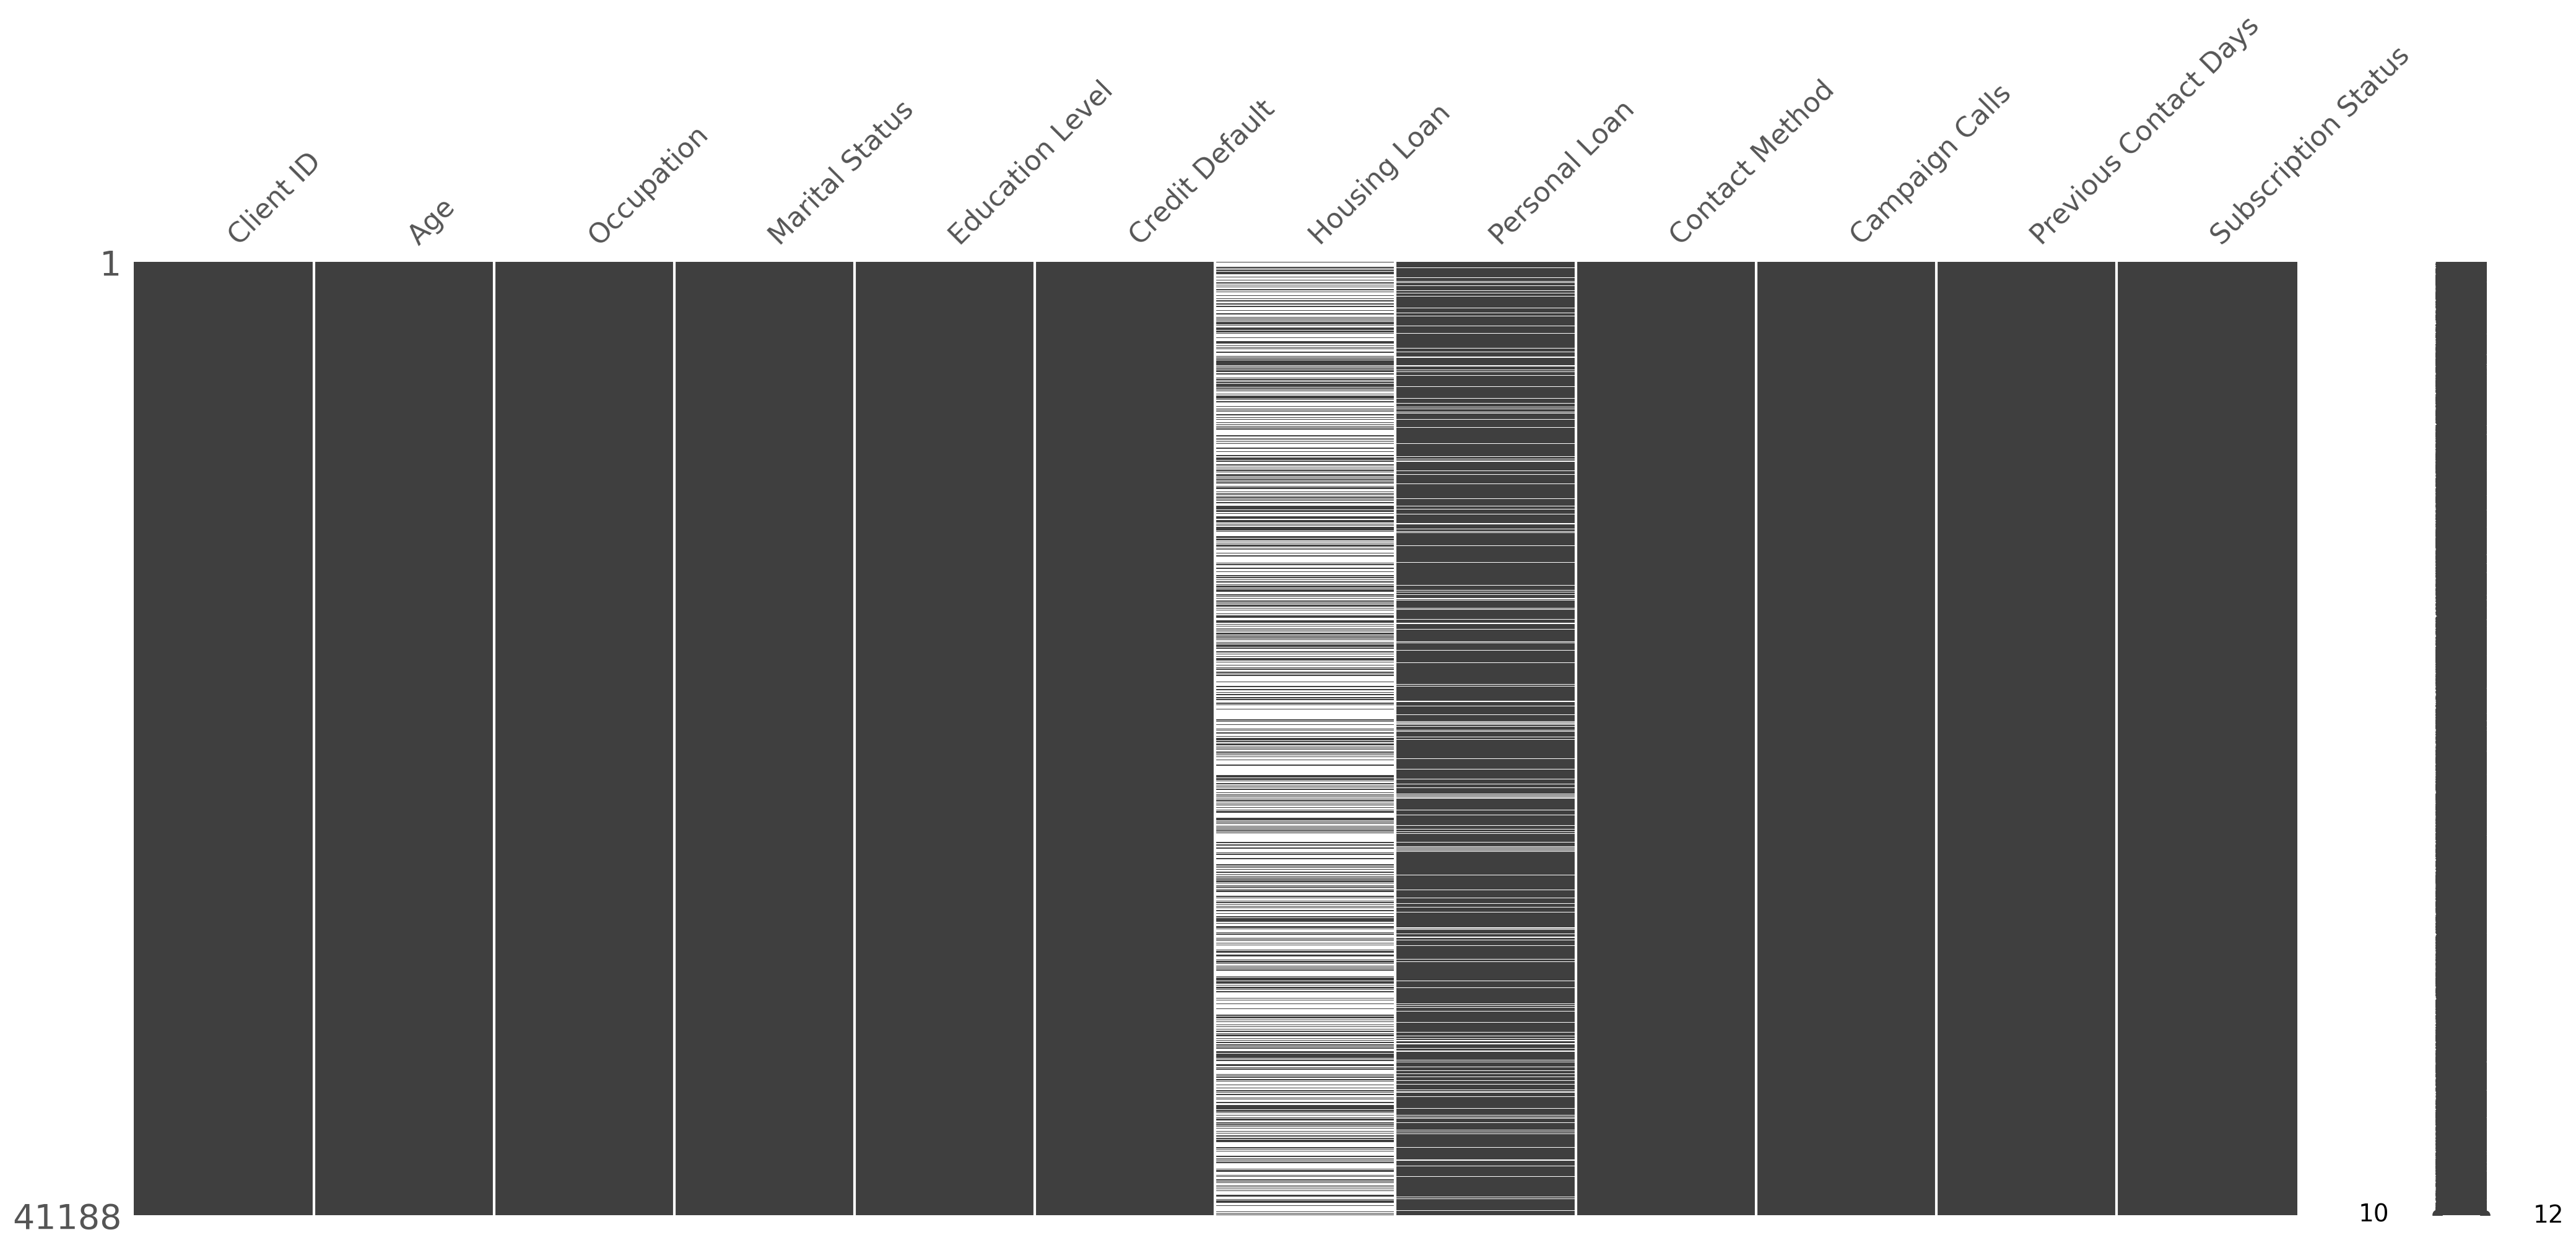

In [16]:
msno.matrix(df);

**---💡 Observations / Analysis / Insights ---** 

- This visualization highlights the extent of missing values across the dataset, providing a clear understanding of data completeness.

- The significant number of white lines in the `Housing Loan` column confirms the presence of substantial missing values, primarily due to the "None" entries. This highlights the importance of further investigation and appropriate handling during data preprocessing.

---
**📊 Visualize the correlation of missing values**

- Use `msno.heatmap(df)`
- The heatmap shows the patterns of missingness in your dataset to help identify systematic issues in data collection or preprocessing.
- It helps identify whether missing values in one column are correlated with missing values in other columns.

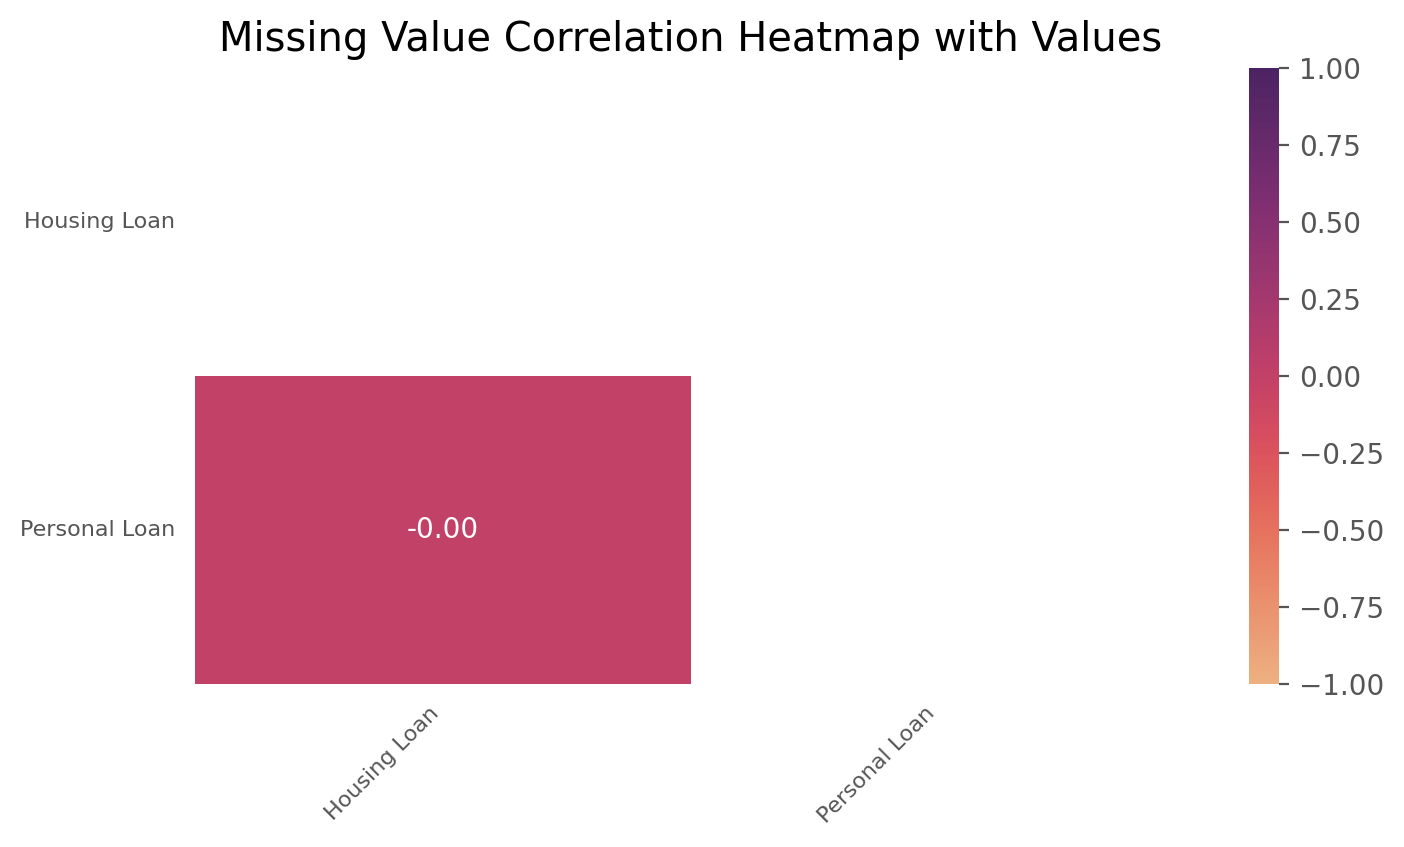

In [17]:
# Generate the nullity correlation matrix
nullity_corr = df[['Housing Loan', 'Personal Loan']].isnull().corr()

# Plot the heatmap using missingno
msno_heatmap = msno.heatmap(df[['Housing Loan', 'Personal Loan']], figsize=(8, 4), cmap='flare')

# Annotate the heatmap with correlation values
for i in range(nullity_corr.shape[0]):
    for j in range(nullity_corr.shape[1]):
        plt.text(j + 0.5, i + 0.5, f'{nullity_corr.iloc[i, j]:.2f}', 
                 ha='center', va='center', color='white', fontsize=10)
        
# Plot the heatmap
plt.xticks(fontsize=8) 
plt.yticks(fontsize=8)
plt.title("Missing Value Correlation Heatmap with Values")
plt.show();

**---💡 Observations / Analysis / Insights ---** 💡

- The correlation coefficient between `Housing Loan` and `Personal Loan` is -0.00, indicating no meaningful relationship between their missing values. This suggests that the presence or absence of missing values in these two columns is largely independent of each other.

- Since the correlation is minimal, handling missing values in these columns can be approached independently without considering dependencies between them. This independence simplifies preprocessing steps, as strategies for imputation or removal can focus on each column individually.

---
---
## 🔎 **5.5. Check for Duplicates**

To ensure data integrity, we will systematically identify and analyze duplicate rows in the dataset, including duplicate identifiers (e.g., `Client ID`).

Duplicate entries can distort analysis and modeling outcomes by artificially inflating patterns or relationships, leading to unreliable insights. Verifying the uniqueness of records is critical for maintaining the dataset's reliability and ensuring accurate predictions.

To effectively handle duplicates in the dataset, we can employ the following strategies:

- **Removal**: Drop duplicate rows if they are redundant or erroneous and do not contribute meaningful information.

- **Verification**: If duplicates are expected (e.g., multiple interactions with the same client), verify their legitimacy using domain knowledge or additional metadata.

- **Aggregation**: For datasets where duplicates represent repeated events (e.g., multiple campaign interactions with the same client), consider aggregating them into a single record using summary statistics (e.g., mean, sum, or count of interactions).

These strategies ensure that duplicates are handled appropriately, maintaining data integrity and enabling accurate analysis without introducing biases or distortions.

---
**📊 Check for duplicate rows**

In [18]:
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows

Empty DataFrame
Columns: [Client ID, Age, Occupation, Marital Status, Education Level, Credit Default, Housing Loan, Personal Loan, Contact Method, Campaign Calls, Previous Contact Days, Subscription Status]
Index: []

**---💡 Observations / Analysis / Insights ---**

- No duplicate rows found.

---
**📊 Count unique `Client ID`'s**

In [19]:
unique_booking_ids = df['Client ID'].nunique() 
unique_booking_ids

41188

**---💡 Observations / Analysis / Insights ---**

- The `Client ID` column contains 41,188 unique values, matching the total number of rows. This confirms each client has a unique identifier, with no duplicates.

---
---
## 🔎 **5.6. AutoEDA**

The purpose of this section is to perform Automated Exploratory Data Analysis (AutoEDA), which provides a comprehensive and interactive overview of the dataset. By generating an intuitive report, AutoEDA simplifies the process of identifying trends, outliers, and relationships within the data.

While this automated approach offers a quick and detailed snapshot, it is designed to complement, and not replace, the deeper, domain-specific exploration and visualizations conducted within the notebook. The insights derived from AutoEDA are intended to enhance understanding and guide further analysis.

⚠️ **Important Note**: If compatibility issues arise while running this section, feel free to skip it by commenting out the code. The profiling report serves as a supplementary tool and does not impact the overall findings of the EDA. Its primary role is to provide an additional layer of insight, supporting the manual analysis and domain-specific exploration conducted throughout the notebook.

---
**📊 Generate a profiling report using the `ydata-profiling` library**

In [20]:
from ydata_profiling import ProfileReport

# Create a profile report
profile = ProfileReport(df, title="Profiling Report")

# Render the profiling report directly in the notebook
profile.to_notebook_iframe()

# To avoid plotting issues after running the above library
%matplotlib inline

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:00<00:00, 155.94it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**---💡 Observations / Analysis / Insights ---**

- The AutoEDA report validates our earlier manual analysis, providing a more detailed and structured overview of the dataset. It includes comprehensive breakdowns of categorical feature distributions and statistical summaries for numerical features, enhancing our understanding of the data.

- Most notably, the target variable (`Subscription Status`) exhibits a significant class imbalance, with 36,548 instances of 'no' (clients who did not subscribe) and only 4,640 instances of 'yes' (clients who subscribed).

- The **Interactions** and **Correlations** sections reveal notable relationships between variables, such as the strong correlation between `Housing Loan` and `Personal Loan`. These insights could guide feature selection, engineering, or highlight potential multicollinearity issues in modeling.

- Additionally, the **Alerts** section highlights critical data quality concerns, including the high imbalance in the `Personal Loan` and `Credit Default` columns. These flagged issues underscore areas that may require targeted preprocessing or further investigation to ensure robust model performance.

---
---
---
# 🧼 **6. Data Cleaning**

Data cleaning is a critical first step in any data analysis or machine learning pipeline, ensuring the dataset is **accurate**, **consistent**, and **reliable**. Raw datasets often contain issues such as missing values, incorrect data types, irrelevant features, or inconsistencies that can distort insights and compromise model performance. By systematically addressing these issues, we establish a robust foundation for EDA and subsequent modeling.

Univariate analysis plays a pivotal role in this phase, helping us understand individual features and identify potential anomalies or irregularities. This process ensures that the dataset is clean, interpretable, and ready for deeper exploration.

In this section, we focus on identifying and resolving key issues to prepare the dataset for thorough analysis. The steps include:

- **Removing Irrelevant or Redundant Features**: Eliminating columns that do not contribute to the analysis or modeling objectives.

- **Handling Missing Values**: Imputing placeholders for missing data or addressing gaps to maintain dataset completeness. Advanced imputation strategies will be refined in later stages.

- **Correcting Data Types**: Ensuring all features have appropriate data types to prevent issues during preprocessing and modeling.

- **Outlier Detection**: Identifying extreme values that may skew analysis or modeling results.

- **Mitigating Bias**: Identifying and addressing potential sources of bias to ensure fairness and reliability in the dataset.

⚠️ **Note:** While basic cleaning is performed here to facilitate EDA, more advanced preprocessing steps (e.g. feature engineering, scaling, outlier removal and other complex transformations) will be deferred to later stages of the EDA and guided by bivariate and multivariate insights. To avoid data leakage, these advanced steps will only be performed after splitting the data into training and testing sets, ensuring that all preprocessing decisions are based solely on the training data to prevent bias or overfitting.

In [21]:
# Create a copy of the DataFrame
df_cleaned = df.copy()
df_cleaned.shape
df_cleaned.head()

(41188, 12)

Client ID       Age   Occupation Marital Status Education Level  \
0      32885  57 years   technician        married     high.school   
1       3170  55 years      unknown        married         unknown   
2      32207  33 years  blue-collar        married        basic.9y   
3       9404  36 years       admin.        married     high.school   
4      14021  27 years    housemaid        married     high.school   

  Credit Default Housing Loan Personal Loan Contact Method  Campaign Calls  \
0             no           no           yes           Cell               1   
1        unknown          yes            no      telephone               2   
2             no           no            no       cellular               1   
3             no           no            no      Telephone               4   
4             no         None            no           Cell               2   

   Previous Contact Days Subscription Status  
0                    999                  no  
1                    999                  no  
2                    999                  no  
3                    999                  no  
4                    999                  no

---
---
## 🧼 **6.1. Standardize Feature Names**

To streamline the dataset and ensure consistency, feature names are standardized to snake_case format. This step improves readability, aligns with Pythonic conventions, and ensures compatibility with downstream processing steps.

For example, column names like `Client ID` or `Campaign Calls` are converted to `client_id` and `campaign_calls`, respectively.

In [22]:
from src.clean_data import convert_column_names_to_snake_case
df_cleaned = convert_column_names_to_snake_case(df_cleaned=df_cleaned)
df_cleaned.shape
df_cleaned.head()

   └── Converting column names to snake_case...


(41188, 12)

client_id       age   occupation marital_status education_level  \
0      32885  57 years   technician        married     high.school   
1       3170  55 years      unknown        married         unknown   
2      32207  33 years  blue-collar        married        basic.9y   
3       9404  36 years       admin.        married     high.school   
4      14021  27 years    housemaid        married     high.school   

  credit_default housing_loan personal_loan contact_method  campaign_calls  \
0             no           no           yes           Cell               1   
1        unknown          yes            no      telephone               2   
2             no           no            no       cellular               1   
3             no           no            no      Telephone               4   
4             no         None            no           Cell               2   

   previous_contact_days subscription_status  
0                    999                  no  
1                    999                  no  
2                    999                  no  
3                    999                  no  
4                    999                  no

**---💡 Observations / Analysis / Insights ---**

- The column names in the dataset have been successfully converted to snake_case format.

- Moving forward, these standardized feature names will be used instead, throughout both the EDA and the machine learning pipeline.

---
---
## 🧼 **6.2. Remove Irrelevant Features**

To streamline the dataset and focus on meaningful predictors, features are removed based on logical relevance and risk of compromising model performance. This step ensures the model trains on inputs that truly contribute to understanding subscription behavior.

Features are evaluated against the following criteria:

- **Lack of Relevance or Redundancy**: Features that are unique identifiers (e.g., `client_id`) or highly correlated with others are dropped. These add no predictive value and can cause multicollinearity, which reduces model interpretability.

- **Minimal Predictive Power**: Features with little or no logical or statistical relationship to the target (`subscription_status`) are excluded to reduce noise and computational overhead.

- **Potential for Data Leakage**: Features that may contain future or target-related information, either directly (e.g., the target itself) or indirectly (e.g., post-outcome values), are removed to prevent overfitting and ensure realistic model performance.

Removing such features early prevents unnecessary data cleaning or transformation on irrelevant columns and allows focus on the variables most likely to influence the outcome.

⚠️ **Note:** Additional features may be dropped later as deeper analysis or feature importance evaluation uncovers redundancy or leakage risks.

---
**🧼 Drop `client_id`**

- The column is a unique identifier and does not carry any intrinsic predictive value for whether a client subscribes to a term deposit.

- Although sequential IDs can occasionally suggest order (e.g., chronological entry), there is no confirmed temporal or behavioral pattern associated with this field in the current dataset.

- Retaining such identifiers can risk unintentional data leakage if the `client_id` structure encodes hidden patterns correlated with the target, especially during train-test splits or cross-validation.

- Unless domain knowledge or further analysis justifies its inclusion, it is recommended to drop this column to streamline the dataset and focus on impactful features.

In [23]:
from src.clean_data import drop_client_id
df_cleaned = drop_client_id(df_cleaned)
df_cleaned.shape
df_cleaned.head()

   └── Dropping 'client_id' column...


(41188, 11)

age   occupation marital_status education_level credit_default  \
0  57 years   technician        married     high.school             no   
1  55 years      unknown        married         unknown        unknown   
2  33 years  blue-collar        married        basic.9y             no   
3  36 years       admin.        married     high.school             no   
4  27 years    housemaid        married     high.school             no   

  housing_loan personal_loan contact_method  campaign_calls  \
0           no           yes           Cell               1   
1          yes            no      telephone               2   
2           no            no       cellular               1   
3           no            no      Telephone               4   
4         None            no           Cell               2   

   previous_contact_days subscription_status  
0                    999                  no  
1                    999                  no  
2                    999                  no  
3                    999                  no  
4                    999                  no

**---💡 Observations / Analysis / Insights ---**

- The column has been successfully dropped with no other changes.

---
---
## **🧼 6.3. Explore Target Variable**

- Target variable: `subscription_status`

- This column indicates whether or not a client subscribed to a term deposit, with values labeled as "yes" (subscribed) or "no" (did not subscribed).

- As a binary classification problem, this variable will guide the analysis and modeling process, helping us predict the likelihood of a client subscribing based on their attributes and campaign-related features. Understanding its distribution and relationship with other features is critical for building an effective predictive model.

---
**📊 Perform univariate analysis on `subscription_status` feature**

In [24]:
perform_univariate_analysis(df=df_cleaned, feature=TARGET, show_plots=False)

🔎 Performing univariate analysis:
 └── Column 'subscription_status' (Type: categorical)

📘 Data Type: object
💎 Unique Non-NA Values: 2
📋 List of Unique Non-NA Values: ['no', 'yes']
📊 Frequency Table:


Count  Percentage (%)
no   36,548          88.730
yes   4,640          11.270

✅ No rows with missing values found.


**---💡 Observations / Analysis / Insights ---**

- The dataset exhibits a significant class imbalance, with the majority class (`no`) accounting for 88.73% of the data and the minority class (`yes`) representing only 11.27%.

- As such, the total conversion rate is 11.27%. Knowing the conversion rate is essential in determining the success and effectiveness of the marketing efforts. We will use this 11.27% as a benchmark when also evaluating the precision of our models as our models should provide some benefit and improve on the current conversion rate as well.

- This imbalance poses a risk of biasing models toward the majority class, potentially leading to poor performance in predicting the minority class.

- While this data cleaning section focuses on preparing the dataset for further analysis by addressing issues such as missing values, irrelevant features, and data type inconsistencies, the class imbalance will be systematically addressed in subsequent sections.

---
**🧼 Clean `subscription_status` feature**

1. Binary encode the 'subscription_status' column ("yes" = 1, "no" = 0)

2. Convert the column to the category data type to optimize memory usage and improve computational efficiency.

In [25]:
from src.clean_data import clean_subscription_status
df_cleaned = clean_subscription_status(df_cleaned=df_cleaned)
df_cleaned.shape
df_cleaned.head()


   🫧  Cleaning target variable column (i.e.'subscription_status')...
      └── Binary encoding 'subscription_status' column ('yes' = 1, 'no' = 0)...
      └── Converting 'subscription_status' column to categorical type...


(41188, 11)

age   occupation marital_status education_level credit_default  \
0  57 years   technician        married     high.school             no   
1  55 years      unknown        married         unknown        unknown   
2  33 years  blue-collar        married        basic.9y             no   
3  36 years       admin.        married     high.school             no   
4  27 years    housemaid        married     high.school             no   

  housing_loan personal_loan contact_method  campaign_calls  \
0           no           yes           Cell               1   
1          yes            no      telephone               2   
2           no            no       cellular               1   
3           no            no      Telephone               4   
4         None            no           Cell               2   

   previous_contact_days subscription_status  
0                    999                   0  
1                    999                   0  
2                    999                   0  
3                    999                   0  
4                    999                   0

---
**📊 Verify `subscription_status` feature after cleaning**

In [26]:
perform_univariate_analysis(df=df_cleaned, feature=TARGET, show_plots=False)

🔎 Performing univariate analysis:
 └── Column 'subscription_status' (Type: categorical)

📘 Data Type: category
💎 Unique Non-NA Values: 2
📋 List of Unique Non-NA Values: [0, 1]
📊 Frequency Table:


Count  Percentage (%)
0  36,548          88.730
1   4,640          11.270

✅ No rows with missing values found.


---
---
## **🧼 6.4. Explore `age`**

- This column represents the age of the client, providing a numerical measure of the client's demographic profile.

- As a continuous numerical feature (after cleaning), it offers insights into how the age of clients might influence their likelihood of subscribing to a term deposit. For instance, younger clients may have different financial priorities compared to older clients, which could impact their subscription behavior.

- Understanding its distribution (e.g., range, mean, median) and relationship with the target variable is essential for identifying patterns that could improve the predictive model. Additionally, analyzing potential outliers or age groupings (e.g., binning into categories like "young adults," "middle-aged," and "seniors") can help uncover meaningful trends in the data.

- This feature may also interact with other variables, such as `marital_status`, `occupation`, or `education_level`, making it important to explore these relationships during feature engineering and modeling.

---
**📊 Perform univariate analysis on `age` feature**

In [27]:
perform_univariate_analysis(df=df_cleaned, feature='age', show_plots=False)

🔎 Performing univariate analysis:
 └── Column 'age' (Type: categorical)

📘 Data Type: object
💎 Unique Non-NA Values: 77
📋 List of Unique Non-NA Values: ['57 years', '55 years', '33 years', '36 years', '27 years', '58 years', '48 years', '150 years', '24 years', '34 years', '42 years', '43 years', '26 years', '37 years', '46 years', '59 years', '49 years', '30 years', '51 years', '45 years', '31 years', '41 years', '38 years', '47 years', '69 years', '50 years', '25 years', '39 years', '44 years', '52 years', '35 years', '77 years', '40 years', '56 years', '53 years', '60 years', '29 years', '28 years', '54 years', '32 years', '81 years', '63 years', '21 years', '22 years', '74 years', '80 years', '62 years', '68 years', '86 years', '23 years', '71 years', '67 years', '65 years', '20 years', '19 years', '66 years', '75 years', '18 years', '72 years', '70 years', '82 years', '85 years', '61 years', '88 years', '83 years', '78 years', '64 years', '17 years', '76 years', '73 years', '79 ye

Count  Percentage (%)
150 years  4,197          10.190
31 years   1,747           4.240
32 years   1,646           4.000
33 years   1,643           3.990
36 years   1,606           3.900
...          ...             ...
92 years       4           0.010
89 years       2           0.000
91 years       2           0.000
98 years       2           0.000
95 years       1           0.000

[77 rows x 2 columns]

⚠️ High Cardinality (>25): 77 unique categories
⚠️ Rare Categories (<1%): 41 found
✅ No rows with missing values found.


**---💡 Observations / Analysis / Insights ---**

- The column is currently of type `object`, indicating that the values are stored as strings (e.g., "57 years," "33 years"). To enable meaningful analysis and modeling, the 'years' suffix should be removed, and the remaining numerical values should be converted to the `int64` data type. 

- The column contains 77 unique categories, indicating a wide range of ages in the dataset. This diversity in age distribution could provide valuable insights into how different age groups behave regarding term deposit subscriptions.

- There is a clear outlier value of "150 years," which accounts for a significant portion of the dataset (4,197 instances, or 10.19%). This value is highly implausible, as it far exceeds the maximum human lifespan and is inconsistent with real-world expectations. Given that such an extreme value represents over 10% of the data, it is reasonable to conclude that this is likely a data entry error, a placeholder for missing values, or a systematic issue in data collection. Such outliers can severely distort statistical summaries, mislead analyses, and negatively impact model performance. Therefore, it is essential to address this issue systematically in subsequent sections to ensure the integrity and reliability of the dataset.

---
**🧼 Clean `age` feature**

1. Strip the "years" string from the values to isolate the numerical age data.

2. Transform the cleaned values into integers to enable meaningful numerical analysis and modeling.

In [28]:
from src.clean_data import clean_age
df_cleaned = clean_age(df_cleaned=df_cleaned)
df_cleaned.shape
df_cleaned.head()


   🫧  Cleaning 'age' column...
      └── Removing 'years' suffix and converting `age` column to numeric values...
      └── Converting 'age' column to int64 type...


(41188, 11)

age   occupation marital_status education_level credit_default  \
0   57   technician        married     high.school             no   
1   55      unknown        married         unknown        unknown   
2   33  blue-collar        married        basic.9y             no   
3   36       admin.        married     high.school             no   
4   27    housemaid        married     high.school             no   

  housing_loan personal_loan contact_method  campaign_calls  \
0           no           yes           Cell               1   
1          yes            no      telephone               2   
2           no            no       cellular               1   
3           no            no      Telephone               4   
4         None            no           Cell               2   

   previous_contact_days subscription_status  
0                    999                   0  
1                    999                   0  
2                    999                   0  
3                    999                   0  
4                    999                   0

---
**📊 Verify `age` feature after cleaning**

🔎 Performing univariate analysis:
 └── Column 'age' (Type: numerical)

📘 Data Type: Int64
💎 Unique Non-NA Values: 77
📊 Summary Statistics:


📈 Distribution Shape:
   └── Skewness: 2.26 ⚠️
   └── Kurtosis (excess): 3.75 ⚠️

🔍 Outlier Detection: IQR Method (due to skew/kurtosis)
   └── ⚠️ 4347 outliers found (10.55% of rows)
   └── Outliers summary:


✅ No rows with missing values found.


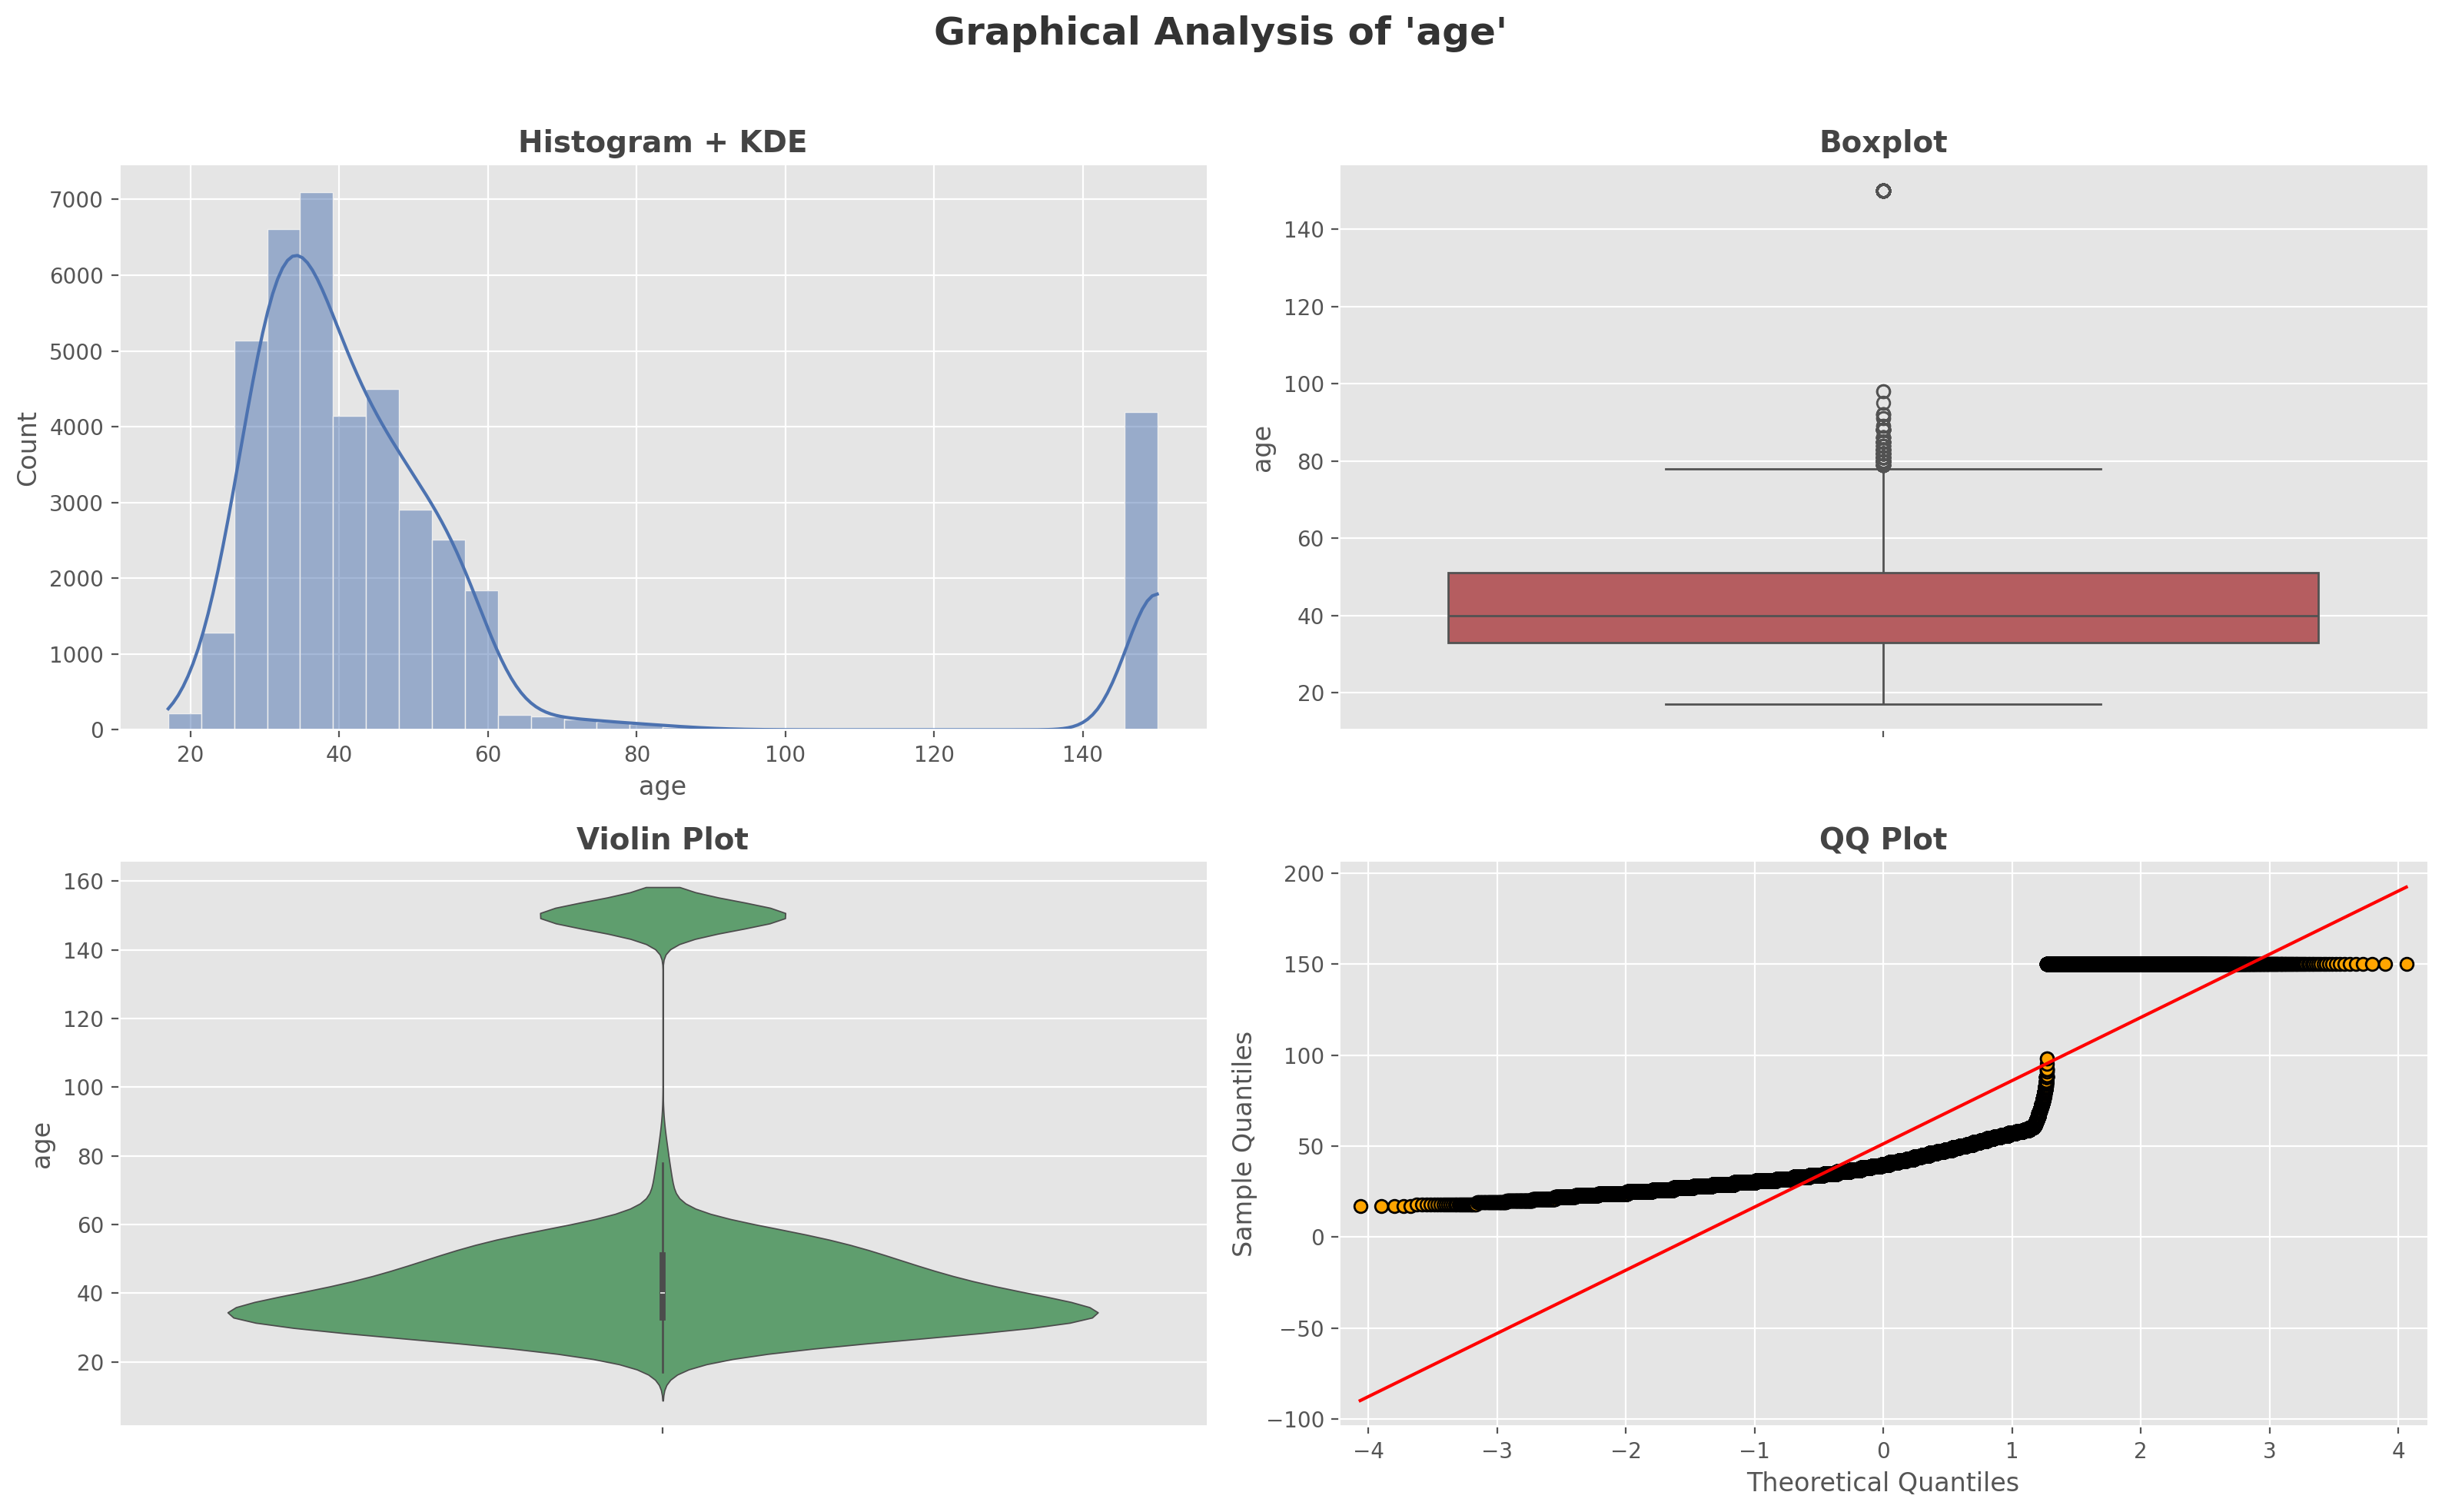

In [29]:
perform_univariate_analysis(df=df_cleaned, feature='age')

**---💡 Observations / Analysis / Insights ---**

- The mean age is 51.23 years, with a standard deviation of 34.71, indicating a relatively wide spread in the data. However, this mean is inflated due to the presence of extreme outliers, such as the unrealistic value of 150 years, which skews the distribution.

- These outliers are most likely erroneous values as ages 150, especially at this frequency, is very likely not possible.

- Further analysis will be conducted in subsequent sections to address these outliers / erroneous values and reassess the distribution of the column to ensure accurate and meaningful insights.

---
---
## **🧼 6.5. Explore `occupation`**

- This column represents the type of job held by the client, providing a categorical measure of their professional background.

- It offers insights into how a client's occupation might influence their likelihood of subscribing to a term deposit. For example, certain occupations may correlate with higher financial stability or awareness, impacting subscription behavior.

- Additionally, the feature may interact with other variables like `age`, `marital_status`, or `education_level`. For instance, younger clients in specific occupations might exhibit different behaviors compared to older clients in the same roles, highlighting potential trends for feature engineering.

- It is hypothesized that the feature will be one-hot encoded, as there is no inherent order among job categories. This approach ensures each occupation is treated as a distinct category, avoiding unintended ordinal relationships from alternative encoding methods.

---
**📊 Perform univariate analysis on `occupation` feature**

In [30]:
perform_univariate_analysis(df=df_cleaned, feature='occupation', show_plots=False)

🔎 Performing univariate analysis:
 └── Column 'occupation' (Type: categorical)

📘 Data Type: object
💎 Unique Non-NA Values: 12
📋 List of Unique Non-NA Values: ['technician', 'unknown', 'blue-collar', 'admin.', 'housemaid', 'retired', 'services', 'entrepreneur', 'unemployed', 'management', 'self-employed', 'student']
📊 Frequency Table:


Count  Percentage (%)
admin.         10,422          25.300
blue-collar     9,254          22.470
technician      6,743          16.370
services        3,969           9.640
management      2,924           7.100
retired         1,720           4.180
entrepreneur    1,456           3.540
self-employed   1,421           3.450
housemaid       1,060           2.570
unemployed      1,014           2.460
student           875           2.120
unknown           330           0.800

⚠️ Rare Categories (<1%): 1 found
✅ No rows with missing values found.


**---💡 Observations / Analysis / Insights ---**

- The top three occupations (`admin.`, `blue-collar`, and `technician`) account for over half of the dataset, suggesting these groups may significantly influence subscription behavior. Further analysis should explore their correlation with subscription rates.

- Less frequent categories like `student` (2.12%) and `unknown` (0.80%) could still provide valuable insights if they exhibit distinct patterns. For example, students may have different financial priorities compared to other groups.

- The `unknown` category indicates potential data quality issues. Investigate whether these cases can be resolved using imputation or domain knowledge.

- Remove the period in `admin.` for consistency.

- There also exists potential overlaps of different occupations:

  - `admin.` vs. `management`: Ambiguity exists if administrative roles overlap with managerial positions. Clarify whether admin. includes managerial roles.

  - `entrepreneur` vs. `self-employed`: Both involve running businesses, leading to potential overlap. Consider merging these categories if the distinction is not critical.

  - `blue-collar` vs. `technician`: Technicians may be classified as blue-collar in some industries (e.g., manufacturing) but as skilled professionals in others. Context-dependent inconsistencies may arise.

  - `housemaid` vs. `services`: Housemaids may fall under the broader "services" category, causing potential overlap.

  - `student`: Students working part-time jobs may overlap with categories like blue-collar, services, or unemployed. Define clear guidelines for classification based on primary or secondary activities.

- To address the potential overlaps and ambiguities in occupation categories, it will be necessary to collaborate with domain experts to refine definitions and ensure mutual exclusivity.

- However, for the current analysis, we will proceed with the existing categories as provided, treating them as-is. Resolving these overlaps will remain a key area for future improvement to enhance the model's accuracy and robustness.

---
**🧼 Clean `occupation` feature**

1. Remove the period in `admin.`

2. Convert the column to the category data type to optimize memory usage and improve computational efficiency.

In [31]:
from src.clean_data import clean_occupation
df_cleaned = clean_occupation(df_cleaned=df_cleaned)
df_cleaned.shape
df_cleaned.head()


   🫧  Cleaning 'occupation' column...
      └── Removing period in 'admin.'...
      └── Converting 'occupation' column to category data type...


(41188, 11)

age   occupation marital_status education_level credit_default  \
0   57   technician        married     high.school             no   
1   55      unknown        married         unknown        unknown   
2   33  blue-collar        married        basic.9y             no   
3   36        admin        married     high.school             no   
4   27    housemaid        married     high.school             no   

  housing_loan personal_loan contact_method  campaign_calls  \
0           no           yes           Cell               1   
1          yes            no      telephone               2   
2           no            no       cellular               1   
3           no            no      Telephone               4   
4         None            no           Cell               2   

   previous_contact_days subscription_status  
0                    999                   0  
1                    999                   0  
2                    999                   0  
3                    999                   0  
4                    999                   0

---
**📊 Verify `occupation` feature after cleaning**

🔎 Performing univariate analysis:
 └── Column 'occupation' (Type: categorical)

📘 Data Type: category
💎 Unique Non-NA Values: 12
📋 List of Unique Non-NA Values: ['technician', 'unknown', 'blue-collar', 'admin', 'housemaid', 'retired', 'services', 'entrepreneur', 'unemployed', 'management', 'self-employed', 'student']
📊 Frequency Table:


Count  Percentage (%)
admin          10,422          25.300
blue-collar     9,254          22.470
technician      6,743          16.370
services        3,969           9.640
management      2,924           7.100
retired         1,720           4.180
entrepreneur    1,456           3.540
self-employed   1,421           3.450
housemaid       1,060           2.570
unemployed      1,014           2.460
student           875           2.120
unknown           330           0.800

⚠️ Rare Categories (<1%): 1 found
✅ No rows with missing values found.


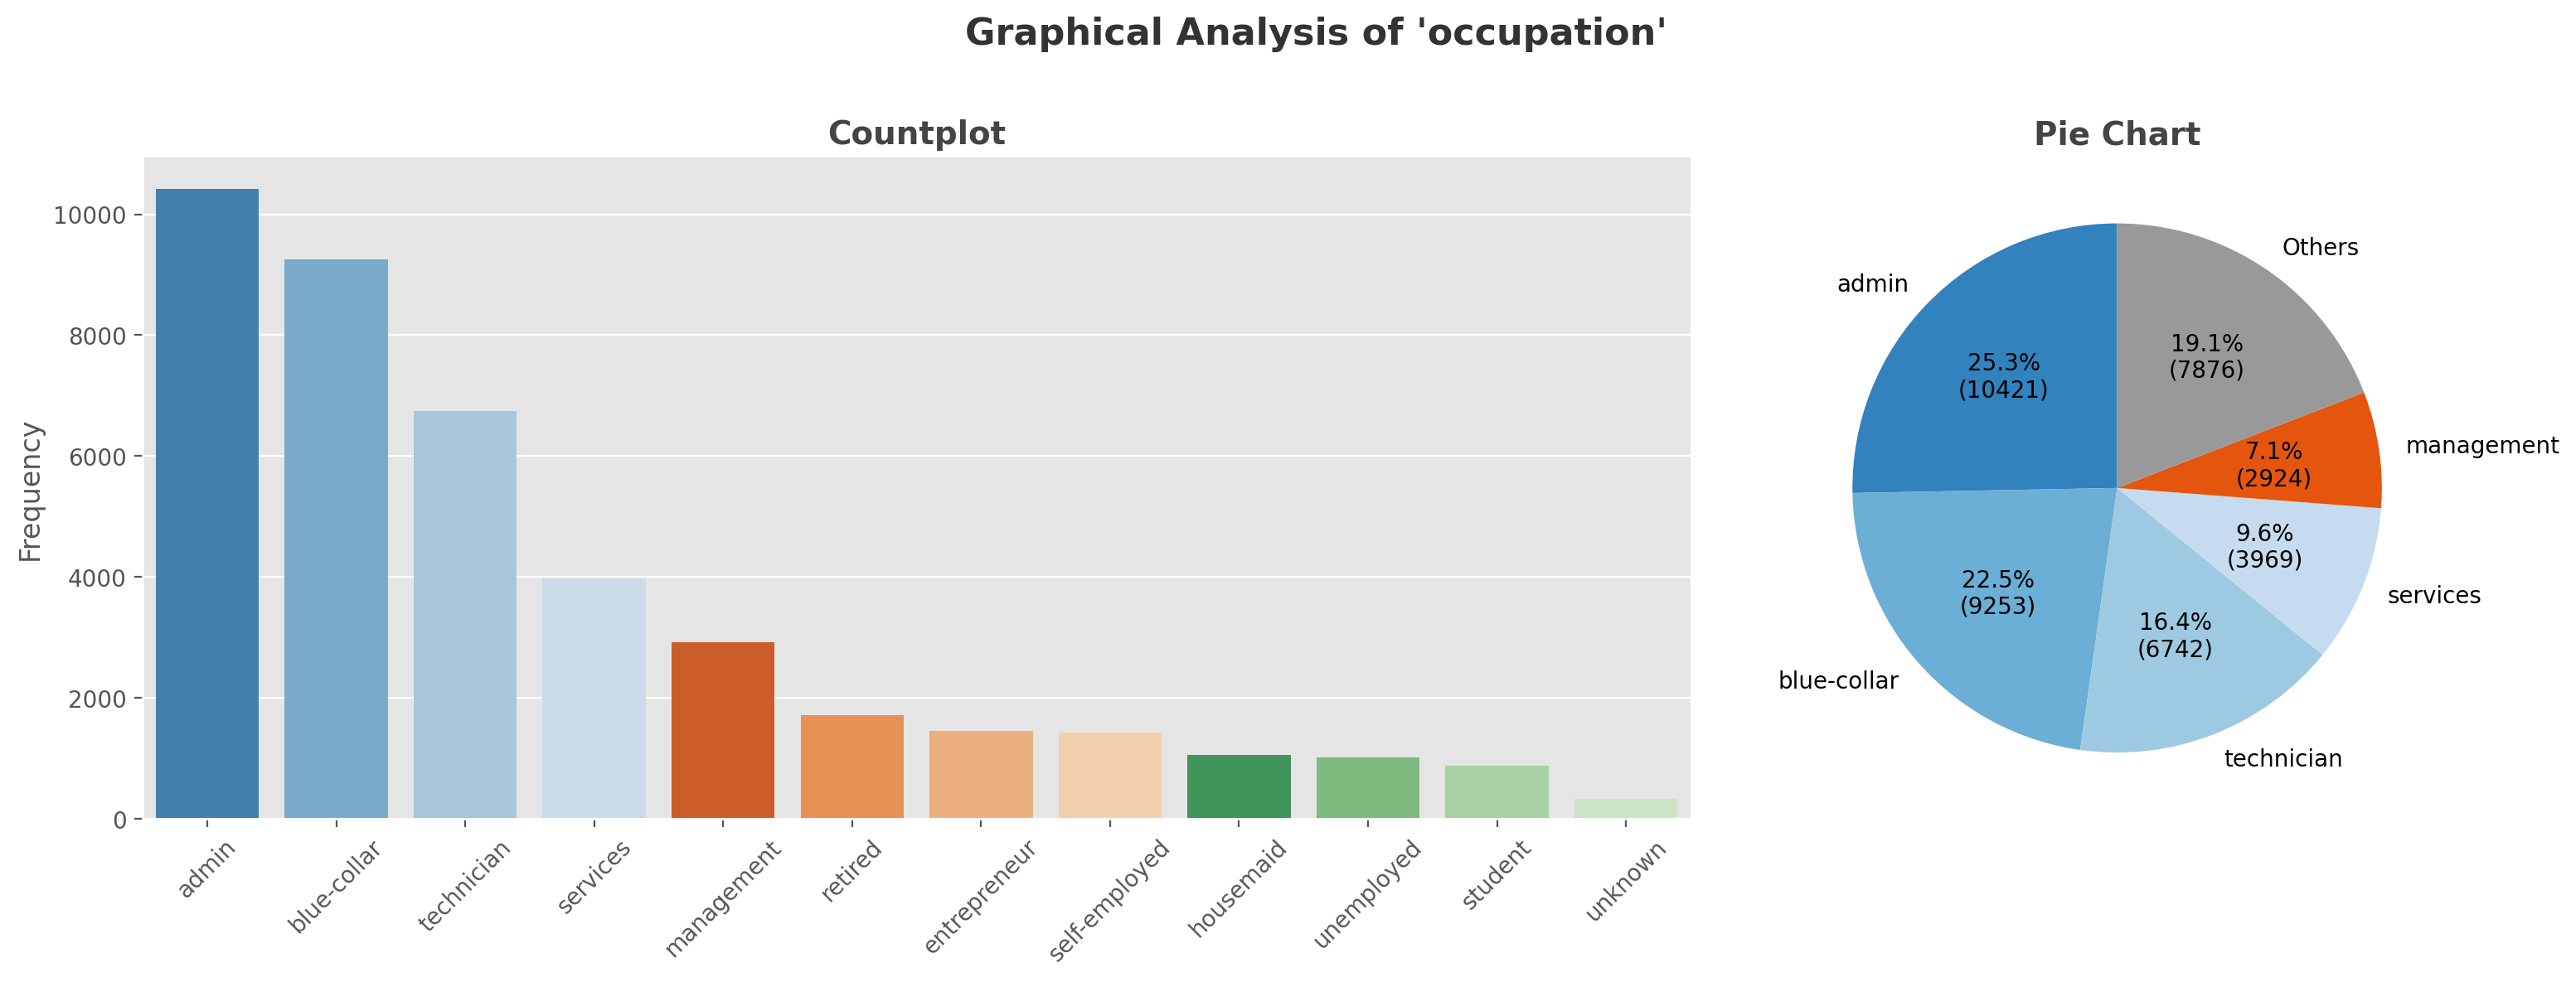

In [32]:
perform_univariate_analysis(df=df_cleaned, feature='occupation')

---
---
## **🧼 6.6. Explore `marital_status`**

- This column represents the marital status of the client, providing a categorical measure of their personal relationship background.

- It offers insights into how a client's marital status might influence their likelihood of subscribing to a term deposit. For example, married individuals may have different financial priorities or stability compared to single or divorced individuals, impacting subscription behavior.

- Additionally, the feature may interact with other variables like `age`, `occupation`, or `education_level`. For instance, younger clients who are single might exhibit different behaviors compared to older clients who are married or divorced, highlighting potential trends for feature engineering.

- It is hypothesized that the feature will be one-hot encoded, as there is no inherent order among marital status categories. This approach ensures each category is treated as a distinct group, avoiding unintended ordinal relationships from alternative encoding methods.

- Further analysis will explore whether certain marital statuses correlate with higher or lower subscription rates, and whether these relationships vary across other demographic factors.

---
**📊 Perform univariate analysis on `marital_status` feature**

In [33]:
perform_univariate_analysis(df=df_cleaned, feature='marital_status', show_plots=False)

🔎 Performing univariate analysis:
 └── Column 'marital_status' (Type: categorical)

📘 Data Type: object
💎 Unique Non-NA Values: 4
📋 List of Unique Non-NA Values: ['married', 'divorced', 'single', 'unknown']
📊 Frequency Table:


Count  Percentage (%)
married   24,928          60.520
single    11,568          28.090
divorced   4,612          11.200
unknown       80           0.190

⚠️ Rare Categories (<1%): 1 found
✅ No rows with missing values found.


**---💡 Observations / Analysis / Insights ---**

- The majority of clients are married, with more than half of the dataset falling into this category. As such, its statistical weight in the model is significant - the model will naturally learn patterns from this group more robustly because it has more data points to generalize from. To address this, we will explore the interaction of marital status with other features, assess its importance in the model, and consider balancing techniques if necessary to maintain fairness and accuracy across all categories.

- A small percentage of records have an `unknown` marital status. These cases should be reviewed to determine if they can be resolved using additional data or domain knowledge, as they may impact the accuracy of the analysis. If resolution is not possible, consider grouping "unknown" into a separate category or applying imputation techniques.

---
**🧼 Clean `marital_status` feature**

1. Convert the column to the category data type to optimize memory usage and improve computational efficiency.

In [34]:
from src.clean_data import clean_marital_status
df_cleaned = clean_marital_status(df_cleaned=df_cleaned)
df_cleaned.shape
df_cleaned.head()


   🫧  Cleaning 'marital_status' column...
      └── Converting 'marital_status' column to category data type...


(41188, 11)

age   occupation marital_status education_level credit_default  \
0   57   technician        married     high.school             no   
1   55      unknown        married         unknown        unknown   
2   33  blue-collar        married        basic.9y             no   
3   36        admin        married     high.school             no   
4   27    housemaid        married     high.school             no   

  housing_loan personal_loan contact_method  campaign_calls  \
0           no           yes           Cell               1   
1          yes            no      telephone               2   
2           no            no       cellular               1   
3           no            no      Telephone               4   
4         None            no           Cell               2   

   previous_contact_days subscription_status  
0                    999                   0  
1                    999                   0  
2                    999                   0  
3                    999                   0  
4                    999                   0

---
**📊 Verify `marital_status` feature after cleaning**

🔎 Performing univariate analysis:
 └── Column 'marital_status' (Type: categorical)

📘 Data Type: category
💎 Unique Non-NA Values: 4
📋 List of Unique Non-NA Values: ['married', 'divorced', 'single', 'unknown']
📊 Frequency Table:


Count  Percentage (%)
married   24,928          60.520
single    11,568          28.090
divorced   4,612          11.200
unknown       80           0.190

⚠️ Rare Categories (<1%): 1 found
✅ No rows with missing values found.


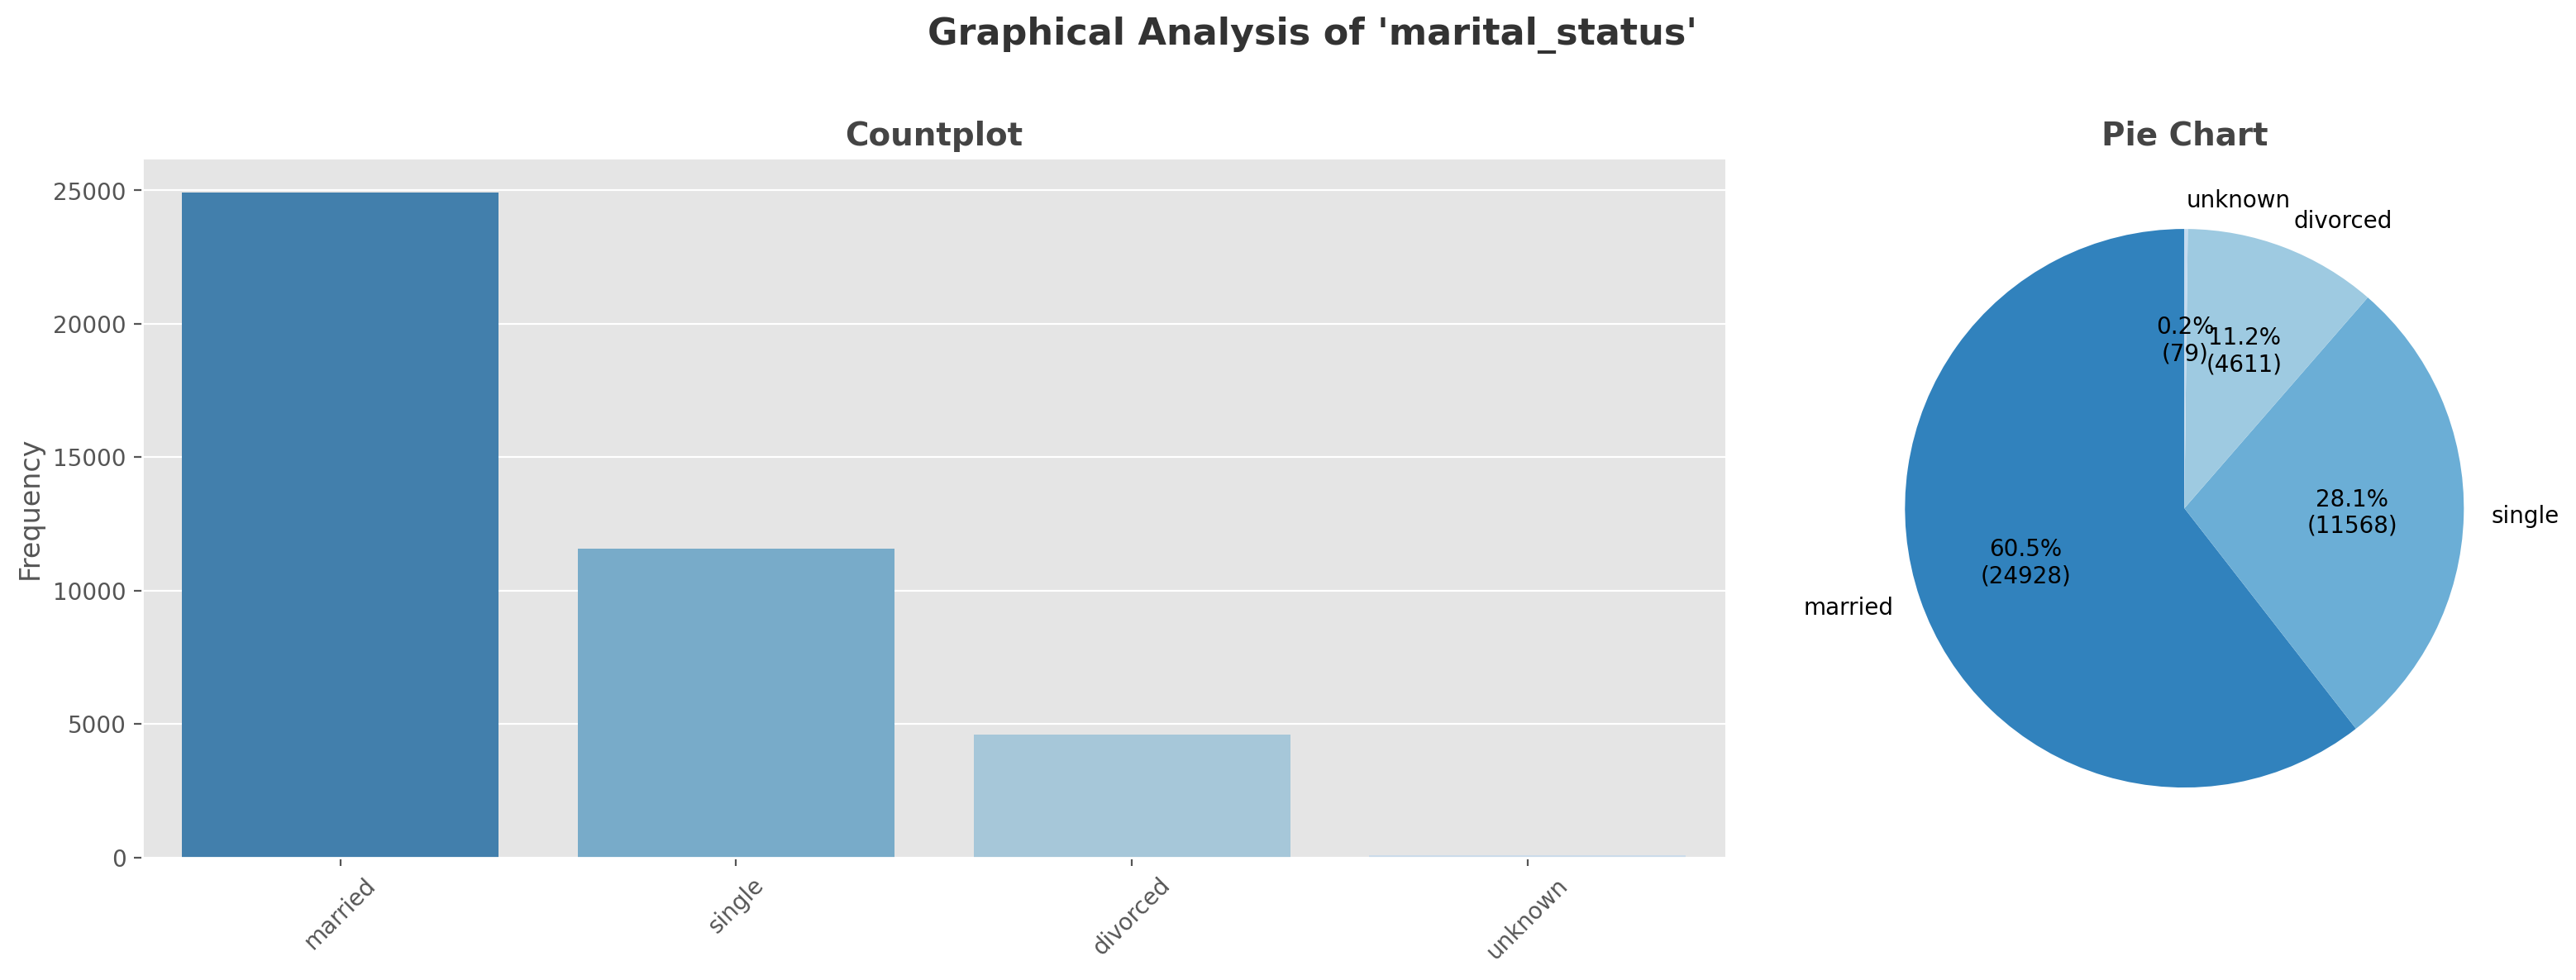

In [35]:
perform_univariate_analysis(df=df_cleaned, feature='marital_status', show_plots=True)

---
---
## **🧼 6.7. Explore `education_level`**

- This column represents the highest level of education attained by the client, providing a categorical measure of their educational background.

- It offers insights into how a client's education level might influence their likelihood of subscribing to a term deposit. For example, individuals with higher education levels may exhibit greater financial awareness or stability, potentially impacting their subscription behavior.

- Additionally, the feature may interact with other variables such as `age`, `occupation`, or `marital_status`. For instance, younger clients with higher education levels might prioritize long-term financial planning, while older clients with lower education levels might focus on immediate needs, highlighting potential trends for feature engineering.

- This feature can be encoded using either one-hot encoding or ordinal encoding, as both methods have their merits. One-hot encoding ensures that each category is treated independently, avoiding unintended ordinal relationships, while ordinal encoding preserves the inherent order of education levels, which may be meaningful for certain models. Further analysis will be conducted to determine the most appropriate encoding method based on the dataset's characteristics and the behavior of the models during experimentation.

---
**📊 Perform univariate analysis on `education_level` feature**

In [36]:
perform_univariate_analysis(df=df_cleaned, feature='education_level', show_plots=False)

🔎 Performing univariate analysis:
 └── Column 'education_level' (Type: categorical)

📘 Data Type: object
💎 Unique Non-NA Values: 8
📋 List of Unique Non-NA Values: ['high.school', 'unknown', 'basic.9y', 'professional.course', 'university.degree', 'basic.4y', 'basic.6y', 'illiterate']
📊 Frequency Table:


Count  Percentage (%)
university.degree    12,168          29.540
high.school           9,515          23.100
basic.9y              6,045          14.680
professional.course   5,243          12.730
basic.4y              4,176          10.140
basic.6y              2,292           5.560
unknown               1,731           4.200
illiterate               18           0.040

⚠️ Rare Categories (<1%): 1 found
✅ No rows with missing values found.


**---💡 Observations / Analysis / Insights ---**

- A small proportion of the data contains `unknown` values, which may indicate missing or unresolved information. These will need to be addressed during further data exploration to ensure consistency and accuracy in analysis.

- The category `illiterate` is extremely rare, with only 18 occurrences in the dataset. This suggests that it may have minimal impact on the overall analysis. However, its presence should still be acknowledged, as it could represent a distinct group with unique characteristics that might influence subscription behavior. Further investigation is needed to determine whether this category should be grouped with others (e.g., basic.4y) or retained as-is for modeling.

- Some categories use periods as connectors (e.g., `basic.9y`). To maintain consistency with other columns that use hyphens for multi-word entries, these periods should be replaced with hyphens (e.g., `basic-9y`). This standardization will improve readability and alignment with the dataset's overall formatting conventions.

---
**🧼 Clean `education_level` feature**

1. Replace periods (`.`) with hyphens (`-`) to standardize the naming convention and align with other columns.

2. Convert the column to the category data type to optimize memory usage and improve computational efficiency.

In [37]:
from src.clean_data import clean_education_level
df_cleaned = clean_education_level(df_cleaned=df_cleaned)
df_cleaned.shape
df_cleaned.head()


   🫧  Cleaning 'education_level' column...
      └── Replacing periods with hyphens in 'education_level' column...
      └── Converting 'education_level' column to category type...


(41188, 11)

age   occupation marital_status education_level credit_default  \
0   57   technician        married     high-school             no   
1   55      unknown        married         unknown        unknown   
2   33  blue-collar        married        basic-9y             no   
3   36        admin        married     high-school             no   
4   27    housemaid        married     high-school             no   

  housing_loan personal_loan contact_method  campaign_calls  \
0           no           yes           Cell               1   
1          yes            no      telephone               2   
2           no            no       cellular               1   
3           no            no      Telephone               4   
4         None            no           Cell               2   

   previous_contact_days subscription_status  
0                    999                   0  
1                    999                   0  
2                    999                   0  
3                    999                   0  
4                    999                   0

---
**📊 Verify `education_level` feature after cleaning**

🔎 Performing univariate analysis:
 └── Column 'education_level' (Type: categorical)

📘 Data Type: category
💎 Unique Non-NA Values: 8
📋 List of Unique Non-NA Values: ['high-school', 'unknown', 'basic-9y', 'professional-course', 'university-degree', 'basic-4y', 'basic-6y', 'illiterate']
📊 Frequency Table:


Count  Percentage (%)
university-degree    12,168          29.540
high-school           9,515          23.100
basic-9y              6,045          14.680
professional-course   5,243          12.730
basic-4y              4,176          10.140
basic-6y              2,292           5.560
unknown               1,731           4.200
illiterate               18           0.040

⚠️ Rare Categories (<1%): 1 found
✅ No rows with missing values found.


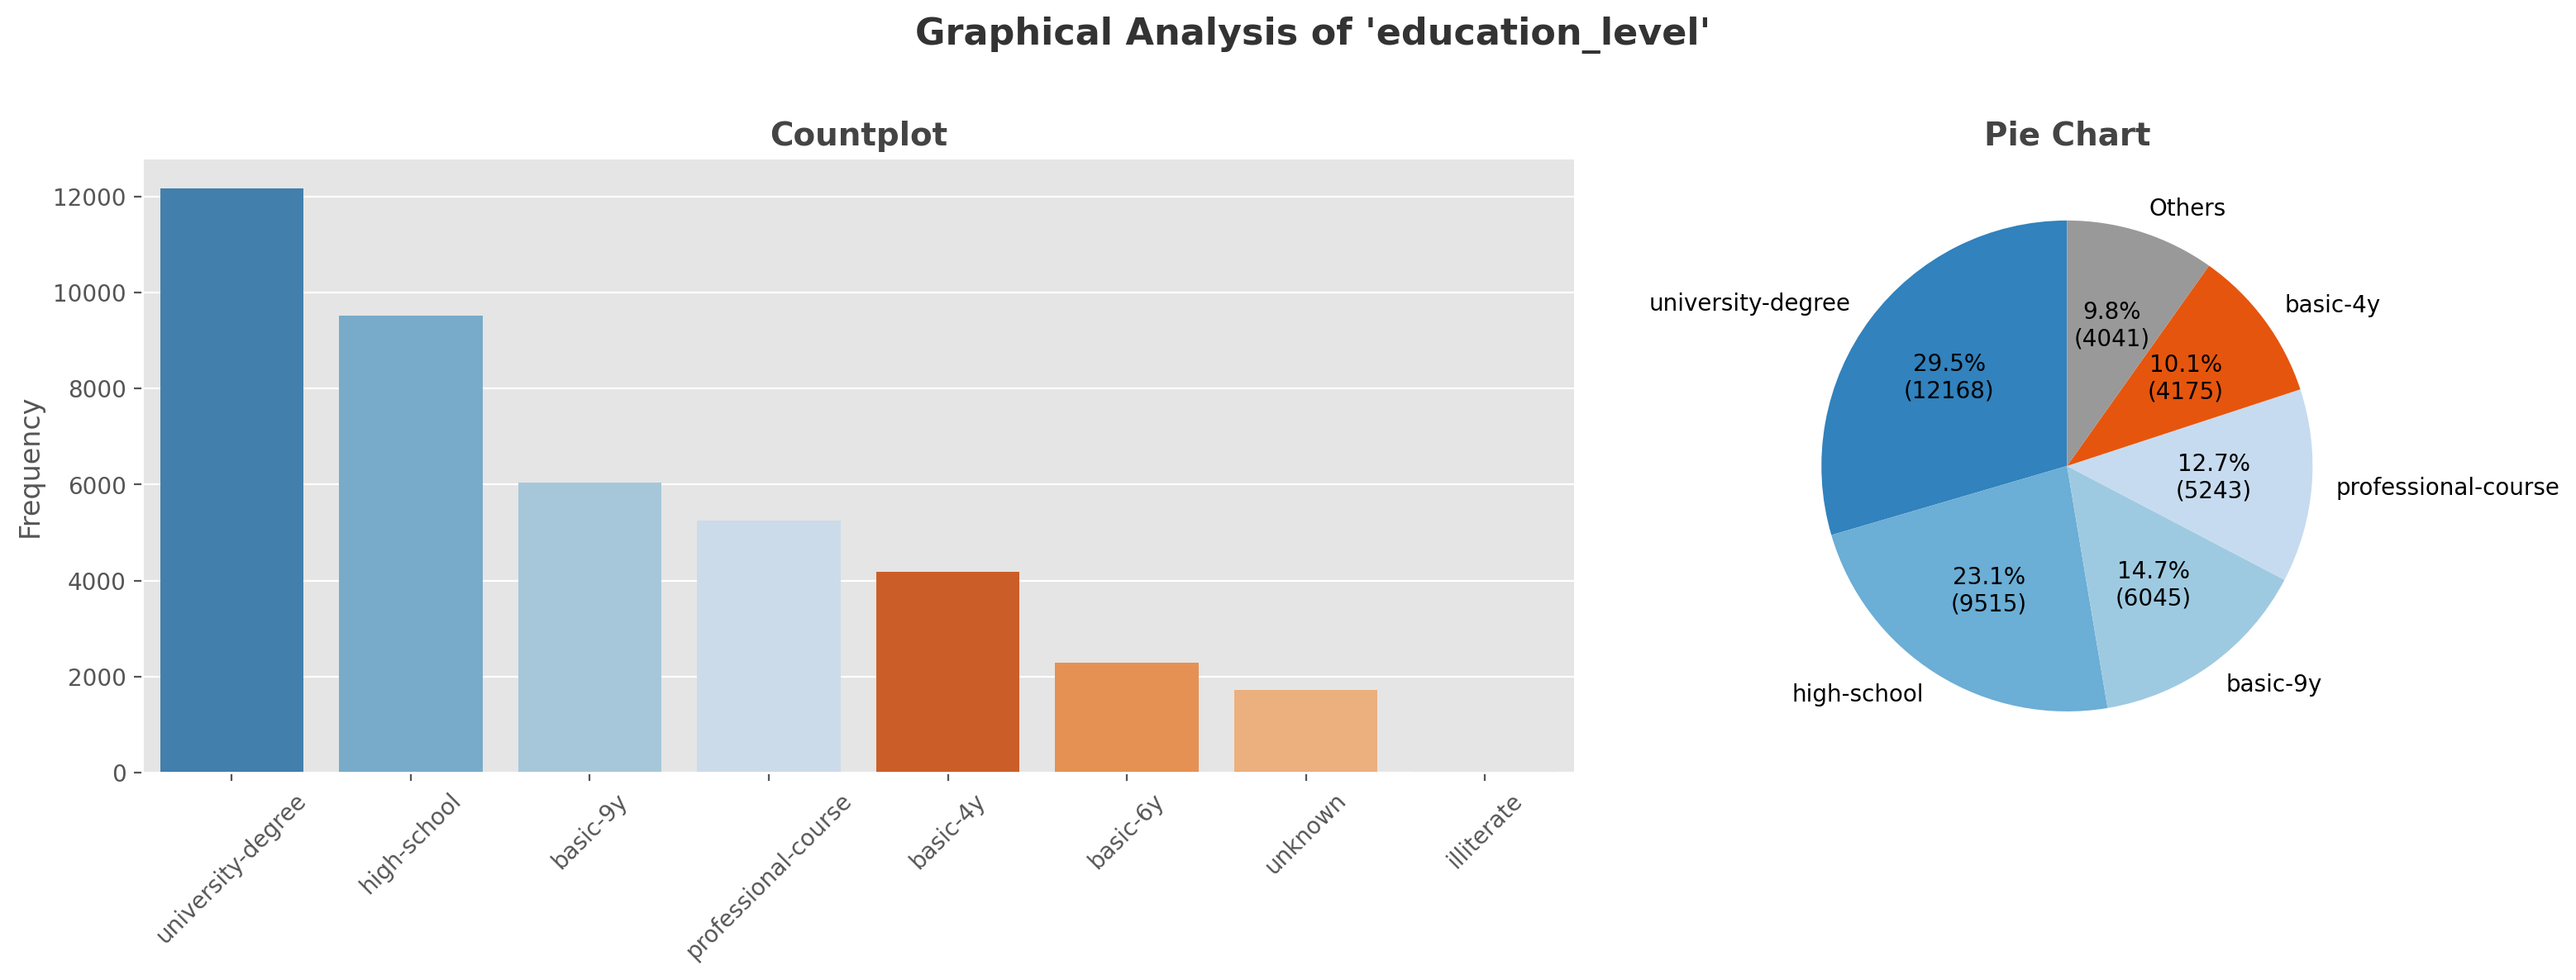

In [40]:
perform_univariate_analysis(df=df_cleaned, feature='education_level', show_plots=True)

---
---
## **🧼 6.8. Explore `credit_default`**

- This column indicates whether the client has a credit in default, providing a binary measure of their financial responsibility or risk profile.

- It offers insights into how a client's credit behavior might influence their likelihood of subscribing to a term deposit. For example, clients with a credit in default may exhibit lower financial stability or trustworthiness, potentially impacting their subscription behavior. Conversely, clients without defaults may be more likely to engage in long-term financial products like term deposits.

- This feature may interact with other financial variables such as `housing_loan` and `personal_loan`. For instance, clients with a credit in default might prioritize resolving their existing financial obligations over committing to new financial products like term deposits. Similarly, clients with multiple financial commitments (e.g., housing loans or personal loans) alongside a credit default may face heightened financial strain, reducing their likelihood of subscribing to additional services.

- As a binary feature, this column can be encoded numerically (e.g., "yes" = 1, "no" = 0) for modeling purposes.

---
**📊 Perform univariate analysis on `credit_default` feature**

In [41]:
perform_univariate_analysis(df=df_cleaned, feature='credit_default', show_plots=False)

🔎 Performing univariate analysis:
 └── Column 'credit_default' (Type: categorical)

📘 Data Type: object
💎 Unique Non-NA Values: 3
📋 List of Unique Non-NA Values: ['no', 'unknown', 'yes']
📊 Frequency Table:


Count  Percentage (%)
no       32,588          79.120
unknown   8,597          20.870
yes           3           0.010

⚠️ Rare Categories (<1%): 1 found
✅ No rows with missing values found.


**└── 💡 Observations / Analysis / Insights ──**

- The analysis reveals that only 3 instances (0.01%) of clients have a credit in default, while a significant portion of the data, 8,597 records (20.87%), is labeled as `unknown`.

- This high proportion of unknowns suggests potential data quality issues or missing information that may need to be addressed during further analysis.

- Additionally, given the extremely low frequency of `yes` (credit in default), this feature may have limited predictive power in its current state. However, the presence of `unknown` values warrants further investigation to determine whether these can be imputed or if they represent a distinct category that could influence the target variable.

- For now, the feature will not be encoded into binary format (e.g., "yes" = 1, "no" = 0) to allow for deeper exploration of the "unknown" category and its potential impact on the analysis. Encoding will be revisited once more clarity is gained about the nature of these unknowns and their relationship with other variables.

---
**🧼 Clean `credit_default` feature**

1. Convert the column to the category data type to optimize memory usage and improve computational efficiency.

In [42]:
from src.clean_data import clean_credit_default
df_cleaned = clean_credit_default(df_cleaned=df_cleaned)
df_cleaned.shape
df_cleaned.head()


   🫧  Cleaning 'credit_default' column...
      └── Converting 'credit_default' column to categorical type...


(41188, 11)

age   occupation marital_status education_level credit_default  \
0   57   technician        married     high-school             no   
1   55      unknown        married         unknown        unknown   
2   33  blue-collar        married        basic-9y             no   
3   36        admin        married     high-school             no   
4   27    housemaid        married     high-school             no   

  housing_loan personal_loan contact_method  campaign_calls  \
0           no           yes           Cell               1   
1          yes            no      telephone               2   
2           no            no       cellular               1   
3           no            no      Telephone               4   
4         None            no           Cell               2   

   previous_contact_days subscription_status  
0                    999                   0  
1                    999                   0  
2                    999                   0  
3                    999                   0  
4                    999                   0

---
**📊 Verify `credit_default` feature after cleaning**

🔎 Performing univariate analysis:
 └── Column 'credit_default' (Type: categorical)

📘 Data Type: category
💎 Unique Non-NA Values: 3
📋 List of Unique Non-NA Values: ['no', 'unknown', 'yes']
📊 Frequency Table:


Count  Percentage (%)
no       32,588          79.120
unknown   8,597          20.870
yes           3           0.010

⚠️ Rare Categories (<1%): 1 found
✅ No rows with missing values found.


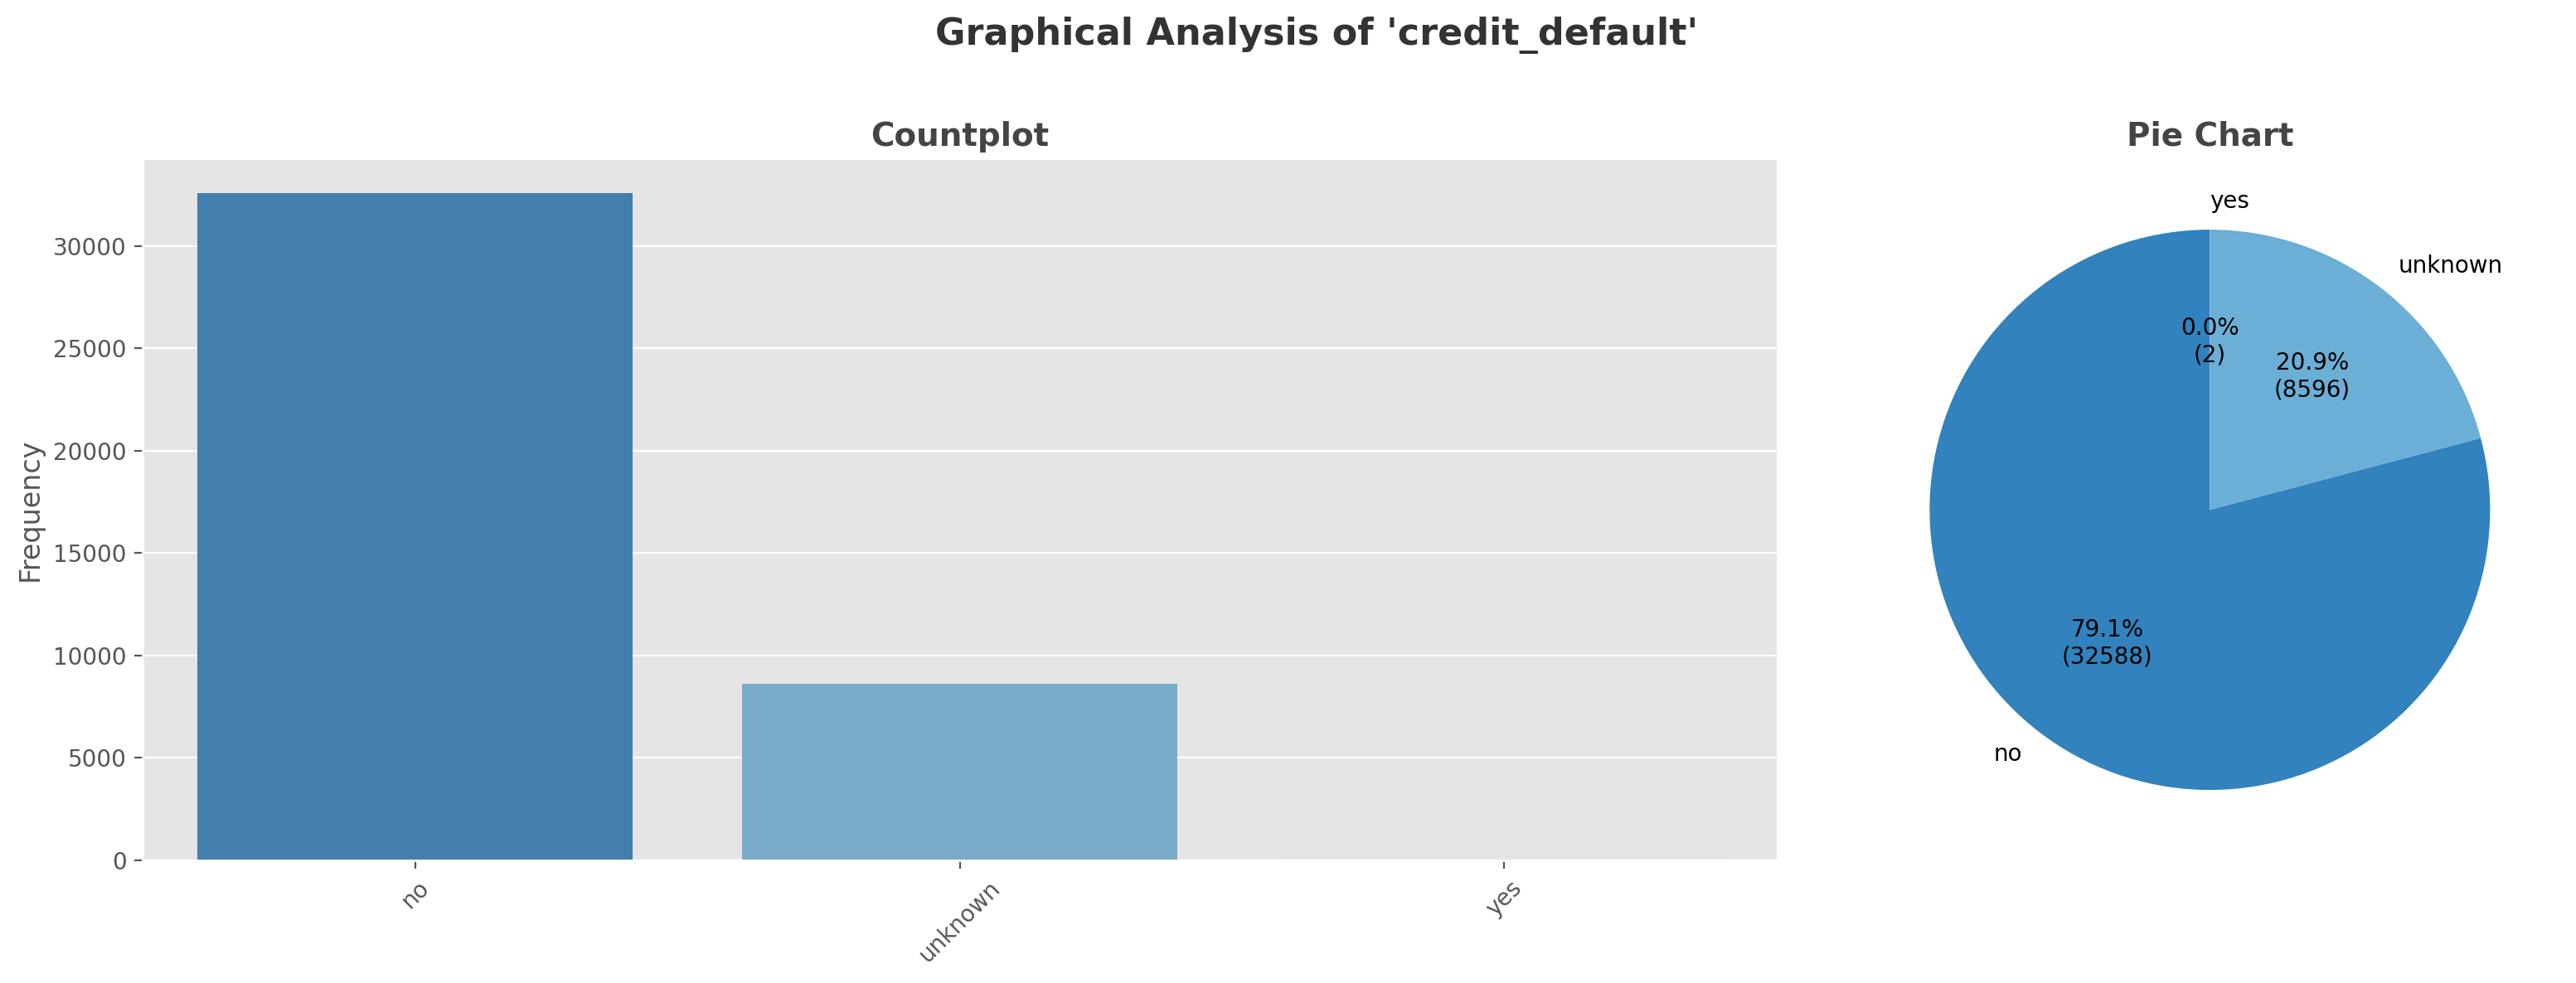

In [43]:
perform_univariate_analysis(df=df_cleaned, feature='credit_default', show_plots=True)

---
---
## **🧼 6.9. Explore `housing_loan`**

- This column indicates whether the client has a housing loan, providing a binary measure of their financial commitments or homeownership status.

- It offers insights into how a client's housing loan status might influence their likelihood of subscribing to a term deposit. For example, clients with a housing loan may have higher financial obligations, potentially reducing their ability or willingness to invest in additional financial products. Conversely, clients without a housing loan may have more disposable income, making them more likely to consider term deposits.

- This feature may interact with other financial variables like `credit_default` and `personal_loan`. For example, clients with a housing loan might avoid additional commitments like personal loans or term deposits due to higher debt obligations. Additionally, clients with a credit in default may avoid further debt due to financial instability. These interactions underscore the need to explore how `housing_loan` influences financial behavior alongside other loan-related features for better feature engineering and modeling.

- As a binary feature, this column can be encoded numerically (e.g., "yes" = 1, "no" = 0) for modeling purposes.

---
**📊 Perform univariate analysis on `housing_loan` feature**

In [44]:
perform_univariate_analysis(df=df_cleaned, feature='housing_loan', show_plots=False)

🔎 Performing univariate analysis:
 └── Column 'housing_loan' (Type: categorical)

📘 Data Type: object
💎 Unique Non-NA Values: 3
📋 List of Unique Non-NA Values: ['no', 'yes', None, 'unknown']
📊 Frequency Table:


Count  Percentage (%)
yes      8,595          52.410
no       7,411          45.190
unknown    393           2.400

⚠️ Rows with missing values: 24789 / 41188 (60.19%)


age    occupation marital_status      education_level credit_default  \
4    27     housemaid        married          high-school             no   
5    58       retired        married  professional-course             no   
8    24  entrepreneur        married    university-degree             no   
10   34   blue-collar        married             basic-9y             no   
12   43   blue-collar         single             basic-9y             no   

   housing_loan personal_loan contact_method  campaign_calls  \
4          None            no           Cell               2   
5          None           yes           Cell               1   
8          None          None      telephone               4   
10         None            no           Cell               3   
12         None            no       cellular               1   

    previous_contact_days subscription_status  
4                     999                   0  
5                     999                   0  
8                     999                   0  
10                    999                   0  
12                    999                   1

**---💡 Observations / Analysis / Insights ---**

- The distribution of the feature is relatively balanced, with 52.41% of clients having a housing loan (`yes`) and 45.19% not having one (`no`).

- A small proportion of the data contains `unknown` values (2.40%), while a significant portion of the data has missing values represented as `None`, accounting for 60.19% of the dataset.

- For now, the `None` values will be imputed as `Missing` to differentiate them from the `unknown` category, as they may represent distinct scenarios (e.g., data entry errors vs. genuine lack of information). This approach allows for further investigation into the nature of these values before making any grouping decisions.

---
**🧼 Clean `housing_loan` feature**

1. Impute missing values (e.g., `None`) with the label `missing` to ensure no data is lost during analysis.

2. Convert the column to the category data type to optimize memory usage and improve computational efficiency.

In [45]:
from src.clean_data import clean_housing_loan
df_cleaned = clean_housing_loan(df_cleaned=df_cleaned)
df_cleaned.shape
df_cleaned.head()


   🫧  Cleaning 'housing_loan' column...
      └── Imputing missing values with 'Missing'...
      └── Converting 'housing_loan' column to categorical type...


(41188, 11)

age   occupation marital_status education_level credit_default  \
0   57   technician        married     high-school             no   
1   55      unknown        married         unknown        unknown   
2   33  blue-collar        married        basic-9y             no   
3   36        admin        married     high-school             no   
4   27    housemaid        married     high-school             no   

  housing_loan personal_loan contact_method  campaign_calls  \
0           no           yes           Cell               1   
1          yes            no      telephone               2   
2           no            no       cellular               1   
3           no            no      Telephone               4   
4      missing            no           Cell               2   

   previous_contact_days subscription_status  
0                    999                   0  
1                    999                   0  
2                    999                   0  
3                    999                   0  
4                    999                   0

---
**📊 Verify `housing_loan` feature after cleaning**

🔎 Performing univariate analysis:
 └── Column 'housing_loan' (Type: categorical)

📘 Data Type: category
💎 Unique Non-NA Values: 4
📋 List of Unique Non-NA Values: ['no', 'yes', 'missing', 'unknown']
📊 Frequency Table:


Count  Percentage (%)
missing  24,789          60.190
yes       8,595          20.870
no        7,411          17.990
unknown     393           0.950

⚠️ Rare Categories (<1%): 1 found
✅ No rows with missing values found.


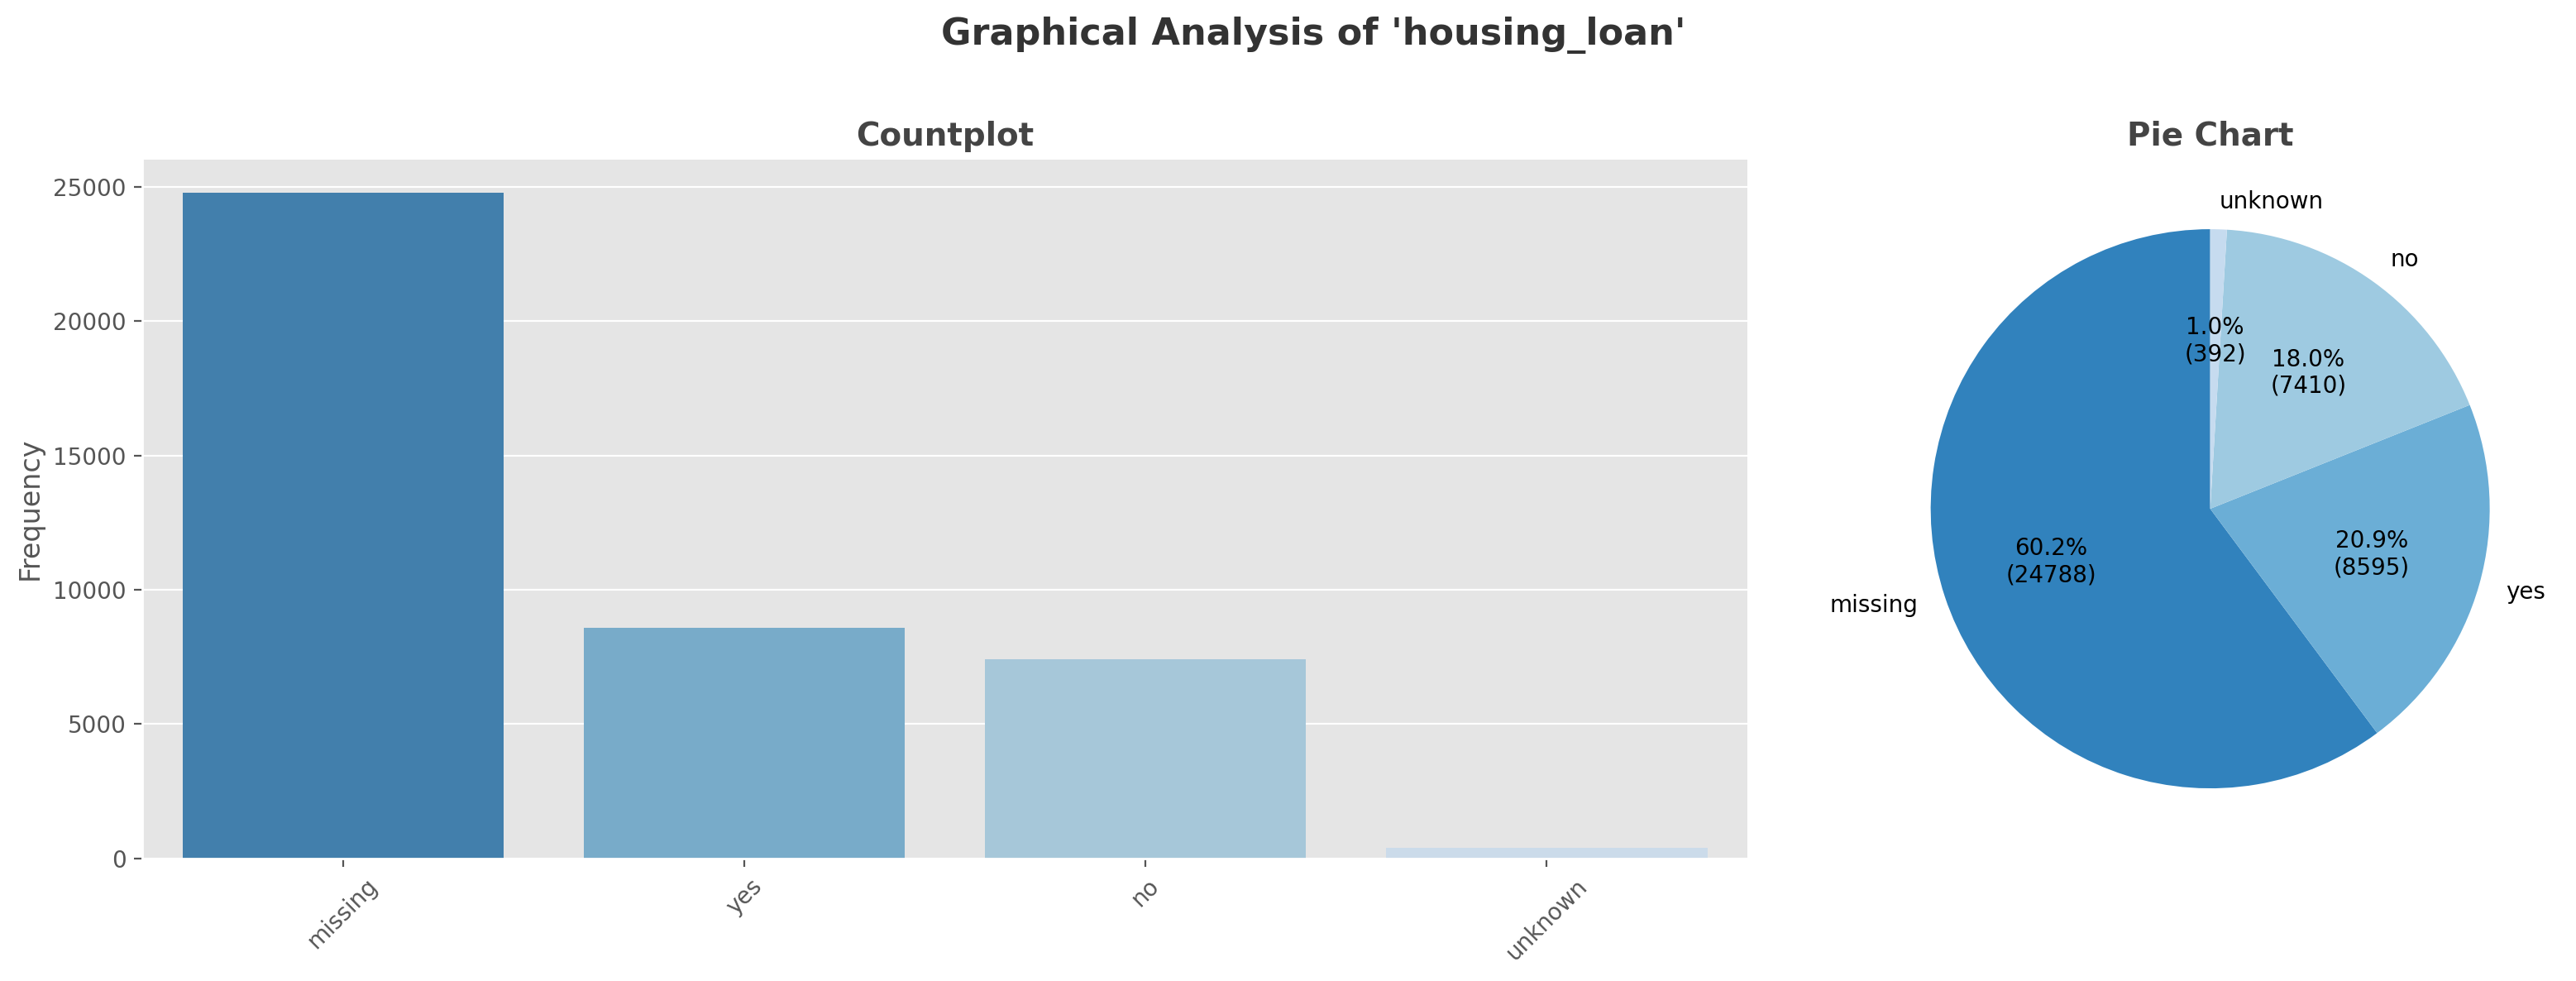

In [46]:
perform_univariate_analysis(df=df_cleaned, feature='housing_loan', show_plots=True)

---
---
## **🧼 6.10. Explore `personal_loan`**

- This column indicates whether the client has a personal loan, providing a binary measure of their existing financial commitments or borrowing behavior.

- It offers insights into how a client's personal loan status might influence their likelihood of subscribing to a term deposit. For example, clients with a personal loan may have higher financial obligations, potentially reducing their ability or willingness to invest in additional financial products like term deposits. Conversely, clients without a personal loan may have more disposable income, making them more likely to consider such investments.

- This feature may interact with other financial variables such as `credit_default` and `housing_loan`. For instance, clients with both a personal loan and a housing loan might prioritize debt repayment over savings, reducing their likelihood of subscribing to a term deposit. Furthermore, clients with a credit in default and a personal loan may exhibit heightened financial instability, further decreasing their propensity to engage in long-term financial products.

- As a binary feature, this column can be encoded numerically (e.g., "yes" = 1, "no" = 0) for modeling purposes.

---
**📊 Perform univariate analysis on `personal_loan` feature**

In [47]:
perform_univariate_analysis(df=df_cleaned, feature='personal_loan', show_plots=False)

🔎 Performing univariate analysis:
 └── Column 'personal_loan' (Type: categorical)

📘 Data Type: object
💎 Unique Non-NA Values: 3
📋 List of Unique Non-NA Values: ['yes', 'no', None, 'unknown']
📊 Frequency Table:


Count  Percentage (%)
no       30,532          82.430
yes       5,633          15.210
unknown     877           2.370

⚠️ Rows with missing values: 4146 / 41188 (10.07%)


age    occupation marital_status    education_level credit_default  \
7   150         admin       divorced  university-degree        unknown   
8    24  entrepreneur        married  university-degree             no   
58   41         admin       divorced  university-degree             no   
63   45   blue-collar        married           basic-4y             no   
80   41    management        married        high-school        unknown   

   housing_loan personal_loan contact_method  campaign_calls  \
7           yes          None           Cell               7   
8       missing          None      telephone               4   
58          yes          None           Cell               2   
63      missing          None      Telephone               3   
80          yes          None           Cell               2   

    previous_contact_days subscription_status  
7                     999                   0  
8                     999                   0  
58                      6                   1  
63                    999                   0  
80                    999                   0

**---💡 Observations / Analysis / Insights ---**

- The distribution of the feature is imbalanced, with 82.43% of clients not having a personal loan (`no`) and only 15.21% having one (`yes`). This skewness suggests that the majority of clients in the dataset do not carry personal loans.

- A small proportion of the data contains `unknown` values (2.37% ), while a more significant portion has missing values represented as `None`, accounting for 10.07% of the dataset. These discrepancies highlight potential data quality issues that need to be addressed to ensure consistency in analysis.

- To handle these missing values, the `None` entries will be temporarily imputed as `Missing` to distinguish them from the unknown category. This separation allows for further exploration to determine whether these categories represent distinct scenarios (e.g., data entry errors vs. genuine lack of information) before making any grouping or modeling decisions.

---
**🧼 Clean `personal_loan` feature**

1. Impute missing values (e.g., `None`) with the label `missing` to ensure no data is lost during analysis.

2. Convert the column to the category data type to optimize memory usage and improve computational efficiency.

In [48]:
from src.clean_data import clean_personal_loan
df_cleaned = clean_personal_loan(df_cleaned=df_cleaned)
df_cleaned.shape
df_cleaned.head()


   🫧  Cleaning 'personal_loan' column...
      └── Imputing missing values with 'Missing'...
      └── Converting 'personal_loan' column to categorical type...


(41188, 11)

age   occupation marital_status education_level credit_default  \
0   57   technician        married     high-school             no   
1   55      unknown        married         unknown        unknown   
2   33  blue-collar        married        basic-9y             no   
3   36        admin        married     high-school             no   
4   27    housemaid        married     high-school             no   

  housing_loan personal_loan contact_method  campaign_calls  \
0           no           yes           Cell               1   
1          yes            no      telephone               2   
2           no            no       cellular               1   
3           no            no      Telephone               4   
4      missing            no           Cell               2   

   previous_contact_days subscription_status  
0                    999                   0  
1                    999                   0  
2                    999                   0  
3                    999                   0  
4                    999                   0

---
**📊 Verify `personal_loan` feature after cleaning**

🔎 Performing univariate analysis:
 └── Column 'personal_loan' (Type: categorical)

📘 Data Type: category
💎 Unique Non-NA Values: 4
📋 List of Unique Non-NA Values: ['yes', 'no', 'missing', 'unknown']
📊 Frequency Table:


Count  Percentage (%)
no       30,532          74.130
yes       5,633          13.680
missing   4,146          10.070
unknown     877           2.130

✅ No rows with missing values found.


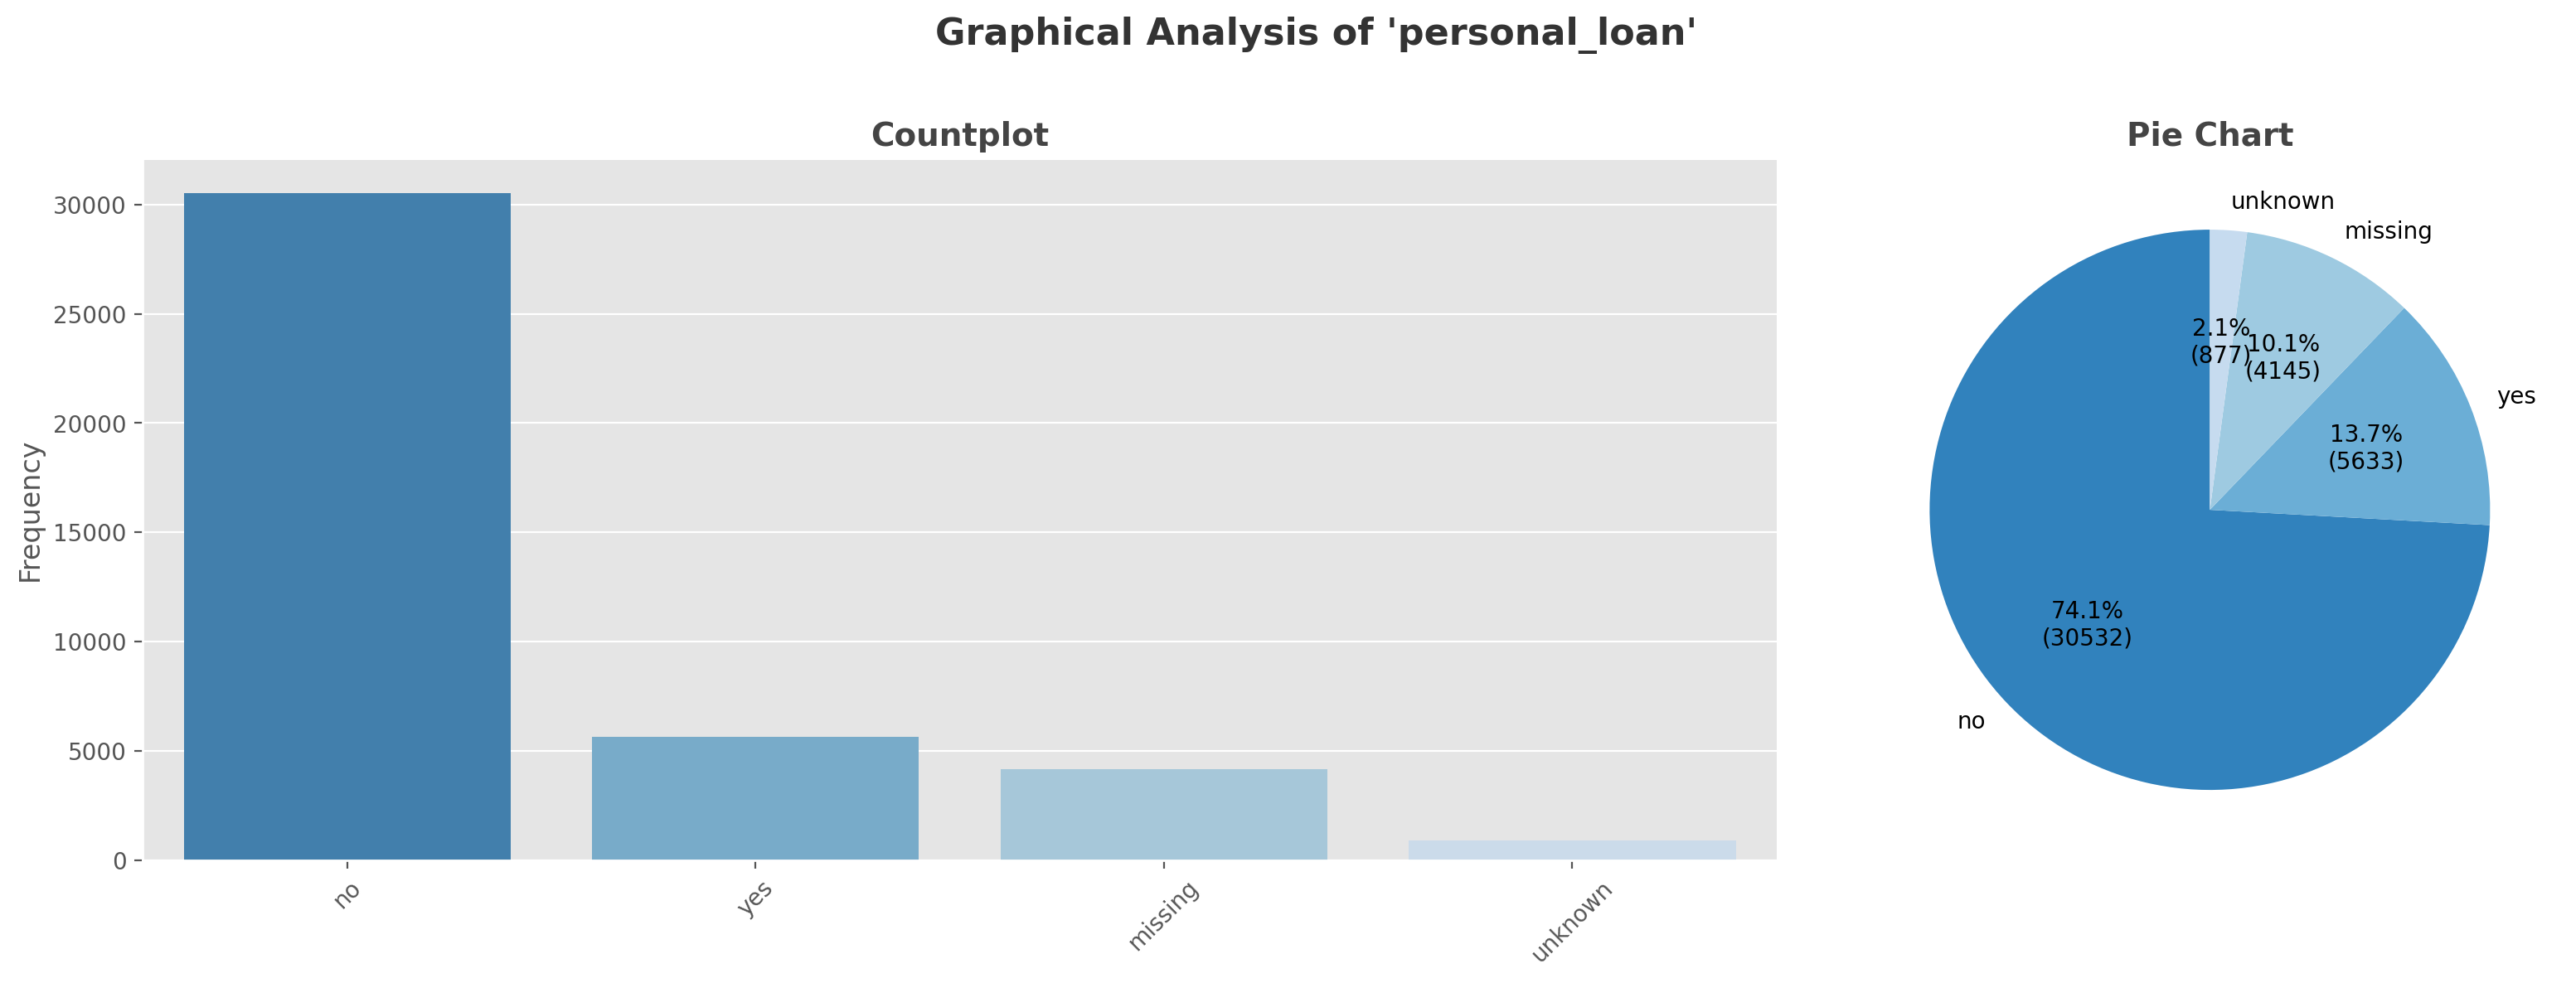

In [49]:
perform_univariate_analysis(df=df_cleaned, feature='personal_loan', show_plots=True)

---
---
## **🧼 6.11. Explore `contact_method`**

- This column represents the communication type used for the last contact with the client, providing a categorical measure of the channel through which the bank interacted with the client.

- It offers insights into how the choice of communication method (e.g., telephone or cellular) might influence the likelihood of a client subscribing to a term deposit. For example, certain contact methods may be more effective in engaging clients compared to others, potentially impacting their subscription behavior.

- Additionally, this feature may interact with other variables such as `campaign_calls`, `age`, or `occupation`. For instance, clients contacted via cellular might respond differently based on their age group, with younger clients being more reachable and responsive through mobile devices. Additionally, clients with higher campaign call counts might exhibit different behaviors depending on the contact method used, highlighting potential trends for feature engineering.

- It is hypothesized that the feature will be one-hot encoded, as there is no inherent order among contact method categories. This approach ensures each category is treated as a distinct group, avoiding unintended ordinal relationships from alternative encoding methods.

---
**📊 Perform univariate analysis on `contact_method` feature**

In [50]:
perform_univariate_analysis(df=df_cleaned, feature='contact_method', show_plots=False)

🔎 Performing univariate analysis:
 └── Column 'contact_method' (Type: categorical)

📘 Data Type: object
💎 Unique Non-NA Values: 4
📋 List of Unique Non-NA Values: ['Cell', 'telephone', 'cellular', 'Telephone']
📊 Frequency Table:


Count  Percentage (%)
Cell       13,100          31.810
cellular   13,044          31.670
Telephone   7,585          18.420
telephone   7,459          18.110

⚠️ Potential inconsistent capitalization (e.g., 'USA' vs 'usa')
✅ No rows with missing values found.


**---💡 Observations / Analysis / Insights ---**

- The column contains inconsistent string values for each category, such as `Cell` vs. `cellular` and `Telephone` vs. `telephone`. These discrepancies likely represent the same contact methods but are recorded with variations in capitalization or phrasing. Standardizing these categories (e.g., consolidating "Cell" and "cellular" into a single category) is necessary to ensure consistency and avoid misinterpretation during analysis.

- A preliminary review of the data suggests that "cellular" (including both `Cell` and `cellular`) appears more frequently than "telephone" (including both `Telephone` and `telephone`). This indicates that mobile-based communication may be the predominant method used to contact clients, potentially reflecting its convenience or higher engagement rates compared to traditional landline calls. Further analysis will confirm whether this trend holds and explore its implications for client behavior and campaign effectiveness.

---
**🧼 Clean `contact_method` feature**

1. Standardize inconsistent string values by mapping variations of the same category (e.g., `Cell` and `cellular`) to a consistent label (e.g., `cellular`).

2. Convert the column to the category data type to optimize memory usage and improve computational efficiency.

In [51]:
from src.clean_data import clean_contact_method
df_cleaned = clean_contact_method(df_cleaned=df_cleaned)
df_cleaned.shape
df_cleaned.head()


   🫧  Cleaning 'contact_method' column...
      └── Standardizing inconsistent string values...
      └── Converting 'contact_method' column to category data type...


(41188, 11)

age   occupation marital_status education_level credit_default  \
0   57   technician        married     high-school             no   
1   55      unknown        married         unknown        unknown   
2   33  blue-collar        married        basic-9y             no   
3   36        admin        married     high-school             no   
4   27    housemaid        married     high-school             no   

  housing_loan personal_loan contact_method  campaign_calls  \
0           no           yes       cellular               1   
1          yes            no      telephone               2   
2           no            no       cellular               1   
3           no            no      telephone               4   
4      missing            no       cellular               2   

   previous_contact_days subscription_status  
0                    999                   0  
1                    999                   0  
2                    999                   0  
3                    999                   0  
4                    999                   0

---
**📊 Verify `contact_method` feature after cleaning**

🔎 Performing univariate analysis:
 └── Column 'contact_method' (Type: categorical)

📘 Data Type: category
💎 Unique Non-NA Values: 2
📋 List of Unique Non-NA Values: ['cellular', 'telephone']
📊 Frequency Table:


Count  Percentage (%)
cellular   26,144          63.470
telephone  15,044          36.530

✅ No rows with missing values found.


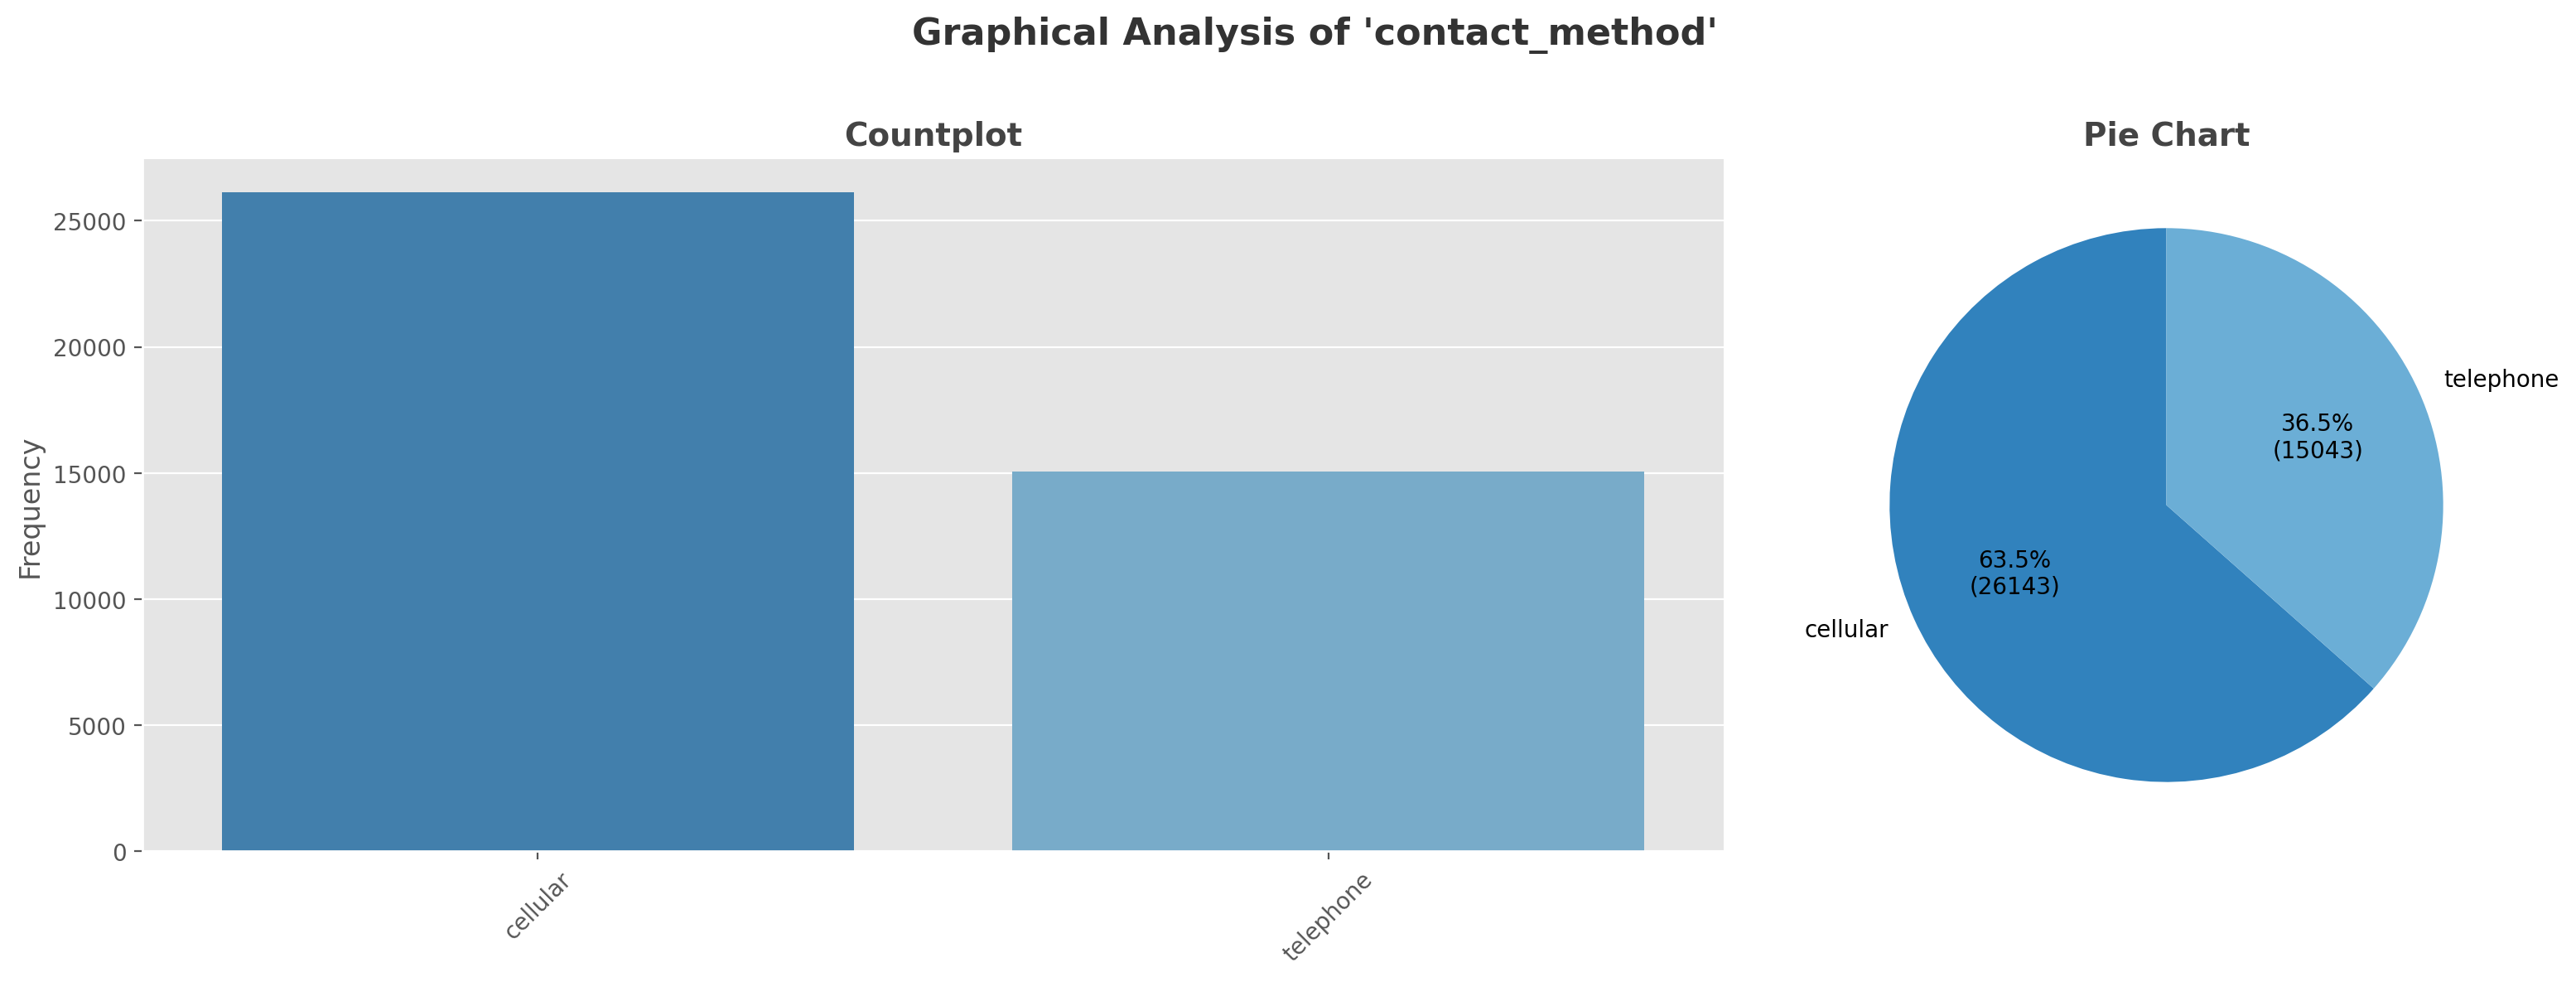

In [52]:
perform_univariate_analysis(df=df_cleaned, feature='contact_method', show_plots=True)

---
---
## **🧼 6.12. Explore `campaign_calls`**

- This column represents the total number of contacts performed during the campaign for this client, including the last contact. It provides a numerical measure of the intensity of outreach efforts directed toward the client.

- It offers insights into how the frequency of contact might influence the likelihood of a client subscribing to a term deposit. For example, clients who were contacted more frequently may have been exposed to more persuasive messaging, potentially increasing their likelihood of subscription. However, excessive contact could lead to annoyance or disengagement, creating a non-linear relationship that requires further exploration.

- Additionally, this feature may interact with other variables such as `contact_method` or `age`. For instance, clients contacted via cellular might respond differently to higher call counts compared to those contacted via telephone, depending on their accessibility and responsiveness to mobile communication. Furthermore, younger clients might tolerate or engage more with frequent calls, while older clients might find it intrusive, highlighting potential trends for feature engineering.

- As a numerical feature, this column can be directly used in modeling. However, transformations such as binning (e.g., low, medium, high call counts) or scaling (e.g., normalization) might be considered if the data distribution is skewed or if non-linear relationships are detected during analysis.

---
**📊 Perform univariate analysis on `campaign_calls` feature**

In [53]:
perform_univariate_analysis(df=df_cleaned, feature='campaign_calls', show_plots=False)

🔎 Performing univariate analysis:
 └── Column 'campaign_calls' (Type: numerical)

📘 Data Type: int64
💎 Unique Non-NA Values: 70
📊 Summary Statistics:


📈 Distribution Shape:
   └── Skewness: 2.17 ⚠️
   └── Kurtosis (excess): 25.67 ⚠️

🔍 Outlier Detection: IQR Method (due to skew/kurtosis)
   └── ⚠️ 3420 outliers found (8.30% of rows)
   └── Outliers summary:


✅ No rows with missing values found.


---
**📊 Explore negative values in the `campaign_calls` feature**

In [54]:
campaign_calls_negative_values = df_cleaned[df_cleaned['campaign_calls'] < 0]
campaign_calls_percentage_negative = (len(campaign_calls_negative_values) / len(df_cleaned)) * 100  
print(f"Percentage of negative values: {campaign_calls_percentage_negative:.2f}%") 
campaign_calls_negative_values

Percentage of negative values: 10.08%


age   occupation marital_status      education_level credit_default  \
17     150   technician        married  professional-course             no   
23      30        admin         single          high-school             no   
36      33        admin         single    university-degree             no   
48      44   technician        married  professional-course             no   
52      36  blue-collar        married             basic-9y        unknown   
...    ...          ...            ...                  ...            ...   
41099   38     services        married          high-school             no   
41138   25  blue-collar        married  professional-course        unknown   
41158   36        admin       divorced    university-degree             no   
41165   35   management         single    university-degree             no   
41173   80      retired        married             basic-4y             no   

      housing_loan personal_loan contact_method  campaign_calls  \
17         missing           yes       cellular             -11   
23         missing           yes       cellular              -3   
36             yes            no       cellular              -1   
48             yes            no       cellular              -9   
52         missing            no      telephone              -1   
...            ...           ...            ...             ...   
41099      missing           yes      telephone              -1   
41138      missing            no      telephone              -2   
41158           no            no      telephone              -4   
41165      missing            no       cellular              -2   
41173      missing            no       cellular              -1   

       previous_contact_days subscription_status  
17                       999                   0  
23                       999                   0  
36                       999                   0  
48                       999                   0  
52                       999                   0  
...                      ...                 ...  
41099                    999                   0  
41138                    999                   0  
41158                    999                   0  
41165                    999                   0  
41173                      3                   0  

[4153 rows x 11 columns]

**---💡 Observations / Analysis / Insights ---**

- There are 4,153 negative values in the column, accounting for 10.08% of the data.

- Since this feature represents the total number of contacts performed during a campaign, it should inherently be non-negative. Negative values are inconsistent with the logical definition of the feature and may introduce bias or inaccuracies if left unaddressed.

- Removing rows with negative values would result in the loss of approximately 10% of the data, significantly reducing the sample size and potentially skewing the analysis. To avoid this, we propose taking the absolute value (modding) of these entries. This approach retains the records while correcting the sign error, ensuring minimal distortion of the underlying data.

- It is reasonable to assume that the magnitude of the negative values reflects the actual number of contacts made, but the sign was incorrectly recorded due to technical or human errors. Modding allows us to preserve the numerical information encoded in these values, maintaining the integrity of the dataset for modeling purposes.

- To validate this approach, consulting domain experts or reviewing documentation is recommended. If confirmed that negative values are indeed errors, modding becomes a practical and justifiable solution that balances data accuracy and retention.

- For our analysis, we will proceed by taking the absolute value of the negative entries in the column to ensure consistency and usability of the feature.

---
**🧼 Clean `campaign_calls` feature**

1. Take the absolute value (mod) of all negative values to correct for illogical negative entries.

In [55]:
from src.clean_data import clean_campaign_calls
df_cleaned = clean_campaign_calls(df_cleaned=df_cleaned)
df_cleaned.shape
df_cleaned.head()


   🫧  Cleaning 'campaign_calls' column...
      └── Taking the absolute value of negative entries in 'campaign_calls'...
      └── Corrected 4153 negative values using absolute value (mod).


(41188, 11)

age   occupation marital_status education_level credit_default  \
0   57   technician        married     high-school             no   
1   55      unknown        married         unknown        unknown   
2   33  blue-collar        married        basic-9y             no   
3   36        admin        married     high-school             no   
4   27    housemaid        married     high-school             no   

  housing_loan personal_loan contact_method  campaign_calls  \
0           no           yes       cellular               1   
1          yes            no      telephone               2   
2           no            no       cellular               1   
3           no            no      telephone               4   
4      missing            no       cellular               2   

   previous_contact_days subscription_status  
0                    999                   0  
1                    999                   0  
2                    999                   0  
3                    999                   0  
4                    999                   0

---
**📊 Verify `campaign_calls` feature after cleaning**

🔎 Performing univariate analysis:
 └── Column 'campaign_calls' (Type: numerical)

📘 Data Type: int64
💎 Unique Non-NA Values: 42
📊 Summary Statistics:


📈 Distribution Shape:
   └── Skewness: 4.76 ⚠️
   └── Kurtosis (excess): 36.98 ⚠️

🔍 Outlier Detection: IQR Method (due to skew/kurtosis)
   └── ⚠️ 2406 outliers found (5.84% of rows)
   └── Outliers summary:


✅ No rows with missing values found.


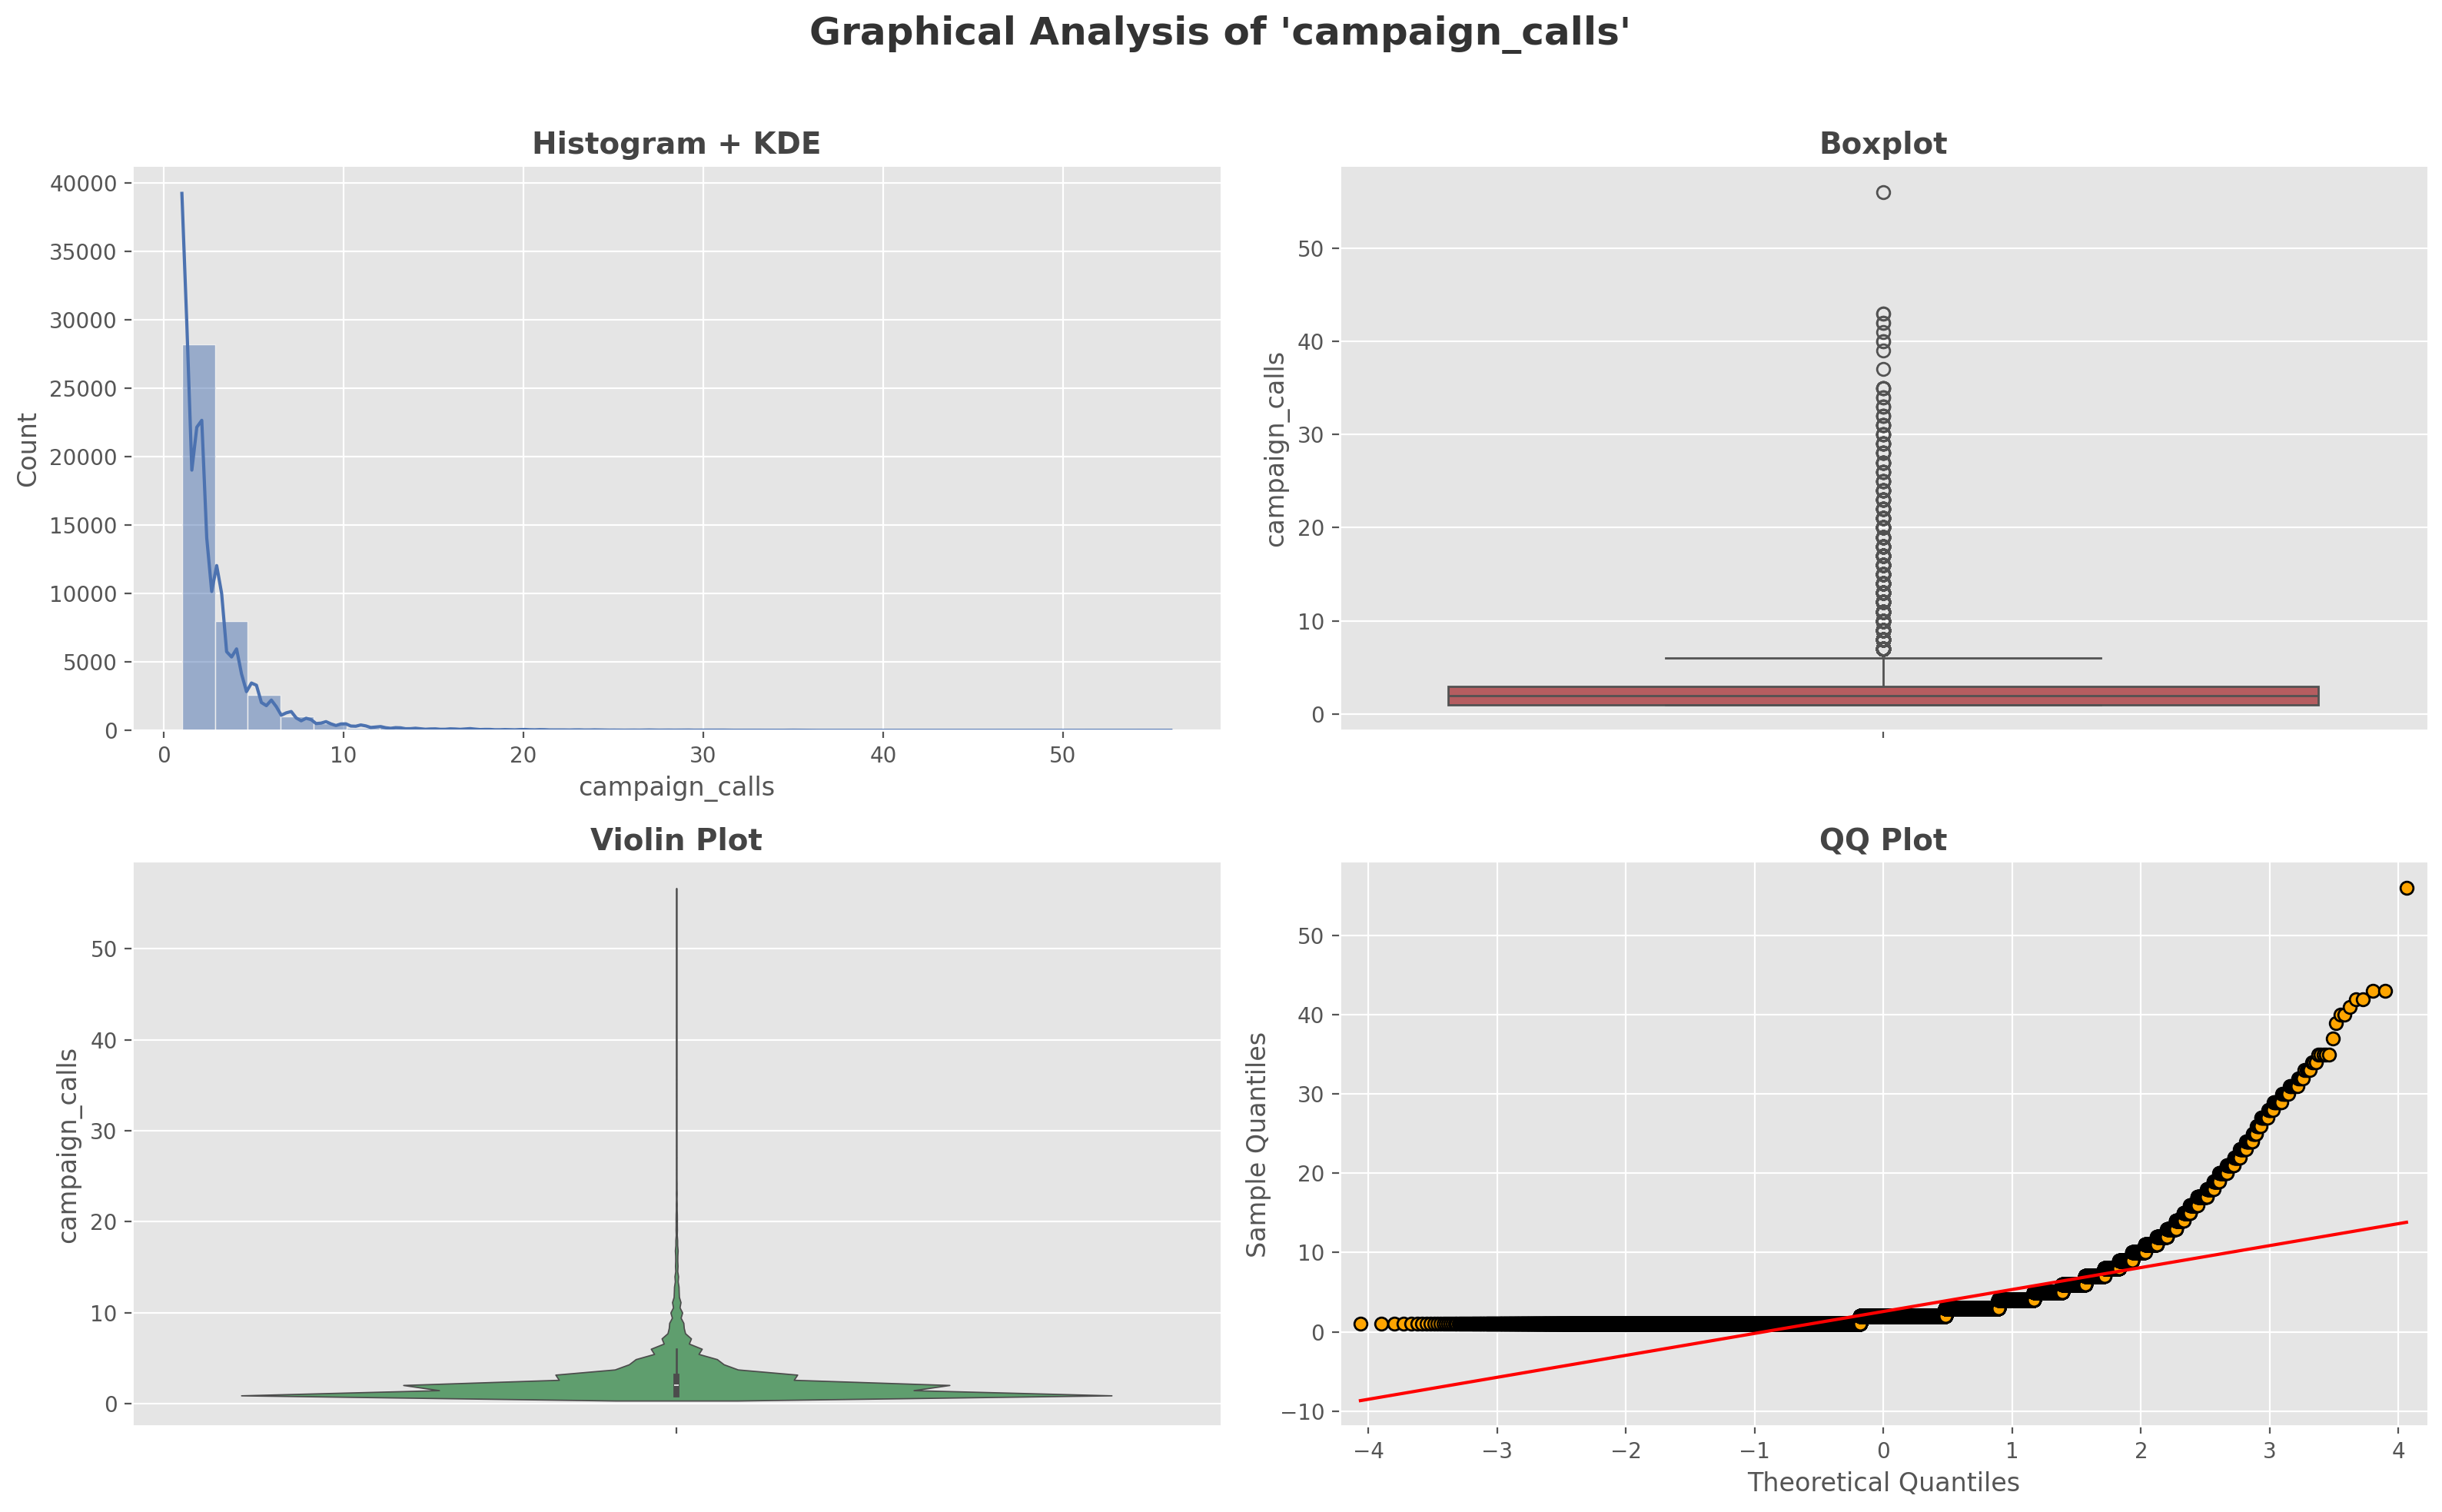

In [56]:
perform_univariate_analysis(df=df_cleaned, feature='campaign_calls', show_plots=True)

**---💡 Observations / Analysis / Insights ---**

- The column exhibits a high degree of skewness (Skewness = 4.76) and kurtosis (Kurtosis = 36.98), indicating that the data is heavily right-skewed with a long tail on the higher end. This suggests that most clients receive a relatively small number of campaign calls, while a few clients have significantly more calls. The skewed nature of the data is also confirmed visually with the histogram and boxplot, where there is a long tail extending towards higher values.

- The high skewness and presence of outliers suggest that the distribution of `campaign_calls` is non-normal. This could impact modeling performance if not addressed, as many machine learning algorithms assume normality in the data.

- Outliers may represent extreme cases where certain clients received an unusually high number of campaign calls. Investigating these cases further could provide insights into why such outliers exist and whether they should be retained or handled differently during preprocessing. Further analysis will explore how these characteristics influence subscription behavior and guide feature engineering decisions.

---
---
## **🧼 6.13. Explore `previous_contact_days`**

- This column represents the number of days that passed since the client was last contacted in a previous campaign, with a value of `999` indicating no prior contact. It provides a numerical measure of the recency of past interactions between the bank and the client.

- It offers insights into how the timing of past contact might influence the likelihood of a client subscribing to a term deposit. For example, clients who were contacted more recently may have stronger recall of the bank's messaging, potentially increasing their likelihood of subscription. Conversely, clients with no prior contact (999) or those contacted a long time ago may require more effort to engage, as their familiarity with the bank’s offerings may have diminished over time.

- Additionally, this feature may interact with other variables such as `campaign_calls` or `contact_method`. For instance, clients with frequent recent contacts (low `previous_contact_days` and high `campaign_calls`) might exhibit higher engagement due to repeated exposure. Also, the effectiveness of the `contact_method` (e.g., cellular vs. telephone) might vary depending on how recently the client was contacted, highlighting potential trends for feature engineering.

- As a numerical feature, this column can be directly used in modeling.

---
**📊 Perform univariate analysis on `previous_contact_days` feature**

In [57]:
perform_univariate_analysis(df=df_cleaned, feature='previous_contact_days', show_plots=False)

🔎 Performing univariate analysis:
 └── Column 'previous_contact_days' (Type: numerical)

📘 Data Type: int64
💎 Unique Non-NA Values: 27
📊 Summary Statistics:


📈 Distribution Shape:
   └── Skewness: -4.92 ⚠️
   └── Kurtosis (excess): 22.23 ⚠️

🔍 Outlier Detection: IQR Method (due to skew/kurtosis)
   └── ⚠️ 1515 outliers found (3.68% of rows)
   └── Outliers summary:


✅ No rows with missing values found.


**---💡 Observations / Analysis / Insights ---**

- The value `999`, representing no prior contact, accounts for a significant portion of the dataset (96.32%). This dominance suggests that the majority of clients were not contacted in previous campaigns, making this category highly influential in the analysis.

- To better capture the unique impact of `999`, we will create an additional binary feature, such as `has_prior_contact`. This feature would explicitly distinguish between clients with no prior contact and those who were previously contacted, providing clearer insights into how prior engagement influences subscription behavior.

- For the remaining values (i.e., clients with prior contact), further analysis is warranted to explore their distribution and relationship with the target variable. Transformations such as binning (e.g., categorizing days into short-term, medium-term, and long-term gaps) or scaling may be applied if the data exhibits skewness or non-linear patterns.

- This approach ensures that the distinct characteristics of the `999` category are preserved while enabling more nuanced modeling of clients who were previously contacted.

---
**🧼 Clean `previous_contact_days` feature**

1. Add a new binary feature called `has_prior_contact` to explicitly distinguish between clients with no prior contact (`999`) and those who were previously contacted. 

In [58]:
from src.clean_data import clean_previous_contact_days
df_cleaned = clean_previous_contact_days(df_cleaned=df_cleaned)
df_cleaned.shape
df_cleaned.head()


   🫧  Cleaning 'previous_contact_days' column...
      └── Adding binary feature 'has_prior_contact'...
      └── Converting 'contact_method' column to category data type...


(41188, 12)

age   occupation marital_status education_level credit_default  \
0   57   technician        married     high-school             no   
1   55      unknown        married         unknown        unknown   
2   33  blue-collar        married        basic-9y             no   
3   36        admin        married     high-school             no   
4   27    housemaid        married     high-school             no   

  housing_loan personal_loan contact_method  campaign_calls has_prior_contact  \
0           no           yes       cellular               1                no   
1          yes            no      telephone               2                no   
2           no            no       cellular               1                no   
3           no            no      telephone               4                no   
4      missing            no       cellular               2                no   

   previous_contact_days subscription_status  
0                    999                   0  
1                    999                   0  
2                    999                   0  
3                    999                   0  
4                    999                   0

---
**📊 Verify the new `has_prior_contact` feature after cleaning**

🔎 Performing univariate analysis:
 └── Column 'has_prior_contact' (Type: categorical)

📘 Data Type: category
💎 Unique Non-NA Values: 2
📋 List of Unique Non-NA Values: ['no', 'yes']
📊 Frequency Table:


Count  Percentage (%)
no   39,673          96.320
yes   1,515           3.680

✅ No rows with missing values found.


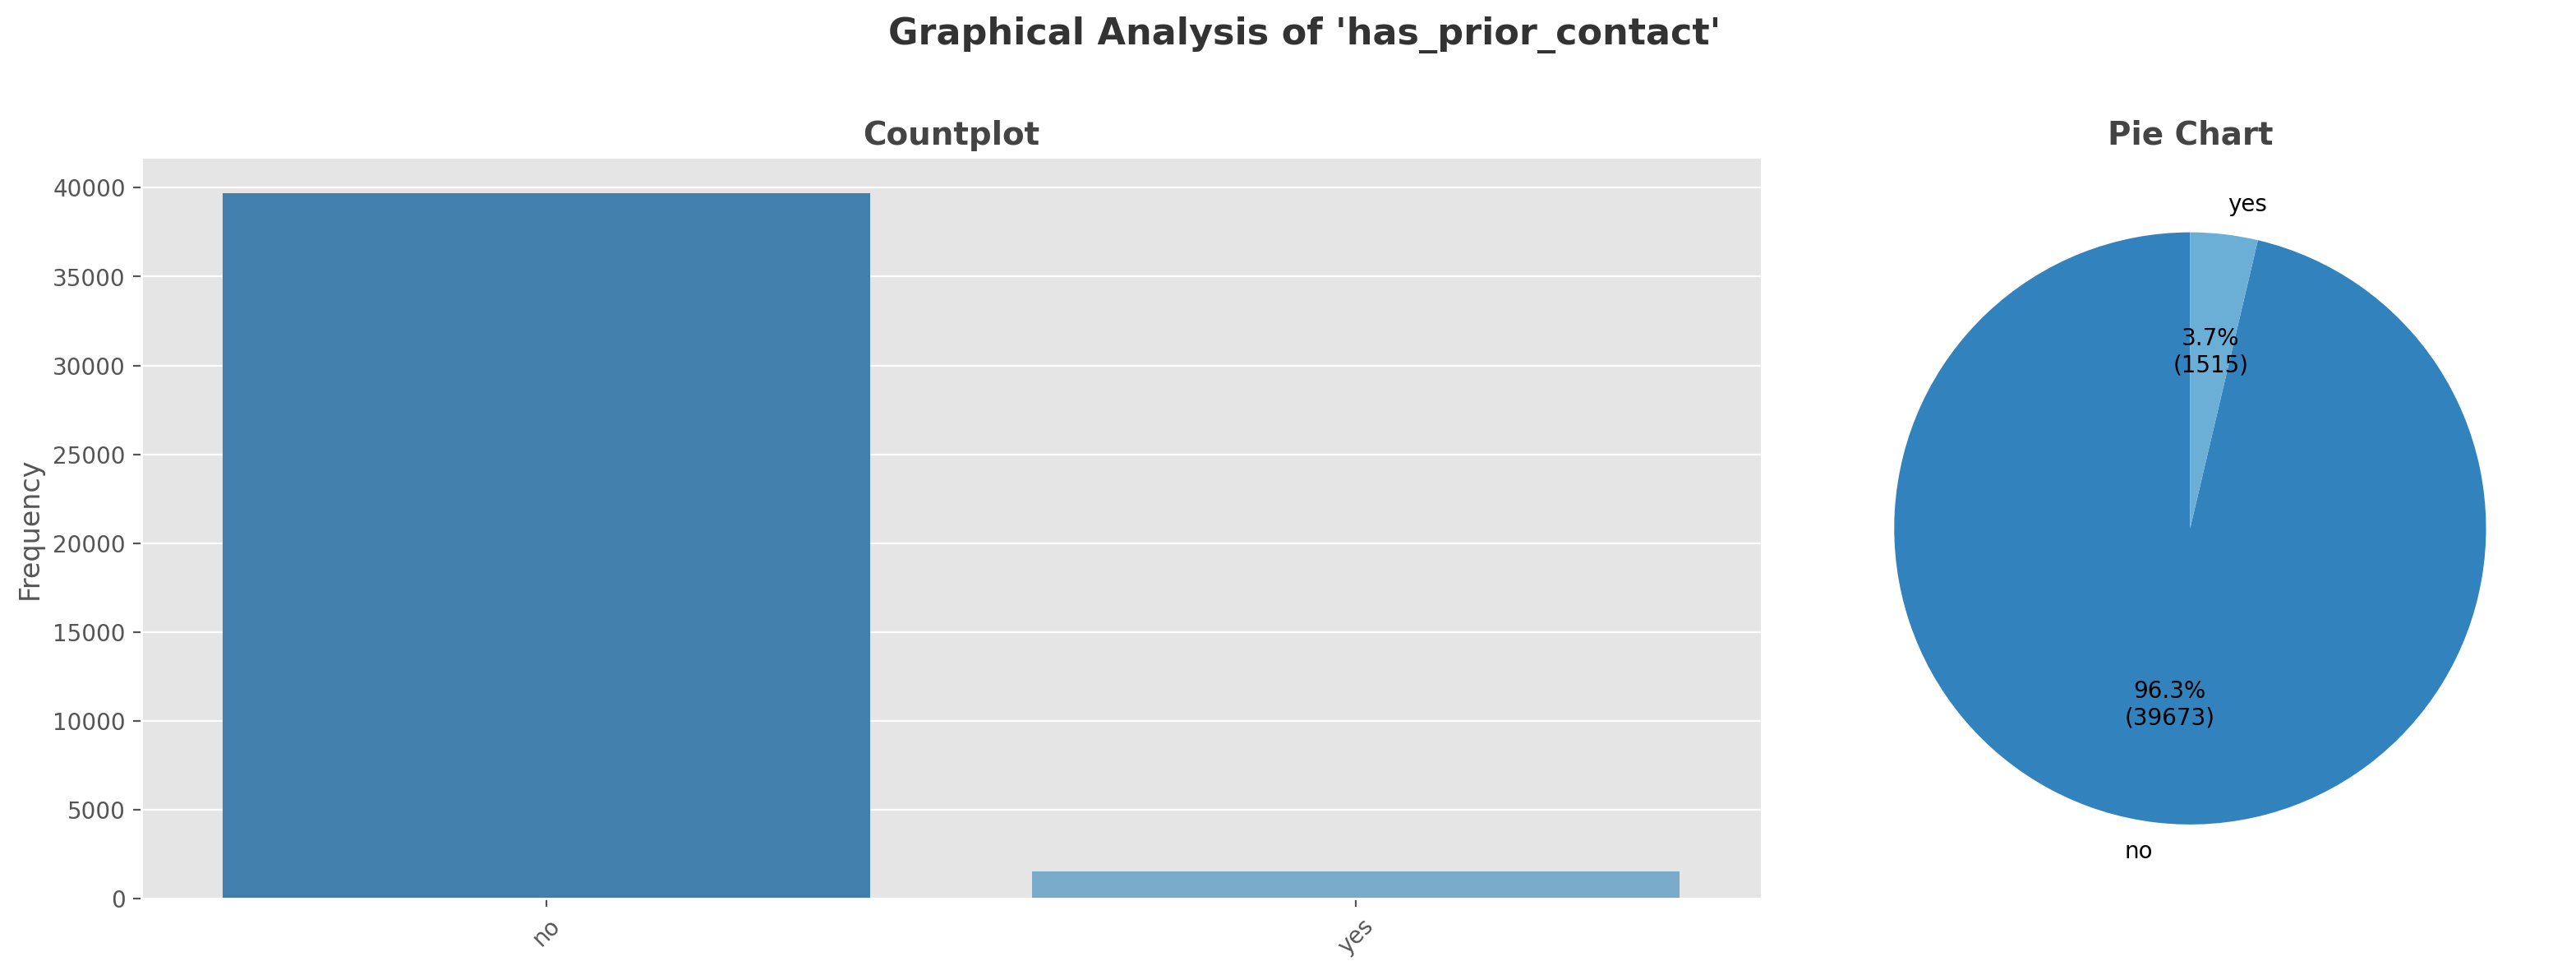

In [59]:
perform_univariate_analysis(df=df_cleaned, feature='has_prior_contact', show_plots=True)

---
## 🏷️ **6.14. Review Dataset**

A quick inspection of summary statistics and key distributions confirms the integrity of the data, ensuring it is prepared for exploratory data analysis (EDA) and subsequent modeling stages.

---
**📊 Review the cleaned DataFrame**

In [60]:
df_cleaned

age   occupation marital_status      education_level credit_default  \
0       57   technician        married          high-school             no   
1       55      unknown        married              unknown        unknown   
2       33  blue-collar        married             basic-9y             no   
3       36        admin        married          high-school             no   
4       27    housemaid        married          high-school             no   
...    ...          ...            ...                  ...            ...   
41183   58      retired        married  professional-course        unknown   
41184   37   management        married    university-degree             no   
41185   35        admin        married          high-school             no   
41186   40   management        married    university-degree             no   
41187   29        admin         single    university-degree             no   

      housing_loan personal_loan contact_method  campaign_calls  \
0               no           yes       cellular               1   
1              yes            no      telephone               2   
2               no            no       cellular               1   
3               no            no      telephone               4   
4          missing            no       cellular               2   
...            ...           ...            ...             ...   
41183           no            no      telephone               2   
41184           no            no      telephone               1   
41185      missing            no       cellular               1   
41186      missing            no      telephone               2   
41187          yes            no       cellular               2   

      has_prior_contact  previous_contact_days subscription_status  
0                    no                    999                   0  
1                    no                    999                   0  
2                    no                    999                   0  
3                    no                    999                   0  
4                    no                    999                   0  
...                 ...                    ...                 ...  
41183                no                    999                   0  
41184                no                    999                   0  
41185               yes                      4                   1  
41186                no                    999                   0  
41187                no                    999                   0  

[41188 rows x 12 columns]

**---💡 Observations / Analysis / Insights ---**

- The data has been systematically cleaned to ensure accuracy, consistency, and reliability, addressing key issues such as missing values, irrelevant features, and data type inconsistencies. This foundational step ensures the dataset is well-prepared for further processing, feature engineering, and analysis.

- Additionally, potential sources of bias were flagged for further investigation, ensuring fairness and reliability in downstream analysis and modeling.

---
**📊 Review the DataFrame summary**

In [61]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    41188 non-null  Int64   
 1   occupation             41188 non-null  category
 2   marital_status         41188 non-null  category
 3   education_level        41188 non-null  category
 4   credit_default         41188 non-null  category
 5   housing_loan           41188 non-null  category
 6   personal_loan          41188 non-null  category
 7   contact_method         41188 non-null  category
 8   campaign_calls         41188 non-null  int64   
 9   has_prior_contact      41188 non-null  category
 10  previous_contact_days  41188 non-null  int64   
 11  subscription_status    41188 non-null  category
dtypes: Int64(1), category(9), int64(2)
memory usage: 1.3 MB


**---💡 Observations / Analysis / Insights ---**

- All features were standardized to appropriate data types (e.g., categorical variables converted to category dtype) to ensure compatibility with preprocessing and modeling pipelines.

- Missing data was addressed by imputing placeholders (i.e., "Missing") to preserve the integrity of the dataset for further analysis. This approach allows for a more nuanced understanding of missingness patterns during subsequent stages, ensuring no valuable information is prematurely discarded.

---
**📊 Review the DataFrame summary statistics**

In [ ]:
# Display in normal notation instead of scientific
with pd.option_context('float_format', '{:f}'.format):
    df_cleaned.describe()

**---💡 Observations / Analysis / Insights ---**

- While outliers were identified during univariate analysis, they have not been removed or transformed at this stage. Instead, they will be further investigated in the context of bivariate and multivariate relationships to determine their impact on the analysis and modeling.

---
**📊 Run a comparison between the initial and cleaned dataset**

In [ ]:
compare_dataframes(df_original=df, df_new=df_cleaned)

**---💡 Observations / Analysis / Insights ---**

- The number of rows remained unchanged during the cleaning process, ensuring that no valuable information was lost. This preservation of data allows for more comprehensive exploration and analysis in subsequent stages of the project.

- A significant number of columns were dropped and added, primarily due to the standardization of column names to snake_case format. Notable changes include the removal of the `Client ID` column, which was deemed irrelevant for analysis, and the addition of the `has_prior_contact` column, a derived feature that enhances interpretability and utility for modeling.

- The dataset size was reduced by **93.17%** , primarily through the optimization of data types (e.g., converting categorical variables to the category dtype) and efficient storage formats. This reduction significantly improves computational efficiency, enabling faster processing times and lower memory usage without compromising the dataset's functionality or integrity. These optimizations ensure the dataset is well-prepared for further analysis and modeling.

---
---
---
#  **✂️ 7. Data Splitting**

To ensure robust and reliable model evaluation, the dataset is split into **training** and **testing** subsets before performing extensive EDA or feature engineering. This step ensures that the evaluation of our models remains unbiased and reflective of real-world performance.

The training set will be used for all subsequent steps, including comprehensive EDA, data preprocessing and feature engineering, while the test set will remain untouched for the rest of this EDA. This separation helps prevent **data leakage**, ensuring that no information from the test set inadvertently influences the data preprocessing and feature engineering process. By splitting the data early, we mimic real-world conditions where the model must generalize to unseen data. This ensures that our evaluation metrics reflect how the model will perform in production.

While splitting the data before EDA and feature engineering ensures unbiased evaluation, it may result in some patterns or insights present in the test set not being fully captured during model training. However, this trade-off is intentional and necessary. A model that performs well on unseen data is far more valuable than one that achieves high accuracy on the training data but fails to generalize in production.

---
**⬜ Split the data into training and test sets**

- A **stratified split** is used to preserve the distribution of the target variable (`subscription_status`) in both sets, ensuring fairness given the imbalanced dataset.

- A 20% test split (`tesst_size`) was chosen to strike a balance between retaining sufficient data for training (80%) and creating a robust evaluation set for assessing model performance on unseen data. Smaller splits (e.g., 10%) risk unreliable evaluation metrics, whereas larger splits (e.g., 30%) could reduce the training data, potentially impacting model performance.

- A fixed random seed (`random_state`) ensures reproducibility by generating consistent training and test datasets in both EDA and the ML pipeline.

In [ ]:
# Import custom function
from src.preprocess_data import split_data

# Split data
df_train, df_test, X_train, X_test, y_train, y_test = split_data(df_cleaned=df_cleaned, target=TARGET, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# Print out shapes
print(f"\nOriginal Shape: {df_cleaned.shape}")
print(f"\nTraining Feature Set Shape: {X_train.shape}")
print(f"Training Target Set Shape: {y_train.shape}")
print(f"\nTest Feature Set Shape: {X_test.shape}")
print(f"Test Target Set Shape: {y_test.shape}")

---
**📊 Verify the training features and target**

- The training features (`X_train`) and target (`y_train`) are combined into a single DataFrame (`df_train`) for streamlined analysis in subsequent steps.

- Only the training set will be used for EDA and feature engineering to prevent data leakage. For example, calculating statistics like mean or median imputation on the entire dataset could inadvertently leak information from the test set into the training process.

- The test set is set aside and will remain unused throughout this process to ensure no information from it influences the analysis, preprocessing, or feature engineering.

- This `train_test_split` configuration will be replicated in the machine learning pipeline to maintain consistency.

In [ ]:
print(f"Training Data Shape: {df_train.shape}")
df_train.head()

---
**📊 Compute baseline evaluation scores on cleaned dataset**

- Establishing baseline evaluation scores is essential to assess the effectiveness of feature engineering and preprocessing.

- Two models will be used: `Logistic Regression` to capture linear patterns and `Decision Tree` to explore non-linear relationships.

- This approach provides a benchmark for evaluating more complex models and highlights areas for improvement.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Transform features
from src.preprocess_data import transform_features
[X_train, X_test] = transform_features(list_of_dfs=[X_train, X_test])

In [ ]:
# Logistic Regression Classifier
lr_model = LogisticRegression(random_state=RANDOM_STATE)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

score = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(score).transpose()

# Display the report in a table format
print("Classification Report:")
print(report_df)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=lr_model.classes_)
print("\nConfusion Matrix:")
print(cm);

In [ ]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

score = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(score).transpose()

# Display the report in a table format
print("Classification Report:")
print(report_df)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=lr_model.classes_)
print("\nConfusion Matrix:")
print(cm);

**---💡 Observations / Analysis / Insights ---**

- Both F1 and Recall scores for the classifiers are notably low, likely due to the imbalanced dataset.

- This serves as a baseline, and we aim to enhance performance by employing more advanced models, fine-tuning hyperparameters, and leveraging feature engineering techniques.

- Additionally, exploring methods like resampling, synthetic data generation (e.g., SMOTE), and class-weight adjustments will be critical to improving these metrics and achieving better model performance.

---
---
---
#  **🗺️ 8. Deep Exploration**

This section examines how pairs of features interact to uncover patterns and dependencies that are not evident in isolation. These insights help identify key predictors, inform feature engineering, and detect issues like multicollinearity or data leakage.

We analyze both numerical and categorical feature pairs using appropriate methods:

- Numerical vs. Numerical: Scatterplots, correlation matrices, and regression to assess trends and collinearity.

- Categorical vs. Numerical: Boxplots, bar charts, and ANOVA to compare group differences.

- Categorical vs. Categorical: Crosstabs, stacked bars, and chi-square tests to detect associations.

Based on early insights, we began shaping the dataset through:

- Handling missing values

- Encoding categorical features

- Creating new variables from domain or data patterns

⚠️ **Important Note**: Feature removal will be formally addressed in the a subsequent section via feature selection techniques..

In [ ]:
# Create a copy of the DataFrame
df_train_engineered = df_train.copy()
df_train_engineered.shape
df_train_engineered.head()

---
---
## 🗺️ **8.1. Exploration Sandbox**

This sandbox is an open space for curiosity-driven exploration - where I experimented with different features to uncover potential trends, hidden patterns, and surprising anomalies that might not surface through structured analysis alone.

The purpose here is not to finalize conclusions, but to **spark questions** and surface insights that could guide deeper, more focused investigation later on. While this section was initially intended for personal exploration, I have included it here because it may also offer valuable perspectives for your own analysis.

By taking a visual-first, iterative approach, we create room for discovery - building intuition, forming hypotheses, and identifying meaningful relationships that can be validated through more rigorous modeling in later stages.

⚠️ **Note:** Code in this section has been commented out to prevent accidental execution. Please uncomment it only when you intend to run the relevant analysis.

---
**📊 Univariate analysis**

In [ ]:
# column_name = 'occupation'
# perform_univariate_analysis(df=df_train_engineered, column_name=column_name, show_graphs=True, show_distribution=True)

---
**📊 Bivariate analysis**

In [ ]:
# col_1 = 'age_category'
# col_2 = TARGET
# perform_bivariate_analysis(df=df_train_engineered, col1=col_1, col2=col_2)

---
**📊 Multivariate analysis - 2 Categorical and 1 Numerical**

In [ ]:
# categorical_var1_x_axis = 'education_level'  
# categorical_var2_hue = 'subscription_status'  
# numerical_var_y_axis = 'age'  
# perform_multivariate_boxplot(df=df_train_engineered, categorical_var1=categorical_var1_x_axis, categorical_var2=categorical_var2_hue, numerical_var=numerical_var_y_axis)

---
**📊 Multivariate analysis - 2 Categorical and 1 Target**

In [ ]:
# cat_var1 = 'education_level'
# cat_var2 = 'occupation'
# target_var = TARGET
# perform_multivariate_cat_analysis(df=df_train_engineered, cat_var1=cat_var1, cat_var2=cat_var2, target_var=target_var, show_crosstab=False, show_heatmap=True, figsize_heatmap=(14, 5))

---
---
## 🗺️ **8.2. Handle `age` Issues**

During univariate analysis, the following issues were identified for the `age` column:

- **Outliers / Erroneous Values**: Extreme values such as `age=150` were flagged as implausible based on domain knowledge and statistical analysis.

To determine whether these outliers are valid or erroneous, we will evaluate them in the context of other features. This step ensures that any anomalies are either corrected or justified before proceeding with further analysis.

---
**📊 Analyse outlier values (i.e. `age=150`)**

In [ ]:
# Define the mask for age equal to 150
is_age_150 = df_train_engineered['age'] == 150

# Filter and view rows with ages of 150 years
ages_equal_150 = df_train_engineered[is_age_150]
print(f"Counts of outlier values: {len(ages_equal_150)}")
ages_equal_150.head()

**---💡 Observations / Analysis / Insights ---**

- From a preliminary analysis of the DataFrame, there are 3,372 values that are `age=150`.

- Additionally, there does not seem to be a trend between `age=150` and other values.

---
**📊 Analyse outlier distributions with other columns**

- This section is exploratory to see if there are any relationships with other features

In [ ]:
GROUPBY_COLUMN = 'education_level'  # To change around and analyse
analyse_group_distributions(df=df_train_engineered, filtered_df=ages_equal_150, groupby_column=GROUPBY_COLUMN)

**---💡 Observations / Analysis / Insights ---**

- The bar plots above reinforce the observation that there is no strong or consistent pattern between `age=150` and other features in the dataset. This can be confirmed by cycling through the other columns in the `GROUPBY_COLUMN`.

- While a higher frequency of `age=150` appears among individuals with unknown marital status and illiterate education levels, this trend is likely influenced by the overall low counts in those categories, making the association statistically weak or potentially incidental.

- Given the absence of any clear relationship, it is reasonable to conclude that the occurrence of `age=150` is likely due to data entry errors or system glitches rather than intentional labeling.

- This aligns with the assumption that such extreme values are `Missing Completely at Random (MCAR)`.

  - **MCAR Definition**: Missing or erroneous values occur randomly and are unrelated to any observed or unobserved variables in the dataset. This assumption simplifies the handling of these values, as they do not introduce systematic bias into the analysis.

- Since `age=150` appears to be an error, this issue can be addressed by imputing these values. Imputing with the mean or median age is a common and effective approach when dealing with MCAR values. This method minimizes distortion while preserving the overall distribution of the age column.

---
**📊 Analyse the non-outlier values**

- Filter and analyse the rows with ages not equal to 150 years

In [ ]:
ages_not_equal_150 = df_train_engineered[~is_age_150]
perform_univariate_analysis(df=ages_not_equal_150, column_name='age', show_distribution=False, show_graphs=True)

**---💡 Observations / Analysis / Insights ---**

- Mean imputation is sensitive to all data points, including outliers, which can help preserve the overall distribution of the data. However, this sensitivity also makes it less robust in the presence of extreme values or skewed distributions.

- Given the slight skewness (skewness = 0.79) and the presence of outliers (see Boxplot), using the median is generally preferred for imputing the `age` column. The median is more robust to extreme values and provides a better representation of the central tendency for the majority of the data, ensuring that imputed values are not unduly influenced by outliers.

- As such, we will be using median imputation, as it is more robust to outliers and skewness in the data, ensuring that the imputed values remain representative of the majority of the dataset. We will use the median of all records except those in `age=150`.

---
### 🛠️ **8.2.1. Impute erroneous values**

The presence of outlier values, such as `age=150`, was identified during the univariate analysis and deemed implausible based on domain knowledge.

These outliers were assumed to be errors or data entry anomalies, aligning with the MCAR assumption.

---
**🛠️ Impute erroneous values in `age` feature**

- The median age, calculated from valid, non-outlier values (`age != 150`), was used to impute these erroneous entries.
- This approach ensures robustness against skewness and minimizes distortion of the overall age distribution.
- The imputation process preserves the integrity of the dataset while maintaining consistency for downstream modeling and analysis.

In [ ]:
from src.preprocess_data import impute_outlier_values_age
[df_train_engineered] = impute_outlier_values_age(list_of_dfs=[df_train_engineered])
df_train_engineered.shape
df_train_engineered.head()

**---💡 Observations / Analysis / Insights ---**

- The median value imputed and calculated from the non-outlier values is 38.0. This makes sense from the chart and statistics in the previous section.

---
**📊 Analyse engineered `age` feature**

In [ ]:
perform_univariate_analysis(df=df_train_engineered, column_name='age', show_distribution=False, show_graphs=True)

**---💡 Observations / Analysis / Insights ---**

- The distribution is approximately normal after imputation, suggesting most data follows a typical pattern.

- The skewness (0.89) and kurtosis (1.29) values indicate a slight positive skew and relatively normal distribution with heavier tails.

- Only 336 outliers (1.02% of total rows) were identified using the Z-Score method, representing a small fraction of the dataset.

- With only 1.02% outliers, their impact on analysis and modeling is likely minimal.

- Additionally, the outlier ages (close to 100) are plausible, as it is not rare for individuals reaching such ages.

- Removing or transforming these values could distort natural variability, so they should be retained.

---
### 🛠️ **8.2.2. Bin age groups**

To better capture patterns in the age feature, we group the continuous age variable into meaningful categories based on the data distribution.

This process, known as binning, transforms the numerical age variable into categorical groups that are more interpretable and may improve the model's ability to learn age-related trends.

---
**📊 Explore various bins**

- Apply various bins
- View the Histogram with KDE feature of the `perform_univariate_analysis` custom function

In [ ]:
age_bins = 20 # Number of bins for age distribution
perform_univariate_analysis(df=df_train_engineered, column_name='age', show_distribution=False, show_graphs=True, bins=age_bins)

**---💡 Observations / Analysis / Insights ---**

- When experimenting with various binning strategies, the age distribution generally retains a shape resembling a normal distribution, often with a slight right skew.

- The decision to bin should be guided by whether it adds meaningful insights, improves interpretability, or reveals actionable patterns. If binning does not enhance the analysis, the variable should remain in its original numerical form.

- Excessive binning can introduce challenges:

  - **High Cardinality**: Creating too many unique categories complicates modeling, especially for algorithms sensitive to high-cardinality features.

  - **Increased Dimensionality**: Encoding bins (e.g., one-hot encoding) adds binary features, increasing computational costs and the risk of overfitting, particularly in smaller datasets.

- To avoid these pitfalls, balance interpretability and complexity when creating features. Use domain knowledge to guide binning decisions, ensuring bins are intuitive, meaningful, and aligned with business or domain-specific requirements.

---
**📊 Applying bins for further analysis**

- Here we will apply the bins and study its impact on the target variable
- If any notable findings, we can consider doing so

In [ ]:
# Define bins and labels for age ranges
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
labels = [
    "15-19", "20-24", "25-29", "30-34", "35-39", 
    "40-44", "45-49", "50-54", "55-59", "60-64", 
    "65-69", "70-74", "75-79", "80-84", "85-89",
    "90-94", "95+"
]

# Create a new DataFrame for testing
df_age_binned = df_train_engineered.copy()
df_age_binned['age_category'] = pd.cut(df_age_binned['age'], bins=bins, labels=labels, right=True)

# Perform analysis
perform_bivariate_analysis(df=df_age_binned, col1='age_category', col2=TARGET)

**---💡 Observations / Analysis / Insights ---**

- A clear trend emerges when analyzing subscription behavior across age groups:

  - **Younger Individuals (15–19)**: Exhibit higher subscription rates, likely due to their openness to exploring new opportunities and taking risks.

  - **Middle-Aged Groups (20–60)**: This range shows a higher ratio of non-subscriptions, indicating lower interest or engagement. Potential reasons include competing priorities (e.g., career, family) or perceived lower value in the product/service.

  - **Older Adults (60+)**: Demonstrate increased subscription likelihood, possibly driven by greater financial stability or more leisure time.

- Binning the data into these age categories effectively highlights these patterns, offering actionable insights for targeted marketing strategies:

  - **Focus Campaigns**: Prioritize younger (15–19) and older (60+) demographics to maximize conversion rates.

  - **Tailored Messaging**: Address the specific needs or barriers of middle-aged groups (20–60) to enhance their engagement and subscription likelihood.

- This approach simplifies analysis while uncovering meaningful trends that can directly inform decision-making and optimize marketing efforts.

---
**🛠️ Applying finalised bins**

We have leveraged on the insights discovered above to group the ages into three bins:

  - Younger Individuals (15–19): `young`
  
  - Middle-Aged Groups (20–60): `middle_age`

  - Older Adults (60+): `elderly`

In [ ]:
from src.preprocess_data import bin_age
[df_train_engineered] = bin_age(list_of_dfs=[df_train_engineered])
perform_univariate_analysis(df=df_train_engineered, column_name='age_category', show_distribution=True, show_graphs=False)
df_train_engineered.shape
df_train_engineered.head()

**---💡 Observations / Analysis / Insights ---**

- The dataset reveals that the elderly (60+) and young (15–19) age groups are significantly smaller in size compared to the middle-aged groups (20–59).

- This disparity raises the possibility that the lower subscription rates observed in certain age groups could be influenced by their smaller population sizes rather than a true lack of interest or engagement.

- However, based on domain knowledge, age is often a critical factor in decision-making processes such as financial subscriptions. To validate these assumptions, we recommend consulting domain experts in marketing or behavioral economics to confirm whether age-based segmentation aligns with real-world trends in subscription behavior.

- Additionally, research studies indicate that age influences consumer behavior due to factors such as life-stage transitions, financial stability, and risk tolerance. For example:

  - A study by **Moschis (1994)** on consumer behavior across life stages highlights how age impacts purchasing decisions, particularly for financial products.

  - Research by **Homburg et al. (2015)** on customer engagement strategies emphasizes the importance of tailoring marketing efforts to specific age demographics.

- Despite the small sample sizes for younger and older age groups, we will retain the `age_category` column for now because it provides meaningful insights into subscription patterns. If subsequent feature selection techniques (e.g., Recursive Feature Elimination, SHAP values) indicate that this feature lacks predictive power, we can revisit its inclusion.

- For now, this analysis has uncovered useful insights about age-based segmentation, which can inform **targeted marketing strategies**. For instance:

  - Focus campaigns on older adults (60+) who may have higher subscription potential due to financial stability.

  - Tailor messaging for younger individuals (15–19) to emphasize affordability and innovation.


---
---
## 🗺️ **8.3. Handle Demographic Issues**

During univariate analysis, the following issues were identified for the `occupation`, `marital_status` and `education_level` columns:

- **Unknown Values**: A portion of the records in these columns are labeled as `unknown`. These values may represent genuinely missing information or could indicate ambiguity during data collection, such as customers not providing clear answers or incomplete data entry.

We address these three columns collectively because they form the core of demographic-related financial profiling. Each provides important signals about an individual's socioeconomic status, financial capability and obligations  - factors that heavily influence one’s ability to manage financial obligations, such as term loan subscriptions.

Although `age` is also a demographic feature, we addressed it separately in the previous section, as its issues are of a different nature (e.g., data skew, outliers, or binning strategy), rather than missingness or ambiguity.

In subsequent sections, we will also explore how these demographic indicators interact with other variables to gain deeper insights into their predictive value and influence on term loan decisions.

---
**📊 Analyse `occupation` distributions**

- We examine both the absolute counts and percentage distributions of the feature to assess its overall structure and evaluate the extent of unknown values.
- This helps determine whether the missing entries are significant enough to impact analysis or can be reasonably excluded.

In [ ]:
analyse_cat_proportions(df=df_train_engineered, columns=['occupation'], show_graphs=False)

**---💡 Observations / Analysis / Insights ---**

- Although `unknown` values exist in the `occupation` feature, they account for less than 1% of total observations.

- Given their low frequency and potential for capturing unobserved heterogeneity, we retain them as a separate category during encoding to preserve any predictive signal and avoid introducing bias.

- However, this will increase dimensionality slightly when one-hot encoding, but not significantly.

---
**📊 Analyse relationships of `unknown` values in `occupation` with other features**

In [ ]:
groupby_column = 'marital_status' # To change around and analyse
df_occupation_unknown = df_train_engineered[df_train_engineered['occupation'] == 'unknown']
analyse_group_distributions(df=df_train_engineered, filtered_df=df_occupation_unknown, groupby_column=groupby_column)

**---💡 Observations / Analysis / Insights ---**

- The occurrence of `unknown` values in the `occupation` feature is disproportionately higher among individuals who also have unknown entries in other categorical features such as `marital_status`, `education_level`, and `credit_default`.

- This suggests a potential overlap in data quality issues for a small subset of records.

- Importantly, the absolute number of these unknown entries across the dataset is very low - collectively accounting for only 0.78% of the total population. 

- Given their negligible impact on the overall analysis and potential to introduce noise or bias in clustering or modeling tasks, it is reasonable to consider removing these rows altogether rather than attempting imputation or categorization.

---
**📊 Analyse `marital_status` distributions**

- We examine both the absolute counts and percentage distributions of the feature to assess its overall structure and evaluate the extent of unknown values.
- This helps determine whether the missing entries are significant enough to impact analysis or can be reasonably excluded.

In [ ]:
analyse_cat_proportions(df=df_train_engineered, columns=['marital_status'], show_graphs=False)

**---💡 Observations / Analysis / Insights ---**

- Similar to the analysis conducted for the `occupation` feature above, we will proceed with removing these rows to maintain the integrity of the dataset, given the minimal occurrence of unknown values, 

---
**📊 Analyse `education_level` distributions**

- We examine both the absolute counts and percentage distributions of the feature to assess its overall structure and evaluate the extent of unknown values.
- This helps determine whether the missing entries are significant enough to impact analysis or can be reasonably excluded.

In [ ]:
analyse_cat_proportions(df=df_train_engineered, columns=['education_level'], show_graphs=False)

**---💡 Observations / Analysis / Insights ---**

- Despite the higher proportion of `unknown` values in `education_level` (**4.19%**) compared to `occupation` and `marital_status`, we have decided to retain the unknown category for modeling purposes.

- This approach helps preserve potential signals, such as systematic data gaps or insights into customer behavior.

- Imputing or redistributing the `unknown` values could introduce noise and misrepresentation, especially considering the critical role education plays in evaluating financial literacy and creditworthiness.

- By keeping `unknown` as a distinct category, we can track its influence explicitly in the model, minimizing the risk of biasing the other education categories and ensuring more accurate insights.

---
### 🛠️ **8.3.1. Remove `unknown` values**

1. We will remove `unknown` values in `occupation` and `marital_status`, as they constitute a very small proportion (**<1%**) of the dataset, and removing them will not significantly impact the overall data integrity.

⚠️ ***Note:** We will retain the unknown category in the education feature, given its higher proportion (**4.19%**) and its strong correlation with financial literacy, which is an important factor in term loan subscription decisions. In contrast, education and marital status are less predictive of financial outcomes, justifying the retention of unknown values in education for potential signal preservation.*

In [ ]:
from src.preprocess_data import remove_unknown_occupation, remove_unknown_marital_status
[df_train_engineered] = remove_unknown_occupation(list_of_dfs=[df_train_engineered])
[df_train_engineered] = remove_unknown_marital_status(list_of_dfs=[df_train_engineered])
df_train_engineered.shape
df_train_engineered.head()

**---💡 Observations / Analysis / Insights ---**

- A total of 257 rows (~ 0.78%) with unknown values in the `occupation` feature and 60 rows (~ 0.18%) in `marital_status` were subsequently removed .

- Note that some of the `unknown `rows in `marital_status` step may have already been removed during the `occupation` cleanup.

- Despite this removal, over 99.22% and 99.82% of the dataset remain intact respectively, ensuring that data volume and integrity are largely preserved.

- Given the extremely low proportion (<1%) of these unknown categories, dropping them is a reasonable decision that minimizes noise without introducing meaningful bias or affecting representativeness.

- This step helps simplify downstream preprocessing and modeling by removing ambiguity, especially in features where the `unknown` label does not carry meaningful predictive signal.

---
---
## 🗺️ **8.4. Handle "FHI" Issues**

During univariate analysis, the following issues were identified for the `credit_default`, `housing_loan` and `personal_loan` columns (collectively referred to as Financial Health Indicators (**FHI**)):

- **Unknown Values**: A portion of the records in these columns are labeled as `unknown`. These values may represent genuinely missing information or could indicate ambiguity during data collection, such as customers not providing clear answers or incomplete data entry.

- **Missing Values**: Some records in these columns have outright missing values, which need to be addressed to ensure data completeness and usability in downstream modeling processes.

We will address these three columns collectively because they are directly tied to financial health and liabilities, offering critical insights into an individual's capacity to take on additional financial obligations or cash outflows - key considerations in the context of term loan subscriptions. 

While we acknowledge that financial health can also be influenced by other features such as `occupation` (which may reflect income levels), `age`, and other demographic factors, we will simplify our analysis by focusing on the three key indicators.

These metrics are derived from the bank’s internal data, ensuring consistency in their collection and systematic trends across the dataset. The presence of `unknown` values across these features further underscores their origin from the same system, which may introduce similar patterns or biases in missingness. By concentrating on these indicators, we streamline our analysis while still capturing meaningful insights into clients’ financial health and liabilities.

Furthermore, we will explore how these FHI interact with other features in a later section to provide a more comprehensive understanding of their impact.

---
**📊 Analyse high-level distributions**

- To analyze the high-level distributions of key features, we utilize a custom function that generates a grouped horizontal bar chart.
- This visualization effectively highlights the distribution of categories across each FHI column.

In [ ]:
analyse_cat_proportions(df=df_train_engineered, columns=['credit_default', 'housing_loan', 'personal_loan'], title="Financial Heal Indicators (FHI)")

**---💡 Observations / Analysis / Insights ---**

`housing_loan`

  - A significant proportion of missing values (60.08%) highlights potential issues in data collection or logging processes. This must be addressed to avoid bias in model training.

  - Imputing missing values using domain-informed logic or statistical approaches is preferred over deletion, as row removal would result in considerable information loss.

  - Given the scale of missingness, explore whether the gaps stem from data collectors (likely) or customer uncertainty, and encode accordingly for modeling.

`credit_default` and `personal_loan`

  - The majority of `no` responses indicates that most clients appear financially stable based on these two indicators.

  - Still, unknown entries (e.g., 20.85% in `credit_default`) point to underlying data quality issues or genuine customer uncertainty. Their treatment should be guided by domain expertise or behavioral assumptions.

  - Clients marked `yes` may face financial stress, making them less likely to adopt new products.

  - Clients with `no` responses likely represent a more viable and responsive audience for product offerings and targeted campaigns.

---
**📊 Analyse interactions with other variables**

In [ ]:
feature_to_analyse = 'housing_loan'  # To change around and analyse
other_feature_to_analyse = TARGET 
perform_bivariate_analysis(df=df_train_engineered, col1=feature_to_analyse, col2=other_feature_to_analyse)

**---💡 Observations / Analysis / Insights ---**

- No strong or noteworthy interactions were observed between the FHI and other features during preliminary analysis.

- Each FHI variable will be addressed individually based on domain knowledge and their respective characteristics, rather than relying on cross-feature interactions.

---
### 🛠️ **8.4.1. Fix `housing_loan`**

To ensure logical and consistent preprocessing of the `housing_loan` feature, we introduce the following approach:

**└── 1. Understanding the Nature of Missingness and Unknowns**
   
   - The original `housing_loan` column captures `yes` / `no` responses, but some entries are either `unknown` or missing, which we have already imputed as `missing` in the data cleaning section.

   - These two represent different causes:

     - `unknown`: Likely means the customer was asked but did not know or did not perceive it as significant.
     - `missing`: Likely indicates that the data collector forgot to ask or failed to record the response.

   - Since housing loans affect a person’s perceived financial strain and decision-making on term loans, it is crucial to interpret these values carefully:
     
     - The `unknown` values may follow a **Missing Not At Random (MNAR)** pattern, where the missingness is related to unobserved factors. For example, individuals who perceive their housing loan as irrelevant to the decision may choose not to disclose it, or they may feel that this information is not important to the decision-making process.

     - The `missing` values may follow a **Missing Completely At Random (MCAR)** pattern, suggesting that the absence of data is unrelated to any observed or unobserved variables. In this case, the missingness likely results from data collection errors, such as the failure to record a response or a customer not being asked the question.

**└── 2. Assumptions Made**

   - If a customer has a housing loan, they are likely to report it, due to its significant financial and emotional impact.
   - If a customer indicates `unknown`, it likely does not weigh on their decision - same behavioral effect as `no`.
   - `Missing` is more ambiguous. We assume it was unintentionally left blank during data collection, not customer behavior.

**└── 3. Final Imputation Strategy**

   - `yes` and `no` values remain as is.
   - `unknown` values are grouped with `no`, since both imply no perceived financial burden affecting the term loan decision.
   - `missing` values are left as a **separate category**. Although the missingness may follow an MCAR pattern, imputing these values into other categories could introduce noise or unintended bias into the model. 

**└── 4. Justification**

  - The core behavior we are modeling is how perceived liabilities affect the likelihood of taking on a term loan.
  - Both `no` and `unknown` imply lack of felt financial constraint, while `yes` indicates a clear existing liability.
  - Keping `missing` as a separate category preserves potential signal during feature interactions or selection, as its presence may correlate with other unobserved patterns.
  - Additionally, given the sparse availability of real values (only 40% in this case), imputation methods like K-Modes may struggle to identify reliable neighbors, increasing the risk of introducing artificial patterns and distorting the true data distribution.
  - We will apply one-hot encoding with the final categories, which will help to capture the impact of perceived liabilities (`yes`/`no`) and retain potential signal from uncollected data (`missing`).

However, these are assumptions based on logical inference and dataset behavior. It is essential that final validation be performed in collaboration with domain experts to confirm whether these treatments reflect reality.

---
**🛠️ Applying prepocessing logic**

In [ ]:
from src.preprocess_data import impute_unknowns_housing_loan
[df_train_engineered] = impute_unknowns_housing_loan(list_of_dfs=[df_train_engineered])
df_train_engineered.shape
df_train_engineered['housing_loan'].value_counts(normalize=True) 
df_train_engineered.head()

**---💡 Observations / Analysis / Insights ---**

- All `unknown` values have been addressed; none remain in the dataset.

---
### 🛠️ **8.4.2. Fix `credit_default`**

Following the logical treatment applied to `housing_loan`, we will now address the `credit_default` feature.

- There are no missing values, which simplifies our treatment.

- However, 20.85% of responses are unknown, which represents a substantial share of the dataset. These unknowns are likely due to:

  - Customers being unaware of their exact credit history.
  - Or choosing not to disclose it.

- A notable difference from `housing_loan` is that the presence of unknown may not simply indicate irrelevance or lack of knowledge, but potentially an intentional withholding due to financial stress or shame.

- As such, we will retain unknown as its own category, distinct from both yes and no. This allows the model to learn whether ambiguity or avoidance in disclosure is predictive of behavior - which can be valuable signal.

- This is different from `housing_loan`, where we assumed unknown implied lack of perceived burden.

---
### 🛠️ **8.4.3. Fix `pesonal_loan`**

We now apply a tailored imputation strategy for the `personal_loan` feature, considering both the nature of missingness and the lower percentage of missing data compared to `housing_loan`.

- **10.00%** of responses are `missing`, and **2.16%** are marked as `unknown`.

- As with `housing_loan`, we distinguish between:

  - `missing`: Likely due to data collection gaps (e.g., respondent skipped the question or interviewer error).
  - `unknown`: Possibly reflects low perceived relevance or uncertainty about the loan status.

- Unlike housing loans, personal loans are generally smaller liabilities and may be underreported due to lower salience. Thus, the behavioral effect of `unknown` is assumed to align more closely with `no`.

- `K-modes` imputation is ideal for handling missing values in the `personal_loan` feature, as it clusters data based on the most frequent category (mode), ensuring imputation respects category distributions.

- With a low missing rate (~10%), it provides reliable results by leveraging patterns from similar records. This approach preserves the feature's distribution while minimizing the impact of missing or unknown values.

This strategy balances interpretability and data completeness, preserving signal for modeling while mitigating the impact of incomplete responses.

---
**🛠️ Impute unknown and missing values**

1. Impute `unknown` as `no` based on domain logic.

2. Impute `missing` values using `K-modes`.

⚠️ ***Note:** For efficiency and best practices, the KModes model should ideally be trained separately in this notebook using the current training dataset, where the optimal number of clusters can be determined through EDA (e.g., using the cost function or elbow method). Once trained, the model should be saved and reused in the downstream pipeline. Currently, due to time constraints, KModes is temporarily integrated directly into the preprocessing pipeline, which is suboptimal.*

In [ ]:
from src.preprocess_data import impute_personal_loan
[df_train_engineered] = impute_personal_loan(list_of_dfs=[df_train_engineered])
df_train_engineered.shape
df_train_engineered['personal_loan'].value_counts(normalize=True) 
df_train_engineered.head()

**---💡 Observations / Analysis / Insights ---**

- All `unknown` and `missing` values have been successfully addressed, and none remain in the dataset.

- The distribution of `personal_loan` values has been maintained, with the percentage of yes decreasing from **15.2%** to **13.7%**.

- The percentage of `no` has slightly increased from **82.43%** to **86.3%**, partly reflecting the imputation of `unknown` into `no` as well.

- Overall, the imputation process preserves class balance while enhancing data completeness.

---
---
## 🗺️ **8.5. Handle Campaign Issues**

In this section, we address data quality concerns specific to campaign-related variables, namely `campaign_calls` and `previous_contact_days`, which exhibit characteristics of outliers or encoded placeholders that could distort analysis if left unaddressed.

`campaign_calls`:

- This feature exhibits a highly skewed distribution, consistent with a Poisson-like pattern, with a significant right tail.

- This suggests that while most clients received a few campaign contacts, a minority were contacted an unusually high number of times—potentially skewing aggregate metrics or influencing model behavior.

- These extreme cases will be carefully examined and, if necessary, capped or treated to reduce undue influence.


`previous_contact_days`:

- This column uses a placeholder value of `999` to indicate that the client was not previously contacted during past campaigns.

- This artificial value may introduce misleading variance if treated as numeric without adjustment.

- We will recode this placeholder into a distinct categorical label or consider imputation strategies that reflect its special meaning.

Other campaign-related features, such as `contact_method` and `has_prior_contact`, do not currently exhibit data quality concerns and will be analyzed more deeply in subsequent sections to assess their predictive value and interaction with other variables.

---
**📊 Inspect `campaign_calls` feature**

In [ ]:
perform_univariate_analysis(df=df_train_engineered, column_name='campaign_calls', show_distribution=True, show_graphs=True)

**---💡 Observations / Analysis / Insights ---**

- The `campaign_calls` variable displays a heavily right-skewed distribution that loosely resembles a Poisson distribution in its early values, with most clients contacted only once or twice.

- However, due to the presence of extreme outliers and likely dependence in contact strategy rather than purely random behavior, the distribution diverges from a true Poisson process. Additionally, the assumption of independence underlying a true Poisson process likely does not hold here, as call frequency is often influenced by prior customer responses and internal campaign strategies.

- To reduce the influence of extreme outliers while preserving the integrity of this count-based feature, we apply a capping strategy. This mitigates the risk of model distortion due to rare, high-contact cases without losing meaningful variation in the majority class.

- Unlike log transformations, capping avoids distorting low values, and unlike binning or deletion, it maintains granularity and retains valuable marketing data.

---
### 🛠️ **8.5.1. Cap `campaign_calls`**

The `campaign_calls` feature exhibits significant right-skew (Skewness: 4.87) and heavy-tailed behavior (Kurtosis: 38.87), with values ranging from 1 to 56 across 42 distinct levels. The 75th percentile sits at just 3, highlighting that most clients are contacted only a few times, while a small number receive a disproportionately high number of calls.

We explore multiple thresholds, including the 95th percentile and fixed limits (e.g., 10 or 11 calls), to balance robustness and interpretability during modeling.

---
**📊 Explore various caps**

- Apply various caps
- View the Histogram with KDE feature of the `perform_univariate_analysis` custom function

In [ ]:
capped_level = df_train_engineered['campaign_calls'].quantile(0.95)  # Use quantile
# capped_level = 11  # Use a fixed value
df_capped_calls = df_train_engineered.copy()
df_capped_calls['campaign_calls'] = df_capped_calls['campaign_calls'].clip(upper=capped_level)
perform_univariate_analysis(df=df_capped_calls, column_name='campaign_calls', show_distribution=True, show_graphs=True)

---
**🛠️ Applying finalised cap**

- After testing multiple capping thresholds, a cap value of 11 yielded the best model performance.

- This suggests that call frequencies up to 11 carry predictive value, while higher values likely introduce noise rather than signal.

In [ ]:
from src.preprocess_data import cap_campaign_calls
[df_train_engineered] = cap_campaign_calls(list_of_dfs=[df_train_engineered])  # Default cap level = 11
df_train_engineered.shape
df_train_engineered.head()
df_train_engineered['campaign_calls'].value_counts()

**---💡 Observations / Analysis / Insights ---**

- Values were successfully capped at 11, with a moderate total of 690 instances affected by the cap, indicating limited but meaningful outlier influence.

---
**📊 Analyse engineered `campaign_calls` feature**

In [ ]:
perform_univariate_analysis(df=df_train_engineered, column_name='campaign_calls', show_distribution=True, show_graphs=True)

**---💡 Observations / Analysis / Insights ---**

- The capped value of 11 now stands out from the preceding values, reflecting its role as a threshold rather than a natural data point.

- Although the distribution remains right-skewed and some outlier behavior persists, model performance improved with this cap.

- We will proceed with this approach unless future evidence indicates that these high values still contribute noise.

---
**📊 Inspect placeholder values in `previous_contact_days` feature**

- We begin by examining the placeholder value of `999`, which indicates no prior contact.

- Since this is a domain-defined encoding and part of the standard procedure, no further relational analysis with other variables is necessary.

In [ ]:
df_placeholders = df_train_engineered[df_train_engineered['previous_contact_days'] == 999]
previous_contact_days_placeholders = (len(df_placeholders) / len(df_train_engineered)) * 100  
print(f"Percentage of placeholder values: {previous_contact_days_placeholders:.2f}%") 
df_placeholders.head()

**---💡 Observations / Analysis / Insights ---**

- During data cleaning, we identified that placeholder values (`999`) represent a staggering 96.36% of the data, making them a dominant factor in the feature distribution.

- Although a separate `has_prior_contact` feature has been created to handle this distinction, the handling of the placeholder value itself remains crucial. Keeping `999` in its current form could introduce significant noise or bias, skewing model learning.

- Dropping these rows is not a viable option, as removing 96.36% of the data would result in a substantial loss of information, potentially leaving insufficient data for effective model training. Therefore, it is essential to explore alternative approaches to properly incorporate or transform this placeholder value.

---
**📊 Inspect non-placeholder values in `previous_contact_days` feature**

- We examine the non-placeholder values in the feature to assess distribution shape and detect potential outliers.

-  This will determine whether further preprocessing is necessary to improve data quality or model performance.

In [ ]:
df_non_placeholders = df_train_engineered[df_train_engineered['previous_contact_days'] != 999]
perform_univariate_analysis(df=df_non_placeholders, column_name='previous_contact_days', show_distribution=True, show_graphs=True)

**---💡 Observations / Analysis / Insights ---**

- The distribution of `previous_contact_days` is moderately right-skewed (Skewness = 1.52) with a slight tail (Kurtosis = 2.85).

- The majority of values cluster tightly between 3 and 6 days, which collectively account for over 56% of the data. This suggests a standard operational practice or campaign logic in reaching out to leads within a specific time frame.

- IQR-based outlier detection identified 67 outliers (5.58% of total), all above the upper bound of 13 days. These records show extended contact delays, with a mean of 16.5 days and a max of 27 days.

- While these outliers could reflect operational inefficiencies or delays in follow-up, they might also represent unique customer journeys or exceptions due to internal rules or customer-specific considerations.

- Rather than removing these outliers, further segmentation or modeling techniques (e.g. using log-transformation, flagging as a feature, or binning into delay categories) could help preserve valuable information while reducing noise in model training.

---
### 🛠️ **8.5.2. Bin `previous_contact_days`**

To address the high concentration of placeholder `999` values in the `previous_contact_days` feature, we decided to bin the values into distinct categories that represent meaningful stages of customer engagement.

This approach simplifies the feature and helps reduce the impact of extreme values, such as `999`, on model performance. By grouping the values based on recency, we can better understand customer behavior and improve the model’s predictive power.


---
**🛠️ Applying finalised bins**

The values `3` and `6` represent a substantial portion of the data, with `3` accounting for 29.08% and `6` making up 27% of all non-placeholder values. This suggests that a large number of clients are being contacted within a short time window, possibly within a few days after the initial interaction. The high proportion of `3` could indicate that the business has a relatively frequent follow-up strategy or that clients are contacted soon after a campaign, suggesting an active engagement pattern.

- **Bin 1 (No Contact)**: Represents 999 for customers with no prior contact.

- **Bin 2 (Recent Contact)**: Includes values 0, 1, 2, and 3 days.

- **Bin 3 (Moderate Contact)**: Includes values 4, 5, and 6 days.

- **Bin 4 (Long Contact)**: Includes values 7+ days.

This binning strategy categorizes customers based on their recent contact history, allowing the model to more effectively distinguish between those who are newly engaged and those who have had a longer gap in interaction.

The prevalence of `3` and `6` also hints at a high-frequency follow-up system, which could be crucial for understanding how clients respond to campaigns over time.

In [ ]:
from src.preprocess_data import bin_previous_contact_days
[df_train_engineered] = bin_previous_contact_days(list_of_dfs=[df_train_engineered])
df_train_engineered.shape
df_train_engineered.head()
perform_univariate_analysis(df=df_train_engineered, column_name='previous_contact_days', show_distribution=True, show_graphs=False)

**---💡 Observations / Analysis / Insights ---**

- The data has been categorized into 4 distinct groups, which increases the dimensionality during categorical encoding.

- However, it is crucial to retain these categories as they provide valuable information on the frequency and timing of contact, which could enhance model understanding of customer behavior.

- We will keep the `has_prior_contact` feature for now, as it is a binary indicator that denotes whether the client was previously contacted or not. This feature serves as a simpler, high-level flag. The `previous_contact_days` column, however, provides more granular insights into the timing of follow-up, which is important for a deeper analysis.

- Additionally, we may consider removing the redundant `previous_contact_days_no-contact` in favor of the one-hot encoded value in `has_prior_contact_no` since both represent the same concept of no prior contact, keeping both would introduce unnecessary duplication in the model.

---
---
## 🗺️ **8.6. Explore Client Demographics**

This section explores key demographic features that provide valuable insights into the characteristics of the client base. The core features include `age`, `age_category`, `occupation`, `marital_status`, and `education_level`, which are essential for understanding the client's background, life stage, and socio-economic status.

By combining these features, we can better understand client needs and behaviors, allowing for more personalized and effective financial products or services.

---
**📊 Relationship between `age` / `age_category` / `marital_status` / `occupation` with `subscription_status`**


In [ ]:
feature_to_analyse = 'occupation'  # To change around and analyse
perform_bivariate_analysis(df=df_train_engineered, col1=feature_to_analyse, col2=TARGET)

---
**📊 Interactions between `age` by `education_level` and `subscription_status`**

- The box plot provides a detailed view of how age varies across different education levels for both subscription statuses.

- For each education level, the median age (indicated by the central line in the box) and the spread of ages (indicated by the box and whiskers) provide insights into the age demographics associated with each educational category.

- Comparing the red and blue boxes within each education level reveals differences in age distribution between subscribers and non-subscribers.

In [ ]:
categorical_var1_x_axis = 'education_level'  
categorical_var2_hue = 'subscription_status'  
numerical_var_y_axis = 'age'  

# Perform analysis
perform_multivariate_boxplot(df=df_train_engineered, categorical_var1=categorical_var1_x_axis, categorical_var2=categorical_var2_hue, numerical_var=numerical_var_y_axis)

**---💡 Observations / Analysis / Insights ---**

- Individuals with higher education levels (e.g., `university-degree`, `high-school`) tend to be younger, with narrower age distributions and lower median ages. This suggests that younger clients are more likely to have attained higher education.

- Within most education groups, subscribers (blue) are slightly younger than non-subscribers (red), indicating that age may positively influence subscription likelihood across education levels.

- A notable exception is the `basic-4y` group, where subscribers are ~11 years older than non-subscribers (median: 56 vs. 45). This reversal suggests that older individuals with low education may behave differently, potentially due to factors like retirement, financial goals, or life stage considerations.

- Referring back to the customer decision-making process, the interaction between `age` and `education_level` would likely align with factors such as **affordability, trust, and perceived financial stability**. The combination of age and education offers a quick mental shortcut for assessing someone's ability to manage financial risks.

- For example, a middle-aged individual with a university degree might be perceived as someone with a stable income and good financial acumen, making them more likely to be targeted for loan offers. In contrast, a young, low-education individual might be seen as riskier or less financially stable, which could affect the loan offer or terms they are provided.

- While this interaction is insightful and could potentially offer predictive value, tree-based models, like random forests and XGBoost, are inherently capable of capturing such interactions. These models can naturally split data based on complex relationships between features without requiring explicit interaction terms.

- Therefore, rather than manually creating interaction features, we will let the tree-based models handle this by learning the optimal splits based on the data. This allows the model to explore all possible interactions dynamically and identify the most relevant ones for prediction.

---
**📊 Interactions between `subscription_status` by `education_level` and `occupation`**

- The box plot provides a detailed view of how age varies across different education levels for both subscription statuses.

- For each education level, the median age (indicated by the central line in the box) and the spread of ages (indicated by the box and whiskers) provide insights into the age demographics associated with each educational category.

- Comparing the red and blue boxes within each education level reveals differences in age distribution between subscribers and non-subscribers.

In [ ]:
cat_var1 = 'education_level'
cat_var2 = 'occupation'
target_var = TARGET
perform_multivariate_cat_analysis(df=df_train_engineered, cat_var1=cat_var1, cat_var2=cat_var2, target_var=target_var, show_crosstab=True, show_heatmap=True, figsize_heatmap=(14, 5))

**---💡 Observations / Analysis / Insights ---**

- Certain combinations of education_level and occupation exhibit exceptionally high subscription rates:

  - For instance, the group `illiterate-entrepreneur` shows a 100% subscription rate. However, this result should be interpreted cautiously, as the population size for this group is only 1 individual, making it statistically unreliable.

  - Other combinations, such as `illiterate-student`, `illiterate-self-employed`, and `basic-6y-student`, also demonstrate above-average subscription rates. These findings suggest that specific subgroups within lower education levels may still exhibit strong subscription behavior.

- Moderate subscription rates are predominantly observed among the student population. This is somewhat surprising, as students are typically assumed to have limited financial resources due to their non-working status. Further investigation into external factors (e.g., parental support, part-time employment, or subsidized loans) may help explain this trend.

- The majority of other combinations hover around a 10% subscription rate, indicating a baseline level of subscription behavior across most categories.

- As previously mentioned, these complex interactions between `education_level` and `occupation` will be effectively captured by tree-based models (e.g., Random Forest, XGBoost, LightGBM). These models inherently account for feature interactions without requiring explicit feature engineering, ensuring that nuanced relationships are leveraged during prediction.

---
### **🛠️ 8.6.1 Create `education_group`**

The `education_group` feature is introduced to consolidate multiple granular education levels into broader, more analytically meaningful categories. This transformation simplifies the dataset, enhances model interpretability, and preserves key educational signals that may influence a client’s likelihood to subscribe to term deposits.

Education often correlates with financial literacy, risk tolerance, and income levels - all of which influence a client’s decision to invest in term deposits. Grouping similar levels helps reduce noise while preserving this informative signal.

Additionally, using a consolidated `education_group` feature allows downstream models to learn more stable patterns, especially in sparse or imbalanced classes.

---
**📊 Analyse and determine groupings**

- We will ...

In [ ]:
df_train_engineered['education_level'].value_counts(normalize=True)

**---💡 Observations / Analysis / Insights ---**

- To simplify modeling and reduce category sparsity, the `education_level` feature will be grouped into broader, analytically meaningful segments: `low`, `medium`, and `high`.

  - `high` education includes university-degree, which comprises 29.5% of the dataset. This group represents the most formally educated segment and is likely associated with higher financial literacy and income.

  - `medium` education combines high-school (23.4%) and professional-course (12.8%), totaling over 36% of the dataset. These categories reflect mid-tier education and training, capturing a significant portion of the working population.

  - `low` education includes all basic-* levels (basic-9y, basic-6y, basic-4y), which together make up around 31% of the data. Their age and subscription distributions are similar, supporting consolidation. In addition, illiterate and unknown levels were also grouped into low, as they are both rare (less than 4% combined) and likely reflect limited formal education. Their low frequency also makes them unreliable for standalone analysis.

- This grouping not only improves model interpretability and generalization but also preserves the educational gradient that may influence client behavior, such as financial decision-making and responsiveness to term deposit offers.

---
**🛠️ Apply groupings and create feature**


In [ ]:
from src.preprocess_data import create_education_group
[df_train_engineered] = create_education_group(list_of_dfs=[df_train_engineered])
df_train_engineered.shape
df_train_engineered.head()

---
**📊 Analyse engineered `education_group` feature**

In [ ]:
df_train_engineered['education_group'].value_counts(normalize=True)
perform_bivariate_analysis(df=df_train_engineered, col1='education_group', col2=TARGET)

**---💡 Observations / Analysis / Insights ---**

- The distribution of clients across the education groups appears relatively balanced:

  - Group 1 (Low education level): 34.3%
  - Group 2 (Medium education level): 36.2%
  - Group 3 (High education level): 29.5%

- Despite similar subscription status ratios across the education groups, there are subtle differences:

  - Group 1 (low education) has the lowest subscription rate.
  - Group 2 (medium education) shows a slightly higher subscription rate.
  - Group 3 (high education) has the lowest subscription rate, but it is very close to that of Group 2.

- This feature, `education_group`, is retained as it may still offer predictive value when combined with other features. Even small variations or nonlinear relationships related to education levels can influence a client’s financial decisions.

---
### **🛠️ 8.6.2 Create `financial_stability`**

The `financial_stability` feature is introduced to group various granular occupation categories into broader, more analytically relevant segments.

In this context, **perceived** financial stability plays a crucial role, as it is a significant factor in determining term loan subscriptions. Occupational status is often a strong proxy for perceived financial stability, reflecting factors such as income levels, spending behavior, and financial decision-making capacity. By grouping occupations based on their perceived financial stability, we capture these important signals, which help predict a client’s propensity to invest in term deposits.

Occupations are associated with varying levels of financial stability, which influences risk tolerance, income reliability, and financial literacy - all of which are critical when clients evaluate term deposit options. Grouping similar occupations reduces noise while preserving valuable information that can improve the performance of downstream models.

---
**📊 Analyse and determine groupings**

In [ ]:
df_train_engineered['occupation'].value_counts(normalize=True)

**---💡 Observations / Analysis / Insights ---**

- The `occupation` feature will be grouped into four categories to capture **perceived** financial stability: `high`, `medium`, `low`, and `none`.

  - `high` perceived financial stability: Includes `management` (7.1%), typically associated with higher earnings and financial stability.

  - `medium` perceived financial stability: Includes `admin` (25.5%), `blue-collar` (22.8%), `technician` (16.6%), and `self-employed` (3.4%), representing stable, middle-income roles.

  - `low` perceived financial stability: Includes `services` (9.7%), `retired` (4.2%), `housemaid` (2.5%), and `entrepreneurs` (3.5%), typically associated with lower income and financial stability.

  - `none`: Includes `unemployed` (2.5%) and `student` (2.1%), which lack stable income.

- This grouping simplifies financial stability distinctions and enhances model interpretability by capturing financial behavior patterns across occupations.

---
**🛠️ Apply groupings and create feature**

- The feature will be created by grouping occupations into four categories: low, medium, high, and none.

In [ ]:
from src.preprocess_data import create_financial_stability
[df_train_engineered] = create_financial_stability(list_of_dfs=[df_train_engineered])
df_train_engineered.shape
df_train_engineered.head()

---
**📊 Analyse engineered `financial_stability` feature**

In [ ]:
df_train_engineered['financial_stability'].value_counts(normalize=True)
perform_bivariate_analysis(df=df_train_engineered, col1='financial_stability', col2=TARGET)

**---💡 Observations / Analysis / Insights ---**

- The distribution of clients across perceived financial stability groups is as follows:

  - `medium`: 68.4%
  - `low`: 19.9%
  - `high`: 7.1%
  - `none`: 4.7%

- While the majority of clients fall into the medium group, subscription behavior varies across groups in an unexpected way:

  - The `none` group shows the highest subscription rate at 22.3%.

  - The `low` group follows with a subscription rate of 12.4%.

  - The `high` group subscribes at 11%, slightly lower than the low group.

  - The `medium` group has the lowest subscription rate at 10.2%.

- These findings suggest that perceived financial stability does not linearly correlate with subscription likelihood. The financial_stability_group feature is retained as it may interact with other variables in meaningful, nonlinear ways that contribute to predictive performance.

---
### **🛠️ 8.6.3 Create `is_married`**

The `is_married` feature is introduced to capture potential differences in financial behavior linked to marital status.

Being married may imply greater financial responsibility, such as dependents or joint obligations, which could reduce risk appetite. Conversely, it could also suggest dual income and increased financial stability, potentially enabling higher-risk financial decisions.

Including this feature allows the model to consider both possibilities and learn patterns tied to relationship status.

---
**📊 Analyse and determine groupings**

- We will ...

In [ ]:
df_train_engineered['marital_status'].value_counts(normalize=True)

**---💡 Observations / Analysis / Insights ---**

- We group `single` and `divorced` clients together, representing approximately 40% of the dataset, while `married` clients make up the remaining 60%.

- This grouping allows for a more streamlined binary classification and reflects common differences in financial behavior between those with and without spousal commitments.

---
**🛠️ Apply groupings and create feature**

- The financial_stability feature will be created by grouping occupations into four categories: low, medium, high, and none.

In [ ]:
from src.preprocess_data import create_is_married
[df_train_engineered] = create_is_married(list_of_dfs=[df_train_engineered])
df_train_engineered.shape
df_train_engineered.head()

---
**📊 Analyse engineered `financial_stability` feature**

In [ ]:
df_train_engineered['is_married'].value_counts(normalize=True)
perform_bivariate_analysis(df=df_train_engineered, col1='is_married', col2=TARGET)

**---💡 Observations / Analysis / Insights ---**

- The newly engineered `is_married` feature presents a relatively balanced distribution: approximately 60.6% of clients are married (`yes`), while 39.4% are either single or divorced (`no`).

- Interestingly, clients who are single or divorced exhibit a higher subscription rate at 12.8%, compared to 10.3% for those who are married.

- Married individuals may prioritize stability and predictability in their financial decisions, potentially favoring lower-risk options like term deposits. On the other hand, single or divorced clients might have more financial flexibility or fewer dependent responsibilities, which could make them more willing to take on temporary financial commitments.

- This suggests that marital status could significantly influence a client’s willingness to engage in financial opportunities.

- It would be insightful to have more data on whether clients have children or not, as this could add another layer of understanding. Clients with children may have additional financial responsibilities, which could influence their risk appetite and decision-making process. In contrast, clients without children might have fewer financial obligations, possibly making them more open to higher-risk investments.

---
### **🛠️ 8.6.4 Create demographic clusters**

To better understand client profiles, we apply clustering techniques to group individuals based on key demographic features such as age, occupation, marital status, and education level. This allows us to uncover distinct population segments with potentially different needs, preferences, and likelihood of engagement.

By assigning a demographic cluster label to each client, we enable:

- **Personalized marketing** by targeting groups with tailored messages based on demographic traits

- **Better insight** into how demographic factors relate to subscription likelihood

- **Enhanced segmentation** for predictive models and strategic planning

Using the `K-Prototypes` algorithm, which handles both categorical and numerical variables, we segment the population into meaningful clusters and add the cluster label as a new column in the dataset.

In [ ]:
from kmodes.kprototypes import KPrototypes

---
**⬜ Define features for demographic clustering**

- In this step, we prepare the dataset for clustering by selecting relevant categorical and numerical features that represent key demographic traits.

- Since we are using the `K-Prototypes` algorithm, which supports mixed data types, categorical variables are retained in their non-encoded form, and numerical features are included without binning to preserve nuance.

- Specifically:

  - We excluded `age_category` to retain the full numerical feature of `age` for greater granularity.

  - We excluded `marital_status` in favor of `is_married`, which offers clearer binary predictive value.

  - Other engineered features that do not reflect demographic characteristics were intentionally left out to ensure the clusters reflect genuine demographic segmentation.

- This setup allows the clustering algorithm to capture subtle but meaningful differences in client profiles, which can be used to uncover distinct segments and inform more targeted strategies.

In [ ]:
# Define the categorical and numerical features
demographic_features_cat = ['occupation', 'financial_stability', 'is_married', 'education_group', 'education_level']
demographic_features_num = ['age']
demographic_features = demographic_features_cat + demographic_features_num

# Create a copy of the DataFrame for clustering
df_demographic = df_train_engineered[demographic_features].copy()
df_demographic.shape
df_demographic.head()

# # Get the indices of the categorical features
categorical_indices = [df_demographic.columns.get_loc(col) for col in demographic_features_cat]

---
**⬜ Determine optimal number of clusters (`Elbow Method`)**

- To determine the optimal number of clusters for K-Prototypes, we apply the elbow method, which evaluates the clustering cost (i.e., within-cluster dissimilarity) across different values of `k`.

- This approach helps balance model complexity and segmentation granularity, ensuring that clusters are meaningful without being overly fragmented.

- Based on the results, the optimal number of clusters is 4, which we will use in our final analysis and include in the modeling pipeline.

⚠️ ***Note:** Since the process is computationally intensive (approximately 20 minutes), the code block below has been commented out. You may uncomment and run it if needed. We have added an image of the plot created previously for your reference.*

In [ ]:
# # Run K-Prototypes clustering
# costs = []
# K = range(2, 10)  # Test 2 to 9 clusters

# for k in K:
#     kproto = KPrototypes(n_clusters=k, init='Cao', verbose=0, random_state=RANDOM_STATE)
#     clusters = kproto.fit_predict(df_demographic.values, categorical=categorical_indices)
#     costs.append(kproto.cost_)

# # Plot the elbow graph
# plt.figure(figsize=(8, 5))
# plt.plot(K, costs, marker='o')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Cost')
# plt.title('Elbow Method For Optimal k (K-Prototypes)')
# plt.grid(True)
# plt.show()

Elbow Method Image:

<img src="assets/k_prototypes_elbow_method.png" alt="Pipeline Banner" width="50%"/>

**---💡 Observations / Analysis / Insights ---**

- As seen from the plot, the point of diminishing returns (the "elbow point") is identified by analyzing where the cost begins to level off.

- To systematically identify the elbow point, a line can be drawn between the start and end points of the curve, and the cluster value (`k`) corresponding to the point with the greatest perpendicular distance from this line is selected.

- In this case, both `k=4` and `k=5` appear to be plausible candidates based on this approach.

- However, upon closer inspection, `k=4` is chosen as the optimal number of clusters since it provides a slightly better balance between model complexity and performance improvement.

---
**⬜ Fit K-Prototypes with optimal `k=4`**

- We will now traing the model with the optimal `k=4` clusters.

- After fitting the model, we will save it to the `models/preprocessors` folder for future use.

- We will load the saved model later when needed to avoid re-running the computationally intensive process.

⚠️ ***Note:** Since the process is computationally intensive (approximately 2 minutes), the training code block below has been commented out. You may uncomment and run it if needed.*

In [ ]:
# Define the folder path for the preprocessing model
folder_path = 'modules'
os.makedirs(folder_path, exist_ok=True)
model_path = os.path.join(folder_path, 'kproto_model.joblib')

if os.path.exists(model_path):
    # Load the saved model
    kproto = joblib.load(model_path)
    print(f"K-Prototypes model loaded from {model_path}")
else:
    # Train the model since it doesn't exist
    kproto = KPrototypes(n_clusters=4, init='Cao', verbose=0)
    clusters = kproto.fit(df_demographic, categorical=categorical_indices)
    
    # Save the trained model
    joblib.dump(kproto, model_path)
    print(f"K-Prototypes model trained and saved to {model_path}")

---
**⬜ Create the clusters**

- We will used the above trained KPrototypes model to predict the clusters for the data

In [ ]:
# Predict cluster labels
predicted_clusters = kproto.predict(df_demographic, categorical=categorical_indices)

# Attach predictions to your DataFrame (optional)
df_demographic['cluster'] = predicted_clusters

# Preview result
df_demographic.head()

---
**📊 Analyse the clusters**

- We will analyze the clusters in relation to the demographic features to assess whether meaningful and interpretable names can be derived from the distributions.

- This will help determine if the clusters reflect distinct, identifiable patterns or if using cluster numbers alone is a more practical approach.

In [ ]:
def summarize_cluster(df, cluster_col='cluster'):
    summary = {}

    for cluster in sorted(df[cluster_col].unique()):
        group = df[df[cluster_col] == cluster]
        summary[cluster] = {
            'Count': len(group),
            'Avg Age': group['age'].mean(),
            'Top Occupation': group['occupation'].mode()[0] if not group['occupation'].mode().empty else None,
            'Top Education Level': group['education_level'].mode()[0] if not group['education_level'].mode().empty else None,
            'Top Financial Stability': group['financial_stability'].mode()[0] if not group['financial_stability'].mode().empty else None,
            'Top Marital Status': group['is_married'].mode()[0] if not group['is_married'].mode().empty else None
        }

    return pd.DataFrame.from_dict(summary, orient='index')

cluster_summary_df = summarize_cluster(df_demographic)
display(cluster_summary_df)


**---💡 Observations / Analysis / Insights ---**

- It is noted that determining meaningful names for clusters in K-Prototypes clustering can be challenging, especially as the model deals with both categorical and numerical variables.

- Given that categorical variables are represented by modes, they might provide general trends but lack predictive value in this context. While the mode of categorical features can summarize the most frequent values in each cluster, these modes alone may not be sufficient for giving clusters descriptive or predictive names.

- Given these challenges, using cluster numbers rather than attempting to assign arbitrary names ensures clarity and allows for further analysis and modeling without misinterpretation.

- The cluster labels (`0, 1, 2, 3`) are thus retained as identifiers for distinct groups, with their meaning to be inferred through subsequent analysis.

---
**🛠️ Apply clusters and create feature**

In [ ]:
from src.preprocess_data import create_demographic_clusters
[df_train_engineered] = create_demographic_clusters(list_of_dfs=[df_train_engineered])
df_train_engineered.shape
df_train_engineered.head()

---
---
## 🗺️ **8.7. Explore Financial Health**

This section explores key financial health indicators that shed light on a client’s current financial obligations and overall credit profile. The core features include `credit_default`, `housing_loan`, and `personal_loan`, which help assess financial stability and risk tolerance.

These variables provide context on a client's borrowing behavior and capacity to take on new financial products. For instance, clients without existing loans or defaults generally show higher subscription potential, while those with personal loans or credit defaults may signal greater financial strain.

By analyzing these factors holistically, we gain deeper insight into the client's financial positioning and potential responsiveness to marketing efforts.

---
**📊 Analyse relationships with target variable**

In [ ]:
feature_to_analyse = 'credit_default' 
# feature_to_analyse = 'housing_loan' 
# feature_to_analyse = 'personal_loan' 
perform_bivariate_analysis(df=df_train_engineered, col1=feature_to_analyse, col2=TARGET)

**---💡 Observations / Analysis / Insights ---**

- Both `personal_loan` and `housing_loan` exhibit similar subscription distributions across their categories, indicating that loan status may not be a strong differentiator in predicting subscription behavior.

- For `credit_default`, none of the customers with a `yes` status subscribed. However, this insight should be interpreted with caution, as the `yes` category contains only 3 records, making the sample size too small to draw meaningful conclusions.

- A more notable pattern observed in the `credit_default` feature is where individuals with an `unknown` status show a lower subscription rate compared to those with a `no` status. This may suggest that missing or unverified credit information is associated with reduced campaign success, potentially due to underlying financial uncertainty or risk.

---
**📊 Perform multivariate analysis with target variable**

In [ ]:
cat_var1 = 'credit_default'
cat_var2 = 'housing_loan'
target_var = TARGET
perform_multivariate_cat_analysis(df=df_train_engineered, cat_var1=cat_var1, cat_var2=cat_var2, target_var=target_var, show_crosstab=True, show_heatmap=True, figsize_heatmap=(14, 5))

**---💡 Observations / Analysis / Insights ---**

- There is no clear or consistent pattern between `subscription_status` and either `housing_loan` or `personal_loan`, suggesting these loan types may not significantly influence the likelihood of subscription on their own.

- However, a clear discernable pattern occurs when `credit_default` is thrown in as the `no` always result in a higher subscription status than `unknown`. Same to what was found in the previous section

---
**📊 Perform multivariate analysis with all FHI**

In [ ]:
perform_multivariate_countplot(df=df_train_engineered, features=['credit_default', 'housing_loan', 'personal_loan'], target= TARGET)

**---💡 Observations / Analysis / Insights ---**

- One important point to rehighlight, in addition to earlier insights, is the significant number of missing values in the `housing_loan` feature. 

---
### **🛠️ 8.7.1 FHI Clustering ❌**

- In this section, K-Modes clustering was applied using `personal_loan`, `housing_loan`, and `credit_default` to identify behavioral segments.

- K-Modes is specifically designed to cluster categorical data, making it an ideal algorithm for this task.

- Unlike K-Means, which relies on Euclidean distance, K-Modes minimizes a dissimilarity measure based on category matching, making it more effective for grouping clients based on their financial behavior.

- This approach helps us identify patterns and groupings in the FHI that represent financial behaviors, such as whether a client has a housing loan, a personal loan, or a credit default.

⚠️ **Note:** However, due to the limited number of unique combinations and class imbalance (e.g., 90-10 split), the clusters closely resembled the most frequent value permutations. This suggests KModes was not effective in revealing meaningful segments for this dataset. Therefore, clustering was not used for downstream analysis.

In [ ]:
from kmodes.kmodes import KModes
from sklearn.preprocessing import OneHotEncoder

---
**⬜ Prepare features for K-Modes clustering**

- In this step, we prepare the dataset for clustering by focusing on the key categorical features that will be used for K-Modes clustering.

- The goal is to convert categorical variables into a format that the clustering algorithm can process efficiently.

In [ ]:
# Create a copy of the DataFrame for clustering
df_fhi = df_train_engineered.copy()
df_fhi = df_fhi[['housing_loan', 'personal_loan', 'credit_default']] 

# One-hot encode the categorical features
categorical_cols = ['housing_loan', 'personal_loan', 'credit_default']
fhi_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
dfi_encoded_data = fhi_encoder.fit_transform(df_fhi)

---
**📊 Find optimal clusters using Elbow Method**

- We will determine the best number of clusters for K-Modes using the Elbow Method.

- Do note that this step is commented out  as it can take over 2 minutes for this dataset.

- The Elbow Method suggests 5 clusters as the optimal choice for this dataset.

In [ ]:
# # Elbow Method to find the optimal number of clusters
# cost = []
# for n_clusters in range(2, 11):  # Try different cluster numbers (e.g., from 2 to 10)
#     kmodes = KModes(n_clusters=n_clusters, init='Huang', n_init=10, verbose=0)
#     kmodes.fit(encoded_data)
#     cost.append(kmodes.cost_)

# # Plotting the Elbow Curve
# plt.plot(range(2, 11), cost, marker='o')
# plt.title("Elbow Method for Optimal Clusters")
# plt.xlabel("Number of Clusters")
# plt.ylabel("Cost (Dissimilarity)")
# plt.show()

---
**⬜ Apply K-Modes Clustering with optimal clusters**

In [ ]:
optimal_clusters = 5  # Based on the elbow method above 
kmodes = KModes(n_clusters=5, init='Huang', n_init=10, verbose=0, random_state=RANDOM_STATE)
clusters = kmodes.fit_predict(dfi_encoded_data)
df_fhi['fhi_cluster'] = clusters 
df_fhi[['housing_loan', 'personal_loan', 'credit_default', 'fhi_cluster']].head()
df_fhi['fhi_cluster'].value_counts(normalize=True).plot(kind='bar', figsize=(8, 4));

**---💡 Observations / Analysis / Insights ---**

- The bar chart indicates a clear imbalance in cluster sizes, with one dominant cluster and several smaller ones.

- The largest cluster is `fhi_cluster` = 2, which contains approximately 40% of the data.

- Other clusters have progressively smaller proportions, with `fhi_cluster` = 4 being the smallest.

---
**📊 Analyse cluster types**

- Analyze the mode of each liability-related feature (`housing_loan`, `personal_loan`, `credit_default`) within each cluster

- Interpret clusters using domain knowledge to label them based on overall liability exposure

In [ ]:
cluster_modes = df_fhi.groupby('fhi_cluster').agg(lambda x: x.mode()[0])
cluster_modes
df_fhi[['housing_loan', 'personal_loan', 'credit_default']].value_counts(normalize=True).plot(kind='bar', figsize=(14, 2));

**---💡 Observations / Analysis / Insights ---**

- Despite using KModes clustering with an optimal cluster size of 5 (based on the elbow method), the resulting clusters did not yield distinct or meaningful groupings.

- All clusters reflected the top permutations in the data, suggesting that KModes failed to uncover hidden structures or behavioral segments in the selected features.

- As the clustering did not provide additional insight or stratification value, the FHI clusters were not used for downstream imputation or modeling. 

---
### **🛠️ 8.7.2 Create `has_loan`**

The `has_loan` feature is designed to capture whether a client has any form of loan, either a housing loan or a personal loan. This binary feature will indicate whether the client has a financial obligation that could influence their behavior regarding term deposit subscription.

**Feature Definition:**

- The feature is set to 1 if the client has either a housing loan or a personal loan, or if both loans are present (i.e., "yes" for either or both loans).

- The feature is set to 0 if both the housing loan and personal loan are "no", or if personal loan is "no" and housing loan is missing.

- If housing loan is missing and personal loan is "yes", the feature will be set to 1, as the client still has a personal loan.

Combining these features into a single `has_loan` feature helps simplify the dataset while capturing the financial obligations of a client.

Clients with loans may exhibit different behaviors compared to those without, and this feature can serve as an indicator for potential financial stress, which may influence their likelihood of subscribing to a term deposit. For example, financial obligations might reduce a client's disposable income or interest in saving for long-term investments like term deposits.

---
**🛠️ Create feature**

- Apply grouping logic
- Conver to category variable first for analysis, to convert to numeric in further sections

In [ ]:
from src.preprocess_data import create_has_loan
[df_train_engineered] = create_has_loan(list_of_dfs=[df_train_engineered])
df_train_engineered.shape
df_train_engineered.head()

**---💡 Observations / Analysis / Insights ---**

- The `has_loan` feature was successfully engineered to indicate whether a client holds at least one type of loan (either a housing loan or a personal loan).

---
**📊 Analyse engineered `has_loan` feature**

In [ ]:
df_train_engineered['has_loan'].value_counts(normalize=True)
perform_bivariate_analysis(df=df_train_engineered, col1='has_loan', col2=TARGET)

**---💡 Observations / Analysis / Insights ---**

- Preliminary analysis shows that 32.5% of clients have at least one loan, highlighting a sizable segment with ongoing financial obligations that may influence their likelihood to subscribe to term deposits.

- Additionally, while the chart suggests that both groups (clients with and without loans) exhibit similar subscription_status ratios, the has_loan feature is retained as it may still contribute predictive value in interaction with other features. Even subtle patterns or nonlinear relationships involving financial obligations could be captured by more complex models during training.

---
---
## 🗺️ **8.8. Explore Campaign Engagement**

This section investigates how client interaction with previous and current marketing efforts influences subscription behavior. Key features include `contact_method`, `campaign_calls`, `previous_contact_days`, and `has_prior_contact`.

These variables reflect both the intensity and timing of client outreach. For example, a higher number of campaign_calls may indicate persistent follow-up, which could either improve conversion or lead to customer fatigue. The contact_method used (e.g., cellular, telephone) may also affect response rates, depending on client accessibility and communication preferences.

Additionally, prior campaign history (`has_prior_contact`) and the recency of contact (`previous_contact_days`) provide valuable insights into a client’s past responsiveness, which can inform lead quality and engagement strategy.

Analyzing these engagement metrics helps refine marketing effectiveness and guides feature engineering for modeling client responsiveness.

---
**📊 `contact_method` and target**

In [ ]:
feature_to_analyse = 'contact_method' 
perform_bivariate_analysis(df=df_train_engineered, col1=feature_to_analyse, col2=TARGET)

**---💡 Observations / Analysis / Insights ---**

- Clients contacted via cellular channels exhibit a notably higher subscription rate of 14.7%, compared to a significantly lower rate of 5.3% for those contacted by telephone.

- Additionally, the statistical analysis reveals:

  - Chi2 Statistic: 678.73, with a P-Value of 0.0000, confirming a statistically significant relationship between contact method and subscription status.
  - Cramér's V: 0.14, indicating a moderate effect size, suggesting a meaningful, but not overwhelming, influence.

- This underscores the strong impact that the method of contact has on subscription likelihood. Specifically, cellular contact appears to be far more effective in securing subscriptions, driving higher engagement and potentially greater success in conversion.

---
**📊 `campaign_calls` and target**

In [ ]:
feature_to_analyse = 'campaign_calls' 
perform_bivariate_analysis(df=df_train_engineered, col1=feature_to_analyse, col2=TARGET)

**---💡 Observations / Analysis / Insights ---**

- Generally, clients who subscribed tend to have a higher number of calls, reflected in the higher mean of campaign calls. However, it's important to note that the maximum number of calls was capped in the dataset, which may limit the full range of this relationship.

- While the higher mean for subscribers suggests a correlation between multiple touchpoints and successful subscription, the capping of call numbers might mask potential patterns where more frequent contact could lead to a higher conversion rate. This could be an area for further investigation if the data were to be uncapped.

---
**📊 `previous_contact_days` and target**

In [ ]:
feature_to_analyse = 'previous_contact_days' 
perform_bivariate_analysis(df=df_train_engineered, col1=feature_to_analyse, col2=TARGET)

**---💡 Observations / Analysis / Insights ---**

- The majority of the data consists of clients who have had no prior contact. For these clients, the subscription rate is relatively lower. However, for those with recent, moderate, and long-term contact history, a higher subscription rate is observed, particularly among clients who have been contacted before.

- Although the absolute number of clients with prior contact is much smaller compared to those with no prior contact, the higher subscription rates within this group suggest that previous engagement may positively influence the likelihood of subscription. This indicates that follow-up efforts could have a more significant impact on conversion, despite the smaller sample size.

---
**📊 `previous_contact_days` and target**

In [ ]:
feature_to_analyse = 'has_prior_contact' 
perform_bivariate_analysis(df=df_train_engineered, col1=feature_to_analyse, col2=TARGET)

**---💡 Observations / Analysis / Insights ---**

- This reinforces the earlier observation, as the chart of has_prior_contact clearly shows that clients with prior contact have higher subscription rates. 

- However, it is important to note that the number of clients with prior contact is significantly smaller compared to first-time contacts. Despite the smaller sample size, the higher subscription rates among repeat contacts suggest that previous engagement could play a key role in increasing conversion, warranting further follow-up efforts.

---
**📊 `has_prior_contact` and `contact_method`**

In [ ]:
perform_bivariate_analysis(df=df_train_engineered, col1='contact_method', col2='has_prior_contact' )

**---💡 Observations / Analysis / Insights ---**

- The analysis suggests that a higher proportion of subscriptions came from clients contacted via cellular, with 5.3% of all cellular contacts subscribing. In contrast, only 0.7% of telephone contacts led to a subscription, indicating that telephone may be a less effective communication method for driving conversions.

- This highlights the potential for optimizing communication channels, with cellular contact proving to be more successful.

---
**📊 `compaign_calls` and `contact_method`**

In [ ]:
perform_bivariate_analysis(df=df_train_engineered, col1='contact_method', col2='campaign_calls' )

**---💡 Observations / Analysis / Insights ---**

- It appears that telephone contacts tend to have a higher number of calls compared to cellular contacts.

- This may suggest that clients reached via telephone require more follow-up attempts, potentially indicating lower initial engagement or a longer decision-making process.

---
**📊 `contact_method` and `occupation`**

In [ ]:
perform_bivariate_analysis(df=df_train_engineered, col1='occupation', col2='contact_method' )

**---💡 Observations / Analysis / Insights ---**

- For clients in the admin, retired, and student categories, there is a notably higher usage of cellular for contact.

- However, it is observed that, across all categories, the majority of clients are contacted via cellular, indicating a general preference or effectiveness of cellular communication in this campaign.

---
**📊 `contact_method` and `age`**

In [ ]:
perform_bivariate_analysis(df=df_train_engineered, col1='age', col2='contact_method' )

**---💡 Observations / Analysis / Insights ---**

- Surprisingly, the mean age for both contact methods (cellular and telephone) is quite similar. One might expect that older individuals would prefer telephone contact, while younger clients would lean towards cellular communication.

- However, this similarity could be attributed to the fact that the majority of the population falls within the middle age range, where both contact methods are equally utilized.

---
### **🛠️ 8.8.1 Create `contacted_multiple_times`**

To enhance interpretability and capture meaningful engagement patterns, we introduce the multi_contact feature by grouping the campaign_calls variable into two categories: clients contacted only once and those contacted multiple times.

This simplification reflects a key behavioral insight - clients who receive only a single call may have quickly declined the offer or shown no interest. In contrast, multiple contact attempts could indicate initial interest or ambiguity, prompting the marketing team to follow up in hopes of conversion.

---
**📊 Analyse feature**

In [ ]:
df_train_engineered['campaign_calls'].value_counts(normalize=True)

**---💡 Observations / Analysis / Insights ---**

- Notably, 42.6% of clients were contacted just once, while the remaining 57.4% received two or more calls.

- By distilling this into a binary feature, we reduce noise and highlight a potential signal of client receptiveness, which may help improve the predictive power of our model.

---
**🛠️ Apply groupings and create feature**

In [ ]:
from src.preprocess_data import create_contacted_multiple_times
[df_train_engineered] = create_contacted_multiple_times(list_of_dfs=[df_train_engineered])
df_train_engineered.shape
df_train_engineered.head()

---
**📊 Analyse engineered `contacted_multiple_times` feature**

In [ ]:
df_train_engineered['contacted_multiple_times'].value_counts(normalize=True)
perform_bivariate_analysis(df=df_train_engineered, col1='contacted_multiple_times', col2=TARGET)

**---💡 Observations / Analysis / Insights ---**

- The newly engineered `contacted_multiple_times` feature shows a relatively balanced distribution, with 57.4% of clients being contacted more than once (`yes`) and 42.6% contacted only once (`no`).

- Interestingly, clients who were contacted only once exhibit a higher subscription rate of 13.1%, compared to 9.9% for those contacted multiple times. This may suggest that clients who are genuinely interested tend to subscribe early without requiring repeated follow-ups.

- Despite the lower conversion rate for multiple contacts, the `contacted_multiple_times` feature is retained because it may still carry predictive value. Repeated contact attempts could indicate prior interest or hesitation, and this behavioral signal might interact meaningfully with other features to enhance the model’s understanding of client intent.

---
### **🛠️ 8.8.2 Create `is_contact_method_cellular`**

To simplify the contact method feature and make it more suitable for modeling, we create a binary feature called `is_contact_method_cellular`.

This feature distinguishes whether a client was contacted via cellular phone (`1`) or not (`0`).

Given that the original `contact_method` variable only includes two categories (i.e., cellular and telephone), this transformation enables clearer interpretation while reducing unnecessary categorical complexity.

It also supports downstream models that benefit from binary indicators over multi-class categories.

---
**🛠️ Create feature**

In [ ]:
from src.preprocess_data import create_is_contact_method_cellular
[df_train_engineered] = create_is_contact_method_cellular(list_of_dfs=[df_train_engineered])
df_train_engineered.shape
df_train_engineered.head()

**---💡 Observations / Analysis / Insights ---**

- We will keep the feature in for now. The binary encoding will be done in subsequent sections. Retained here for ease of interpretability.

---
**📊 Analyse engineered `is_contact_method_cellular` feature**

In [ ]:
df_train_engineered['is_contact_method_cellular'].value_counts(normalize=True)
perform_bivariate_analysis(df=df_train_engineered, col1='is_contact_method_cellular', col2=TARGET)

**---💡 Observations / Analysis / Insights ---**

- As per the previous analysis for `contact_method`, clients contacted via cellular had significantly higher subscription rates (14.7%) than those contacted by telephone (5.3%).

---
---
## 🗺️ **8.9. Explore Numerical Interactions**

The pairplot offers a visual overview of relationships between key numerical features, with subscription rates used as the hue to uncover behavioral differences. In this case, we focus on `age` and `campaign_calls` to explore how these variables interact and differ across subscription rate outcomes.

This visualization helps identify potential trends, such as whether younger or older clients are more likely to miss appointments, or whether the number of campaign calls correlates with higher subscription rates. These insights guide both feature selection and targeted intervention strategies.

---
**📊 Use a pairgrid to study the relationship between numerical features**

In [ ]:
# Create PairGrid
g = sns.PairGrid(data=df_train_engineered, hue=TARGET, palette='inferno', diag_sharey=False)

# Diagonal: Histograms with KDE
g.map_diag(sns.histplot, kde=True, bins=20, alpha=0.7, stat='density')

# Upper triangle: Scatter plots with regression lines
g.map_upper(sns.regplot, scatter_kws={'alpha': 0.25, 'edgecolor':'white'}, line_kws={'color': 'red', 'linewidth': 1.5})

# Lower triangle: Scatter plots
g.map_lower(sns.scatterplot, alpha=0.5, edgecolor='white')

# Add a legend
g.add_legend(title=TARGET, loc='upper right', bbox_to_anchor=(1.2, 1), frameon=True, edgecolor='black')

# Adjust layout and add title
plt.suptitle("Pairwise Relationships Between Numerical Features", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show();

**---💡 Observations / Analysis / Insights ---**

- No significant relationships between numerical variables.

---
**📊 Use a correlation heatmap**

In [ ]:
# Select only numeric columns
numerical_features = df_train_engineered.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numerical_features.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14, fontweight="bold")
plt.show();

**---💡 Observations / Analysis / Insights ---**

- The correlation coefficient is 0, indicating no linear relationship between the selected numerical variables.

- This suggests they may not influence each other directly in the context of this dataset.

---
---
## 🏷️ **8.10. Review Dataset**


---
**⬜ Inspect new DataFrame**

In [ ]:
df_train_engineered

---
**⬜ Compare DataFrames**

In [ ]:
compare_dataframes(df_original=df_train, df_new=df_train_engineered)

**---💡 Observations / Analysis / Insights ---**

- Only 317 rows (0.96%) were removed during preprocessing, resulting in minimal data loss.

- Eight new features were engineered, enhancing the dataset with additional predictive information.

---
---
# ⚙️ **9. Data Preprocessing**

After completing data cleaning and feature engineering, this stage focuses on refining the dataset to ensure optimal compatibility with machine learning algorithms.

Key tasks include, dropping irrelevant features, adjusting data types, feature scaling and categorical encoding.

This preprocessing step prepares the dataset for feature selection and subsequent modeling, ensuring that the data is clean, correctly formatted, and ready for further analysis.

In [ ]:
# Create copy of DataFrame
df_train_preprocessed = df_train_engineered.copy()

# Separate features and target
y_train_preprocessed = df_train_preprocessed[TARGET]  # Target variable
X_train_preprocessed = df_train_preprocessed.drop(columns=[TARGET])  # Feature matrix

# Print shapes
print(f"Training Set shape: {df_train_preprocessed.shape}")
print(f"Target shape: {y_train_preprocessed.shape}")
print(f"Features shape: {X_train_preprocessed.shape}")

---
---
## 🛠️ **9.1. Drop Irrelevant Features**

In this section, we streamline the feature set to ensure that only the most relevant information is included for further processing, such as encoding, scaling, or modeling.

By identifying and removing features that provide little to no predictive power, we reduce the risk of overfitting and improve model efficiency. This step is crucial for maintaining focus on the most impactful features, ensuring that the model remains clean and interpretable.

This clean-up phase is necessary before advancing to encoding and other preprocessing tasks.

⚠️ **Note:**  If all features are deemed relevant after thorough analysis, no features will be dropped.

---
**🛠️ Drop features**

- `contact_method`: Can be replaced by the binary feature `is_contact_method_cellular` to avoid additional dimensions during one hot encoding

In [ ]:
from src.preprocess_data import drop_irrelevant_features
[X_train_preprocessed] = drop_irrelevant_features(list_of_dfs=[X_train_preprocessed])
X_train_preprocessed.shape
X_train_preprocessed.head()

---
## 🛠️ **9.2. Transform Data**

To prepare the dataset for machine learning, transformations ensure features are in a consistent format for modeling. We will be using Logistic Regression as our base model but most of our work will be using tree based models and that will impact our choices below.

**1. Feature Scaling**

- `StandardScaler` is used to standardize numerical features with zero mean and unit variance. This is crucial for gradient-based models (e.g., Logistic Regression). Tree-based models (e.g., Random Forests, XGBoost) don't require scaling but using it ensures consistency without harming performance.

- `MinMaxScaler` scales features to a range but is sensitive to outliers, making StandardScaler a more reliable choice here.

**2. Dimensionality Reduction with PCA**

- `Principle Component Analysis (PCA)` is **not used** with tree-based models. These models handle high-dimensional data well without assuming linear relationships. PCA can remove interpretability and may eliminate valuable information.

- PCA is more suited for linear models (e.g., Logistic Regression) where reducing dimensionality helps with multicollinearity and model performance.

**2. Categorical Encoding**

- `OneHotEncoder` is used for nominal categorical variables to avoid introducing unintended ordinal relationships.

- Unlike `OrdinalEncoder`, which assigns integers, OneHotEncoder ensures no biased ordering.

- Although tree-based models can handle categorical variables, since we are employing resampling techniques like SMOTE and SMOTE-ENN, which require encoded variables, it is essential to first encode these categorical features.

A `ColumnTransformer` applies scaling to numerical features and encoding to categorical features simultaneously, ensuring scalability and reproducibility.

---
**⬜ Inspect data types**

- We will first inspect the data types to understand what are the key strategies to employ when handling feature scaling and categorical encoding.

In [ ]:
X_train_preprocessed.shape
X_train_preprocessed.head()
X_train_preprocessed.info()

**---💡 Observations / Analysis / Insights ---**

- **Numeric** (i.e., keep as `int64`):

  - `age`, `campaign_calls`: Continuous or count data suitable for modeling as integers.

- **Categorical** (i.e., keep as `categorical`):
  
  - `demographic_cluster`: Nominal, no ordinal relationship between values.
  - `age_category`, `occupation`, `marital_status`, `education_level`, `credit_default`, `housing_loan`: Natural categorical features.
  - `previous_contact_days`: Discrete values better treated as categorical.

- **Binary** (i.e. Keep as `categorical`):

  - `is_married`, `has_loan`, `contacted_multiple_times`, `is_contact_method_cellular`, `has_prior_contact`, `personal_loan`: OneHotEncoder is used to binarize categorical features.
  
  - We will not be using `drop='first'` in `OneHotEncoder` since tree-based models are unaffected by multicollinearity and full encoding preserves interpretability.

- **Ordinal** (i.e., convert to ordered numeric, `int64`):

  - `financial_stability`: Map `none=0`, `low=1`, `medium=2`, `high=3`.
  - `education_group`: Same mapping as above except for `none=0`, representing education tiers.

- Ordinal encoding captures the hierarchy in education levels, allowing models to interpret the progression from low to high.

- Although this method assumes that the "distance" between levels (e.g., low to medium vs. medium to high) is consistent, which may mislead linear models, tree-based models are unaffected by such assumptions.

- This makes ordinal encoding both efficient and appropriate in our context where we will be mainly using tree-based models.

---
**🛠️ Transform features**

- Based on the above analysis, we apply feature transformation to prepare the data for machine learnining modelling.

In [ ]:
from src.preprocess_data import transform_features

# Transform features
[X_train_preprocessed] = transform_features(list_of_dfs=[X_train_preprocessed])

# Split features
numerical_features = X_train_preprocessed.select_dtypes(include=['number']).columns.tolist()
categorical_features = X_train_preprocessed.select_dtypes(include=['object', 'category']).columns.tolist()

# Print shapes
print(f"\nFeatures shape: {X_train_preprocessed.shape}")
print(f"Numerical features shape: {X_train_preprocessed[numerical_features].shape}")
print(f"Categorical features shape: {X_train_preprocessed[categorical_features].shape}")

X_train_preprocessed

---
## 🏷️ **9.3. Review Dataset**


---
**⬜ Review the current target and feature shapes**

In [ ]:
print(f"Target shape: {y_train_preprocessed.shape}")
print(f"Features shape: {X_train_preprocessed.shape}")

---
**⬜ Combine into a DataFrame**

In [ ]:
X_train_preprocessed = X_train_preprocessed.reset_index(drop=True)
y_train_preprocessed = y_train_preprocessed.reset_index(drop=True)
df_train_preprocessed = pd.concat([X_train_preprocessed, y_train_preprocessed], axis=1)
df_train_preprocessed

---
**⬜ Compare dataframes**

In [ ]:
compare_dataframes(df_original=df_train_engineered, df_new=df_train_preprocessed)

**---💡 Observations / Analysis / Insights ---**

- No rows were removed during preprocessing, ensuring full data retention (0.00% loss).

- The feature set expanded from 20 to 56 columns, reflecting comprehensive encoding and enrichment of the dataset.

- The data size increased from 2.32 MB to 13.72 MB (491.46% increase), indicating enhanced detail and dimensionality introduced through transformation.

---
---
---
# 🧺 **10. Feature Selection**

Feature selection enhances model performance by retaining key features and eliminating redundant or irrelevant ones. Both unsupervised and supervised techniques were employed to optimize the feature set:

**Unsupervised Techniques**

- `Variance Threshold`: Removes low-variability features.

- `Correlation Analysis`: Identifies multicollinearity and redundancy.

- `Mutual Information (MI)`: Measures the relationship between each feature and the target variable, retaining features with high predictive power.

**Supervised Techniques**

- `Recursive Feature Elimination (RFE)`: Ranks features based on their importance to the model.

- `Permutation Importance`: Assesses the impact of each feature on model performance.

By combining **filter**, **wrapper**, and **model-based** techniques, the process ensures a robust feature set. Manual oversight was applied to retain features that, despite low variance or correlation, could hold predictive value (e.g., rare events or non-linear interactions). This ensures the feature set is not only optimized for model accuracy but also interpretable and aligned with domain knowledge, reducing noise and mitigating overfitting.

In [ ]:
# Create copy of DataFrame
df_train_selected = df_train_preprocessed.copy()

# Extract features and target
X_train_selected = df_train_selected.drop(columns=[TARGET])
y_train_selected = df_train_selected[TARGET]     

# Extract feature names
feature_names = X_train_selected.columns.tolist()

---
## 🧺 **10.1. Variance Threshold**

**`Variance Threshold`** is an unsupervised feature selection technique used to eliminate features with low variance, which are unlikely to provide meaningful insights or predictive power.

By removing constant or near-constant features, we reduce noise and redundancy in the dataset. This step helps streamline the feature set, ensuring that only those features with enough variability to contribute to the model are retained.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

---
**⬜ Perform variance-threshold analysis**

- When performing the analysis, we will **avoid blindly removing features with low variance**, as they may still hold predictive value, especially when supported by domain knowledge.

- For a more reliable approach, we will apply variance thresholding at the group level, particularly for one-hot encoded categorical features:

  - Use a lower threshold for these (e.g., 0.0005 to 0.01), and retain the entire group if at least one column surpasses the threshold.
  - Only drop the group if all its columns fall below the cutoff, indicating minimal contribution.

- For numerical features, a higher threshold (e.g., 0.01 to 0.1) is typically appropriate due to their broader variability.

- This group-aware strategy preserves important categorical information, especially from rare but meaningful categories, while enabling effective dimensionality reduction.

In [ ]:
# Set the variance threshold
threshold = 0.01  # Define the variance threshold

# Initialize VarianceThreshold
selector = VarianceThreshold(threshold=threshold)  

# Fit the selector to calculate variances (without transforming the data)
selector.fit(X_train_selected)

# Get the removed features
original_features = X_train_selected.columns
selected_features = X_train_selected.columns[selector.get_support()]
low_variance_features = list(set(original_features) - set(selected_features))

print(f"✔️ {len(selected_features)} features met variance thresholding")
print(f"⚠️ {len(low_variance_features)} features with low variance (<{threshold}):")
print(low_variance_features)

**💡 Observations / Analysis / Insights** 

- Low-variance examples (<0.01): `cat__credit_default_yes`, `cat__age_category_young`, `cat__previous_contact_days_long-contact`, `cat__education_level_illiterate`

- We will analyse their distributions below.

---
**📊 Analyse specific features to verify relevance**

In [ ]:
X_train_selected['cat__education_level_illiterate'].value_counts() # To change and check the values

**💡 Observations / Analysis / Insights** 

- These are low due to rare category occurrences, as confirmed by value counts.

- Rare categories often produce low-variance one-hot columns. Dropping them blindly may remove valuable signals and degrade model performance.

- We choose to retain rare but meaningful categories (e.g., minority classes, domain-relevant groups). A one-hot column should only be dropped if it’s clearly uninformative and the feature remains well-represented without it.

---
## 🧺 **10.2. Correlation Analysis**

**`Correlation Analysis`** for numerical features explores the relationships between continuous variables in the dataset. By calculating the correlation between numerical features, we can identify highly correlated pairs that might indicate redundancy or multicollinearity.

Evaluating feature-to-feature correlations helps to:

 - Identify redundant variables: If two features are highly correlated, one might be removed to avoid multicollinearity, which can negatively affect model performance.

 - Enhance model performance: Reducing multicollinearity by removing highly correlated numerical features can improve model stability and interpretability, particularly in linear models where multicollinearity can distort coefficient estimates.

- Support informed feature selection: In both supervised and unsupervised contexts, knowing which features are highly correlated enables better decisions on which variables to retain for further modeling.

---
**⬜ Calculate and display correlation in a heatmap**

- Compute the correlation between numerical variables only, excluding categorical variables to ensure meaningful results.

- Categorical variables, especially those encoded as one-hot, do not represent continuous relationships, so including them in the correlation analysis could result in misleading or artificial correlations.

- Visualize the filtered correlation matrix using a heatmap, highlighting only the relevant numerical correlations for better insights.

In [ ]:
# Filter columns that start with 'num__' (numerical features)
numerical_columns = [col for col in df_train_selected.columns if col.startswith('num__')]
numerical_columns

# Calculate correlation matrix for numerical columns only
correlation_matrix = df_train_selected[numerical_columns].corr()

# # Plot the filtered correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5, square=True)
plt.title("Correlation Matrix")
plt.show();

**💡 Observations / Analysis / Insights** 

-  The correlation between `age` and `campaign_calls` is -0, indicating no linear relationship between these two variables.

- This suggests that the number of campaign calls made to individuals is independent of their age. This could imply that the marketing campaign strategy is not age-dependent, or that campaign calls are distributed across all age groups evenly.

- Since the variables are uncorrelated, both can likely be retained in the model without introducing multicollinearity. However, further investigation into their individual significance to the target variable might be useful for feature selection.

---
## 🧺 **10.3. Mutual Information**

**`Mutual Information (MI)`** measures the dependency between each **feature** and the **target variable**, quantifying how much information a feature contributes toward predicting the outcome. Unlike correlation, which only captures linear relationships between numerical variables, MI can detect **non-linear** and **non-monotonic** associations across both categorical and numerical features.

Evaluating mutual information scores helps to:

- **Assess predictive power**: Features with higher MI scores contain more useful information for predicting the target variable. These are prime candidates to retain in the modeling process.

- **Guide feature selection**: Features with little to no mutual information (MI ≈ 0) contribute negligible predictive value and can be removed to simplify the model without sacrificing performance.

- **Support model interpretability**: By ranking features based on their MI scores, practitioners can better understand which inputs are driving predictions, especially in models where traditional coefficients may be hard to interpret.

- **Handle mixed data types**: MI is especially useful in datasets with both categorical and numerical variables, as it accommodates diverse feature types without requiring linearity assumptions.

In summary, mutual information analysis is a robust tool for identifying informative features, reducing noise, and enhancing the efficiency and generalizability of machine learning models.

In [ ]:
from sklearn.feature_selection import mutual_info_classif

---
**⬜ Computer the MI scores**

In [ ]:
# Compute mutual information scores
mi_scores = mutual_info_classif(X_train_selected, y_train_selected, discrete_features=True)

# Put into a DataFrame for easy viewing
df_mutual_information = pd.DataFrame({'Feature': X_train_selected.columns, 'MI Score': mi_scores})
df_mutual_information.sort_values(by='MI Score', ascending=False, inplace=True)

# Define bin edges (in increasing order)
bins = [0, 0.001, 0.005, 0.01, 0.02, float('inf')] 
labels = ['No Signal (<= 0.001)', 'Very Low (0.001 - 0.005)', 'Low (0.005 - 0.01)', 'Moderate (0.01 - 0.02)', 'High (> 0.02)']

# Bin the scores
df_mutual_information['MI Bin'] = pd.cut(df_mutual_information['MI Score'], bins=bins, labels=labels, include_lowest=True)

# View grouped summary
bin_summary = df_mutual_information['MI Bin'].value_counts().sort_index(ascending=False)
bin_summary

---
**📊 Analyse `High (> 0.02)` features**

- This bin contains three (3) features, the most influential ones in the dataset.

- These features have a strong relationship with the target and should be prioritized for model inclusion, as they will likely offer the greatest predictive power.

In [ ]:
features_in_bin = df_mutual_information[df_mutual_information['MI Bin'] == 'High (> 0.02)']
features_in_bin

**💡 Observations / Analysis / Insights** 

- The top predictors are all contact-related features (i.e. `has_prior_contact_*` and `previous_contact_days_no-contact`), specifically prior contact status and whether contact was recent or absent. This highlights the strong influence of previous engagement on campaign outcomes, consistent with marketing best practices.

- These features likely capture customer familiarity or recency effects, where recent or any past contact increases the likelihood of a positive response.

- Redundant encodings with identical MI scores (e.g., yes/no pairs) are expected in one-hot encoded data. These represent the same underlying feature and should be assessed collectively to avoid multicollinearity or redundancy in the model.

---
**📊 Analyse `Moderate (0.01 - 0.02)` features**

- This bin contains five (5) features which shows a moderate relationship with the target.

- These should be considered for inclusion in the model, as they strike a balance between relevance and simplicity without overcomplicating the model.

In [ ]:
features_in_bin = df_mutual_information[df_mutual_information['MI Bin'] == 'Moderate (0.01 - 0.02)']
features_in_bin

**💡 Observations / Analysis / Insights** 

- As discovered from the `High (> 0.02)` group, top features similarly relate to prior contact (`previous_contact_days_*`), confirming that previous engagement strongly predicts campaign success.

- The type of contact method (i.e., `is_contact_method_cellular_*`) also shows moderate signal, suggesting that the type of contact method contributes signal to predicting subscription rates.

- It also appears that the continuous` age` variable carries more signal than age categories, indicating that granular age data captures behavioral patterns more effectively.

---
**📊 Analyse `Low (0.005 - 0.01)` features**

- This bin contains six (6) features that shows moderate relevance.

- Combining these with higher-importance features could enhance model performance, as they might capture nuanced patterns that are otherwise overlooked.

In [ ]:
features_in_bin = df_mutual_information[df_mutual_information['MI Bin'] == 'Low (0.005 - 0.01)']
features_in_bin

**💡 Observations / Analysis / Insights** 

- Age-related categories such as `age_category_middle-age` and `age_category_elderly` fall within this bin, indicating modest predictive power. These segments may exhibit distinct behaviors, though not as strongly as continuous `age` data.

- `previous_contact_days_long-contact` also appears in this bin, reinforcing that even less recent contact still holds some influence on campaign response, albeit weaker than recent contact.

- Financial and demographic factors like `credit_default_no`, `credit_default_unknown`, and `demographic_cluster_2` show minimal but non-zero signal, suggesting slight associations with campaign success that may warrant secondary consideration.

---
**📊 Analyse `Very Low (0.001 - 0.005)` features**

- With fourteen (14) features in this bin, these provide some information but remain weakly correlated with the target.

- While their contribution is minimal, they might still reveal subtle interactions with other features worth exploring further.

In [ ]:
features_in_bin = df_mutual_information[df_mutual_information['MI Bin'] == 'Very Low (0.001 - 0.005)']
features_in_bin

**💡 Observations / Analysis / Insights** 

- Occupation-related features such as `occupation_retired`, `occupation_student`, and `occupation_blue-collar` fall into this bin, suggesting weak but non-zero influence on campaign outcomes. Most other occupations contribute no signal, indicating limited predictive value from job type overall.

- Demographic clusters like `demographic_cluster_0` and `demographic_cluster_3` also show very low MI, hinting at minor differences across groups that may not be significant enough for standalone modeling.

- Variables like `campaign_calls`, `marital_status_single`, and `age_category_young` show minimal information gain, possibly due to uniform distribution or weak association with the target.

- Features related to education (`education_level_university-degree`, `education_group`) and contact frequency (`contacted_multiple_times_*`) contribute negligible signal, indicating they are unlikely to enhance model performance unless used in interaction terms.

---
**📊 Analyse `No Signal (<= 0.001)` features**

- The majority of features (27 out of 55) fall into this bin, indicating they have little to no contribution to the target variable.

- These features add minimal value and should likely be removed to reduce model complexity and avoid noise.

In [ ]:
features_in_bin = df_mutual_information[df_mutual_information['MI Bin'] == 'No Signal (<= 0.001)']
features_in_bin

**💡 Observations / Analysis / Insights** 

- Variables related to personal or housing loans (`has_loan_*`, `personal_loan_*`, `housing_loan_*`) and most education levels (`education_level_*`) show zero mutual information (MI = 0.000), indicating they offer no predictive value in this context.

- Many job types (`management`, `technician`, `housemaid`, etc.), marital indicators (`is_married_*`, `marital_status_*`), and credit status (`credit_default_yes`) similarly contribute no information gain, suggesting minimal relevance to the target variable.

- These features are prime candidates for removal during feature selection or regularization, especially when aiming to simplify the model without sacrificing performance.

---
## 🧺 **10.3. Recursive Feature Elimination**

**`Recursive Feature Elimination (RFE)`** is a supervised, wrapper-based model-driven feature selection technique used to identify the most relevant predictors for a given target.

It works by recursively training a model, ranking features by importance (e.g., based on coefficients in linear models or feature importances in tree-based models), and eliminating the least important features in successive rounds.

RFE helps optimize model performance and interpretability by narrowing down the feature set to those with the highest predictive value.

In [ ]:
# Import the necessary libraries
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Instantiate the models
lr_model = LogisticRegression(random_state=RANDOM_STATE, n_jobs=-1)
rf_model = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1)

---
**⬜ Linear relationship analysis using `LogisticRegression`**

In [ ]:
# Initialize and fit RFE
lr_rfe = RFE(estimator=lr_model, step=1)
lr_rfe.fit(X_train_selected, y_train_selected)

# Get the ranking of features 
lr_feature_rankings = pd.Series(lr_rfe.ranking_, index=X_train_selected.columns).sort_values(ascending=True)

# Define bins based on the rankings
bins = [0, 5, 15, 30]  
labels = ['High', 'Medium', 'Low']

# Map the rankings to bins
lr_feature_rankings_binned = pd.cut(lr_feature_rankings, bins=bins, labels=labels, right=False)

# Create a DataFrame to see features, rankings, and bins
df_lr_feature_ranking = pd.DataFrame({
    'Ranking': lr_feature_rankings,
    'Bin': lr_feature_rankings_binned
})

# Output value counts for the binned feature rankings
print("Value Counts for Binned Rankings:")
print(lr_feature_rankings_binned.value_counts())

---
**📊 Analyse `High` ranked features from RFE using `LogisticRegression`**

- This bin contains thirty features, the most influential ones in the dataset.

- These features have a strong relationship with the target and should be prioritized for model inclusion, as they will likely offer the greatest predictive power.

In [ ]:
lr_features_in_bin = df_lr_feature_ranking[df_lr_feature_ranking['Bin'] == 'High']
lr_features_in_bin

**💡 Observations / Analysis / Insights** 

- Top predictors include demographic and occupation-related features like `occupation_entrepreneur` and `age_category_middle-age`, highlighting the importance of occupation and age in influencing campaign outcomes.

- Features related to prior contact (`previous_contact_days_*`) are also strong predictors, showing that recent or frequent engagement increases the likelihood of a positive response.

- Financial stability features like `credit_default_no` also rank highly, indicating that individuals with stable financial backgrounds are more likely to respond.

- Many features fall into the `High` bin, suggesting a strong influence on the target variable. However, some features may overlap, and it’s worth checking for redundancy.

---
**📊 Analyse `Medium` ranked features from RFE using `LogisticRegression`**

- This bin contains ten features that show moderate influence on the target.

- While not as critical as the high-ranked features, these variables still contribute valuable information and may enhance the model's predictive accuracy when included.

In [ ]:
lr_features_in_bin = df_lr_feature_ranking[df_lr_feature_ranking['Bin'] == 'Medium']
lr_features_in_bin

**💡 Observations / Analysis / Insights** 

- Key predictors in this bin include `personal_loan_yes` and `num__age`, indicating that personal loan status and age play a moderate role in predicting campaign success.

- Education-related features like `education_level_university-degree` and `education_level_basic-6y` contribute, but with less impact compared to higher-ranking features.

- Occupation (`occupation_technician`) and prior contact (`previous_contact_days_long-contact`) also show moderate influence, suggesting some relevance but not as strong as the top features.

- Marital status (`marital_status_divorced`) and housing loan status (`housing_loan_missing`) offer some insight but are less significant compared to other features in the 'Medium' bin.

---
**📊 Analyse `Low` ranked features from RFE using `LogisticRegression`**

- This bin contains fifteen features, which have the least influence on the target.

- These features offer minimal predictive power and are less likely to contribute meaningfully to the model's performance. Consider removing or further evaluating their relevance.

In [ ]:
lr_features_in_bin = df_lr_feature_ranking[df_lr_feature_ranking['Bin'] == 'Low']
lr_features_in_bin

**💡 Observations / Analysis / Insights** 

- Features such as `education_group` and `demographic_cluster_0`, show minimal predictive power, indicating limited relevance in determining campaign success.

- Credit and loan-related features (`credit_default_yes`, `has_loan_no`) have a low ranking, suggesting they have a negligible impact on campaign outcomes.

- Marital status (`is_married_no`, `marital_status_married`) and housing loan features (`housing_loan_*`) also fall in this bin, with little influence on the target variable.

- Features related to repeated contact attempts (`contacted_multiple_times_*`) show weak contributions, supporting the notion that repeated engagement alone doesn't strongly predict campaign success.

---
**⬜ Non-linear relationship analysis using `RandomForestClassifier`**

- Tree-based models capture non-linear relationships and interactions between features, making them more robust than linear models for complex datasets.

In [ ]:
# Initialize and fit RFE
rf_rfe = RFE(estimator=rf_model, step=1)
rf_rfe.fit(X_train_selected, y_train_selected)

# Get the ranking of features 
rf_feature_rankings = pd.Series(rf_rfe.ranking_, index=X_train_selected.columns).sort_values(ascending=True)

# Define bins based on the rankings
bins = [0, 5, 15, 30]  
labels = ['High', 'Medium', 'Low']

# Map the rankings to bins
rf_feature_rankings_binned = pd.cut(rf_feature_rankings, bins=bins, labels=labels, right=False)

# Create a DataFrame to see features, rankings, and bins
df_rf_feature_ranking = pd.DataFrame({
    'Ranking': rf_feature_rankings,
    'Bin': rf_feature_rankings_binned
})

# Output value counts for the binned feature rankings
print("Value Counts for Binned Rankings:")
print(rf_feature_rankings_binned.value_counts())

---
**📊 Analyse `High` ranked features from RFE using `RandomForest`**

- This bin contains thirty features, the most influential ones in the dataset.

- These features have a strong relationship with the target and should be prioritized for model inclusion, as they will likely offer the greatest predictive power.

In [ ]:
rf_features_in_bin = df_rf_feature_ranking[df_rf_feature_ranking['Bin'] == 'High']
rf_features_in_bin

**💡 Observations / Analysis / Insights** 

- Features ranked 1 (e.g., `age`, `campaign_calls`, `demographic_cluster_3`) dominate, indicating the strong influence of demographics, contact history, and engagement on campaign success.

- The only lower-ranked features are `previous_contact_days_recent-contact` (ranked 2), `is_married_yes` (ranked 3), and `personal_loan_no` (ranked 4), suggesting that while these still play a role, their impact is less compared to the higher-ranked features.

---
**📊 Analyse `Medium` ranked features from RFE using `RandomForest`**

- This bin contains ten features that show moderate influence on the target.

- While not as critical as the high-ranked features, these variables still contribute valuable information and may enhance the model's predictive accuracy when included.

In [ ]:
rf_features_in_bin = df_rf_feature_ranking[df_rf_feature_ranking['Bin'] == 'Medium']
rf_features_in_bin

**💡 Observations / Analysis / Insights** 

- Medium-ranking features like `education_level_unknown`, `occupation_services`, and `contacted_multiple_times_yes` suggest a moderate impact on campaign outcomes, with no single feature standing out as a strong predictor.

- Contact method (`is_contact_method_cellular_no`) and marital status (`marital_status_divorced`) also fall into the medium bin, highlighting their moderate relevance in influencing responses.

- Occupation-related features (`occupation_retired`, `occupation_self-employed`) indicate that specific job types might have a moderate influence on engagement, but they are not as critical as higher-ranked features.

- `demographic_cluster_0` shows moderate predictive power, emphasizing that certain demographic clusters may have a more moderate effect on campaign success compared to others.

---
**📊 Analyse `Low` ranked features from RFE using `RandomForest`**

- This bin contains fifteen features, which have the least influence on the target.

- These features offer minimal predictive power and are less likely to contribute meaningfully to the model's performance. Consider removing or further evaluating their relevance.

In [ ]:
rf_features_in_bin = df_rf_feature_ranking[df_rf_feature_ranking['Bin'] == 'Low']
rf_features_in_bin

**💡 Observations / Analysis / Insights** 

- Low-ranking features such as `education_level_basic-6y`, `occupation_entrepreneur`, and `demographic_cluster_1` indicate minimal influence on campaign outcomes, suggesting these factors have a weaker impact on response prediction.

- Occupation-related features like `occupation_management`, `occupation_student`, and `occupation_housemaid` also show low relevance, implying that these job categories do not strongly affect campaign success.

- Features such as `credit_default_unknown` and `credit_default_yes` suggest that credit-related factors, particularly default status, have a negligible effect on predicting engagement.

- Demographic categories like `age_category_elderly`, `age_category_young`, and `demographic_cluster_2` fall into this low bin, highlighting that certain age groups and demographic clusters may not be significant drivers of campaign responses.

---
## 🧺 **10.4. Permutation Importance**

**`Permutation Importance`** measures the impact of each feature on model performance by shuffling its values and observing the change in metrics (e.g., accuracy, F1-score).

It is a model-agnostic method, meaning it works with any machine learning model, including those without built-in feature importance scores (e.g., Logistic Regression). This method adds a robust, model-agnostic approach to evaluating feature importance.

In [ ]:
from sklearn.inspection import permutation_importance

---
**⬜ Linear relationship analysis using `LogisticRegression`**

In [ ]:
# Fit the logistic regression model
lr_model.fit(X_train_selected, y_train_selected)

# Compute permutation importance
lr_perm_importance = permutation_importance(
    estimator=lr_model, 
    X=X_train_selected, 
    y=y_train_selected,
    scoring=SCORING_METRIC, 
    n_repeats=10, 
    random_state=RANDOM_STATE, 
    n_jobs=-1
)

# Convert importances to Series
lr_perm_importance_scores = pd.Series(lr_perm_importance.importances_mean, index=feature_names)

# Rank the importance scores to ensure monotonicity
lr_importance_ranks = lr_perm_importance_scores.rank(method="min", ascending=False)

# Define bins based on ranks
bins = [0, lr_importance_ranks.quantile(0.33), lr_importance_ranks.quantile(0.66), lr_importance_ranks.max() + 1]
labels = ['High', 'Medium', 'Low']

# Bin the features
importance_bins = pd.cut(lr_importance_ranks, bins=bins, labels=labels, include_lowest=True)

# Create final DataFrame
df_lr_perm_importance = pd.DataFrame({
    'Importance': lr_perm_importance_scores,
    'Rank': lr_importance_ranks,
    'Bin': importance_bins
}).sort_values(by='Importance', ascending=False)

# View counts in each bin
df_lr_perm_importance['Bin'].value_counts()

---
**📊 Analyse `High` ranked features from PI using `LogisticRegression`**

In [ ]:
lr_features_in_bin = df_lr_perm_importance[df_lr_perm_importance['Bin'] == 'High']
lr_features_in_bin

**💡 Observations / Analysis / Insights** 

- Top features like `has_prior_contact_no`, `previous_contact_days_no-contact`, and `has_prior_contact_yes` show strong impact on the model, with high importance scores (0.107), indicating they are key predictors of the target variable.

- Features like `is_contact_method_cellular_no`, `num__campaign_calls`, and `previous_contact_days_recent-contact` also have moderate importance, reflecting the relevance of contact method and frequency of interactions.

- Additional features such as `credit_default_unknown`, `occupation_services`, and `occupation_blue-collar` are less impactful but still contribute to the model.

- Overall, prioritizing these high-ranked features will improve model performance, as they have the most influence on the predictions.

---
**📊 Analyse `Medium` ranked features from PI using `LogisticRegression`**

In [ ]:
lr_features_in_bin = df_lr_perm_importance[df_lr_perm_importance['Bin'] == 'Medium']
lr_features_in_bin

**💡 Observations / Analysis / Insights** 

- These features have a marginal impact on model performance compared to the high-ranked features. As their importance scores are still close to zero, they indicate a small contribution to the model's predictive power.

- Overall, these features have potential but may not be crucial for model performance. They could be candidates for further refinement or removal if model simplicity is a priority.

---
**📊 Analyse `Low` ranked features from PI using `LogisticRegression`**

In [ ]:
lr_features_in_bin = df_lr_perm_importance[df_lr_perm_importance['Bin'] == 'Low']
lr_features_in_bin

**💡 Observations / Analysis / Insights** 

- The features in this list have negligible or near-zero importance, with most scores close to 0, indicating that they have minimal or no predictive power in the model.

- Given their low importance, these features could be considered for removal or further evaluation, as retaining them might add noise without improving predictive accuracy.

- The near-zero importance scores across multiple categorical variables (e.g., `occupation_self-employed`, `age_category_elderly`) reinforce the notion that these features have limited predictive relevance for the current model.

---
**⬜ Non-linear relationship analysis using `RandomForestClassifier`**

- These models provide feature importances, which RFE can use to rank features.

- Tree-based models capture non-linear relationships and interactions between features, making them more robust than linear models for complex datasets.

In [ ]:
# Fit the random forest model
rf_model.fit(X_train_selected, y_train_selected)

# Compute permutation importance
rf_perm_importance = permutation_importance(
    estimator=rf_model, 
    X=X_train_selected, 
    y=y_train_selected,
    scoring=SCORING_METRIC, 
    n_repeats=10, 
    random_state=RANDOM_STATE, 
    n_jobs=-1
)

# Convert importances to Series
rf_perm_importance_scores = pd.Series(rf_perm_importance.importances_mean, index=feature_names)

# Rank the importance scores to ensure monotonicity
rf_importance_ranks = rf_perm_importance_scores.rank(method="min", ascending=False)

# Define bins based on ranks
bins = [0, rf_importance_ranks.quantile(0.33), rf_importance_ranks.quantile(0.66), rf_importance_ranks.max() + 1]
labels = ['High', 'Medium', 'Low']

# Bin the features
importance_bins = pd.cut(rf_importance_ranks, bins=bins, labels=labels, include_lowest=True)

# Create final DataFrame
df_rf_perm_importance = pd.DataFrame({
    'Importance': rf_perm_importance_scores,
    'Rank': rf_importance_ranks,
    'Bin': importance_bins
}).sort_values(by='Importance', ascending=False)

# View counts in each bin
df_rf_perm_importance['Bin'].value_counts()

---
**📊 Analyse `High` ranked features from PI using `RandomForest`**

In [ ]:
rf_features_in_bin = df_rf_perm_importance[df_rf_perm_importance['Bin'] == 'High']
rf_features_in_bin

**💡 Observations / Analysis / Insights** 

- Numerical features like `age` and `campaign_calls` are top predictors, suggesting that both customer maturity and number of contact attempts significantly influence campaign success.

- Communication channel matters: `is_contact_method_cellular_*` rank highly, highlighting the importance of how clients are reached.

- Education and financial background also stand out, with `education_group`, `education_level_university-degree`, and `financial_stability` being strong contributors.

- Loan and credit-related variables (`housing_loan_*`, `credit_default_*`) show strong predictive power, indicating financial trustworthiness influences response behavior.

- Demographic and behavioral features like `demographic_cluster_3`, `contacted_multiple_times_*`, and `marital_status_single` also play key roles, capturing the value of customer segmentation and interaction history.

- Occupation categories such as `blue-collar` and `admin` are impactful, reinforcing the importance of professional background in predicting engagement.``

---
**📊 Analyse `Medium` ranked features from PI using `RandomForest`**

In [ ]:
rf_features_in_bin = df_rf_perm_importance[df_rf_perm_importance['Bin'] == 'Medium']
rf_features_in_bin

**💡 Observations / Analysis / Insights** 

- Loan-related features (`has_loan_*`, `personal_loan_*`, `housing_loan_yes`) show moderate predictive power, implying that financial liabilities have some influence, though less dominant than credit defaults.

- Marital status indicators (`is_married_*`, `marital_status_*`) contribute moderately, hinting that family situation plays a secondary role in campaign response behavior.

- Education categories such as `basic-9y`, `basic-4y`, and `professional-course` exhibit middle-tier relevance, reflecting some impact of educational attainment on customer engagement.

- Occupation types like `technician`, `services`, `management`, and `retired` offer modest insights, suggesting varying but limited behavioral patterns tied to profession.

- Cluster and demographic features (`demographic_cluster_0`, `demographic_cluster_2`) hold medium importance, supporting the usefulness of segmentation though not as decisive as some other features.

---
**📊 Analyse `Low` ranked features from PI using `RandomForest`**

In [ ]:
rf_features_in_bin = df_rf_perm_importance[df_rf_perm_importance['Bin'] == 'Low']
rf_features_in_bin

**💡 Observations / Analysis / Insights** 

- Several contact history features (`previous_contact_days_*`, `has_prior_contact_*`) hold negligible predictive power, suggesting that past engagement timing alone is not a strong indicator of campaign success.

- Age groupings like `young`, `elderly`, and `middle-age` show minimal importance, implying age segmentation adds limited value in this context.

- Certain occupations (`housemaid`, `unemployed`, `student`, `entrepreneur`, `self-employed`) rank low, indicating these job categories contribute little to model predictions.

- Educational extremes (`illiterate`, `basic-6y`, `unknown`) also show weak influence, possibly due to limited representation or overlap with other demographic factors.

- `credit_default_yes` emerges with zero importance, hinting that default history is not a clear driver of campaign outcomes in this dataset.

- Overall, these features may be considered for exclusion or dimensionality reduction without significantly harming model performance.


---
## 🛠️ **10.5. Remove Non-selected Features**

Based on the comprehensive feature selection process carried out in the previous sections - including `Variance Thresholding`, `Correlation Analysis`, `Mutual Information (MI)`, `Recursive Feature Elimination (RFE)`, and `Permutation Importance (PI)` - we have identified a subset of features that consistently exhibit low predictive value across multiple evaluation criteria.

These features tend to contribute minimally to model performance, either due to low variance, redundancy, weak statistical association with the target variable, or consistently low ranking in model-based importance metrics. To streamline the feature space, enhance model generalization, and reduce overfitting, we will now remove these non-informative or weakly informative features.

This pruning step ensures that the final model is trained on a more refined, interpretable, and efficient set of predictors—ultimately improving its performance and reliability.

We will perform this feature removal manually in the current low-dimensional setting to maintain transparency and enable closer examination. However, in future scenarios involving higher-dimensional data, it may be necessary to automate this step within the pipeline, such as applying predefined thresholds to systematically eliminate features with consistently low importance.

---
**🛠️ Remove low predicatability features**

- `cat__age_category_*`: The raw numerical `age` variable has demonstrated stronger predictive power compared to its binned categorical counterpart.

- `cat__education_level_*`: The broader `education_group` feature provides clearer signal and outperforms the detailed one-hot encoded education levels.

- `num__campaign_calls_*`: A simplified binary feature indicating whether a client received more than one call appears more predictive than the original detailed count.

- The remaining features have been evaluated and found to contribute meaningfully to model performance.

In [ ]:
from src.preprocess_data import remove_features_based_on_feature_selection
[df_train_selected] = remove_features_based_on_feature_selection(list_of_dfs=[df_train_selected])
df_train_selected.shape
df_train_selected

**💡 Observations / Analysis / Insights** 

- Several contact history features (`previous_contact_days_*`, `has_prior_contact_*`) hold negligible predictive power, suggesting that past engagement timing alone is not a strong indicator of campaign success.

- Age groupings like `young`, `elderly`, and `middle-age` show minimal importance, implying age segmentation adds limited value in this context.

- Certain occupations (`housemaid`, `unemployed`, `student`, `entrepreneur`, `self-employed`) rank low, indicating these job categories contribute little to model predictions.

- Educational extremes (`illiterate`, `basic-6y`, `unknown`) also show weak influence, possibly due to limited representation or overlap with other demographic factors.

- `credit_default_yes` emerges with zero importance, hinting that default history is not a clear driver of campaign outcomes in this dataset.

- Overall, these features may be considered for exclusion or dimensionality reduction without significantly harming model performance.


---
## 🏷️ **10.6. Review Dataset**


---
**⬜ Compare dataframes**

In [ ]:
compare_dataframes(df_original=df_train_preprocessed, df_new=df_train_selected)

---
---
---
# 🚀 **11. Conclusion & Next Steps**

In this section, we summarize the key insights derived from the EDA and outline the strategic steps for moving forward with model development.

Based on the findings from our feature engineering, predictive power analysis, and feature selection methods, we provide a clear roadmap to ensure the model's accuracy, reliability, and fairness.

The next steps focus on refining the model pipeline, evaluating different algorithms, and integrating external factors, while maintaining a focus on ensuring ethical and consistent decision-making.

---
### **⭐ Target Variable**

- The target variable indicates whether a client subscribed to a term deposit (yes/no).

- It is highly imbalanced, with only **11.27%** of clients subscribing.

- This skew highlights the challenge of detecting the minority (yes) class and emphasizes the need for evaluation metrics like Recall, Precision, and F1-Score over Accuracy.

---
### **🧼 Data Quality & Preprocessing**

- Addressed key data issues, including extreme outliers (e.g., `age=150`), placeholder values (e.g., `999` for no contact), and widespread unknowns in financial and demographic features.

- Preprocessing steps included renaming columns for consistency, imputing or cleaning invalid entries, removing irrelevant features like `Client ID`, and performing an early train-test split to prevent data leakage.

---
### **🛠️ Feature Engineering**

Several feature engineering steps were applied to improve model performance and interpretability for predicting term deposit subscriptions:

**└── Contact Behavior Enhancements:**

- Created `has_prior_contact` (binary) to distinguish clients with previous interactions.

- Binned `previous_contact_days` into categories (e.g., recent, moderate, long, no-contact).

- Introduced `contacted_multiple_times` to indicate repeat contact based on campaign_calls.

**└── Demographic and Financial Simplifications:**

- Binned `age` into `age_category` (young, middle-age, elderly) to capture non-linear trends.

- Grouped education levels into `education_group` (low, medium, high).

- Created `financial_stability` by mapping occupations into four perceived financial tiers.

- Combined marital statuses into `is_married` (married vs. others).

- Created `has_loan` to reflect any active loan (housing or personal).

- Created `is_contact_method_cellular` to distinguish cellular contact from others.

**└── Clustering and Missing Data Strategy:**

- Added `demographic_cluster` using K-Prototypes for client segmentation.

- Strategically handled missing/unknown values (e.g., 999 placeholders, grouped unknowns, preserved distributions) to retain predictive signal.

- Note: Financial health indicators clustering via K-Modes was explored but found ineffective.

These transformations resulted in eight new features and multiple categorical simplifications, providing stronger inputs for model training.

---
### **📊 Key Insights**

**└── Campaign Engagement:**

- Clients contacted via cellular had a markedly higher subscription rate (14.7%) compared to telephone (5.3%).

- Prior contact was associated with stronger conversion likelihood, and recency of contact (lower `previous_contact_days`) consistently ranked high in importance.

- Interestingly, clients contacted only once converted at higher rates than those contacted multiple times, suggesting over-contacting may reduce effectiveness.

- `campaign_calls` and `has_prior_contact` emerged as top features, especially in tree-based models.

**└── Demographics:**

- `age` (as a continuous feature) and `occupation`, particularly when grouped into the `financial_stability` category, showed moderate predictive value.

- Surprisingly, clients with no declared `occupation` had the highest subscription rate within the `financial_stability` group, highlighting a non-linear pattern.

- The `is_married` binary feature showed mild but consistent influence.

- Education grouping helped reduce noise from granular categories and revealed subtle patterns in tree models.

- Demographic clustering (e.g., K-Prototypes) showed limited and inconsistent value.

**└── Financial Health:**

- Loan-related features (e.g., `personal_loan`, `housing_loan`) were weak predictors on their own, but the engineered `has_loan` feature showed moderate value.

- Unknown credit default status correlated with lower conversion, especially when accompanied by other unknown values, suggesting it may proxy data quality or risk.

- `credit_default_no` showed predictive strength, while `credit_default_yes` had negligible impact across most analyses.

**└── Low-Impact Features:**

- Several features, such as rare education levels, niche occupations, and certain age categories, showed low or no predictive power across Mutual Information, Permutation Importance, and RFE.

- These are potential candidates for removal or dimensionality reduction in future modeling iterations to simplify and optimize performance.

---
### **🤔 Key Decisions and Rationale**

- Given that the dataset contains 40K rows, which is moderate in size, computational efficiency should be considered when selecting models. Tree-based models like Random Forest and XGBoost are still suitable due to their ability to handle non-linear relationships, categorical features, and provide valuable feature importance.

- For addressing the class imbalance, techniques such as SMOTE or undersampling, combined with stratified cross-validation, will help improve model performance.

- Key engineered features such as `has_prior_contact`, `is_contact_method_cellular`, and `has_loan` should be prioritized, while low-value features can be removed to simplify the model.

- In terms of evaluation, prioritize metrics like F1-score and PR-AUC over accuracy, given the significant class imbalance. This ensures a better reflection of model performance on the minority class.

- As the dataset is not too large, interpretation of results should focus on key features, their relationships, and practical business implications for client targeting.

---
### **🚀 Next Steps**

- Implement the data cleaning pipeline to ensure consistency across preprocessing, including handling missing values, feature encoding, and transformations.

- Train multiple models (e.g., Logistic Regression, Random Forest, XGBoost) and evaluate them using Precision, Recall, F1-Score, ROC-AUC to account for class imbalance and focus on minority class performance.

- Explore the potential impact of external factors (e.g., economic conditions, customer sentiment, market trends) that may influence subscription behavior and integrate these into future iterations.

- Regularly monitor model performance for data drift, retraining when necessary to maintain model accuracy and reliability over time.

- Conduct fairness and bias assessments to ensure equitable predictions across different demographic groups, especially if model outcomes affect decision-making or resource allocation. This step ensures ethical AI practices and fosters trust in the model’s deployment.

---
---
---